# Definitions of Data Layers


#### **1. Bronze Layer (Raw Dataset)**
The Bronze Layer represents the **raw dataset**, directly imported from its source without any modifications. This dataset may contain inconsistencies, missing values, and irrelevant information. It serves as the initial step in the data pipeline and is preserved for reference or reprocessing.

#### **2. Silver Layer (Cleaned Dataset)**
The Silver Layer is created from the Bronze Layer by performing **data cleaning**. This dataset:
- Resolves issues such as missing values, duplicates, and outliers.
- Retains only relevant features for analysis.
- Ensures consistency and integrity of the data for accurate exploration.

This layer acts as a refined base for analysis and further transformations.

#### **3. Golden Layer (Feature-Engineered Dataset)**
The Golden Layer is built upon the Silver Layer by performing **feature engineering**, specifically:
- **New variable creation** to derive additional insights (e.g., calculating profit, growth rates, or efficiency ratios).
- These new variables enrich the dataset by providing deeper insights without altering the original cleaned data.

The Golden Layer is the recommended dataset for advanced analysis and modeling due to the added insights from new variables.

---

### **Analysis Reference**
For analysis purposes:
- Use the **Silver Layer** for exploratory analysis and visualization with cleaned data.
- Use the **Golden Layer** for advanced insights enabled by the newly created variables.

The **output tab** in this notebook contains the cleaned (Silver Layer) and feature-engineered (Golden Layer) if further adjustments are needed!

Tableau Dashboard:https://public.tableau.com/app/profile/darshana.b8538/viz/CropProductionAnalysis_17334398919360/CropProductionDashboard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from git import Repo
import os
import shutil

# Load the dataset
data = pd.read_csv('/kaggle/input/crop-yield-in-indian-states-dataset/crop_yield.csv')

# Explore the data
print(data.head())

# Save the preprocessed data
data.to_csv('BronzeLayer_data.csv', index=False)


           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


# Agricultural Crop Yield in Indian States Dataset
**About Dataset**

This dataset encompasses agricultural data for multiple crops cultivated across various states in India from the year 1997 till 2020. The dataset provides crucial features related to crop yield prediction, including crop types, crop years, cropping seasons, states, areas under cultivation, production quantities, annual rainfall, fertilizer usage, pesticide usage, and calculated yields.

**Columns Description:**

* **Crop:** The name of the crop cultivated.
* **Crop_Year:** The year in which the crop was grown.
* **Season:** The specific cropping season (e.g., Kharif, Rabi, Whole Year).
* **State:** The Indian state where the crop was cultivated.
* **Area:** The total land area (in hectares) under cultivation for the specific crop.
* **Production:** The quantity of crop production (in metric tons).
* **Annual_Rainfall:** The annual rainfall received in the crop-growing region (in mm).
* **Fertilizer:** The total amount of fertilizer used for the crop (in kilograms).
* **Pesticide:** The total amount of pesticide used for the crop (in kilograms).
* **Yield:** The calculated crop yield (production per unit area).

**Use Cases:**

This comprehensive dataset is valuable for agricultural analysts, researchers, and data scientists interested in crop yield prediction and agricultural analysis. It offers insights into the relationship between various agronomic factors (e.g., rainfall, fertilizer, pesticide usage) and crop productivity across different states and crop types. Researchers can utilize this data to develop robust machine learning models for crop yield prediction and identify trends in agricultural production.

*Note: The above content is directly copied from the input dataset for accuracy and reference.*




In [2]:
# checking column blank count
blank_count_per_column = data.isnull().sum()
print("Blank count per column:")
print(blank_count_per_column)

Blank count per column:
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [3]:
# Count of blanks (nulls) in each record (row)
blank_count_per_record = data.isnull().sum(axis=1)
print("\nBlank count per record:")
print(blank_count_per_record)

# Count of records with at least one blank value
records_with_blanks = data.isnull().any(axis=1).sum()
print(f"\nNumber of records with at least one blank: {records_with_blanks}")



Blank count per record:
0        0
1        0
2        0
3        0
4        0
        ..
19684    0
19685    0
19686    0
19687    0
19688    0
Length: 19689, dtype: int64

Number of records with at least one blank: 0


In [4]:
# Total number of blanks in the entire dataset
total_blanks = data.isnull().sum().sum()
print(f"\nTotal number of blanks in the dataset: {total_blanks}")



Total number of blanks in the dataset: 0


# Data Consistency
* As part of ensuring data consistency and accuracy, the Rabi season should be reclassified as the Winter season, and the Kharif season should be updated to reflect the Monsoon season.
* Updating feature name state to state/ut since union territories are included.
* Dropping the aggregated crops since specific crop are needed.
  



In [5]:
# Strip leading and trailing spaces from all columns
data = data.map(lambda x: x.strip() if isinstance(x, str) else x)

# Identifying categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Removing leading/trailing spaces and applying title case for all categorical columns
for column in categorical_columns:
    data[column] = data[column].str.strip().str.title()

# Verify changes
print("Categorical columns after cleaning:")
print(data[categorical_columns].head(30))



Categorical columns after cleaning:
                  Crop      Season      State
0             Arecanut  Whole Year      Assam
1            Arhar/Tur      Kharif      Assam
2          Castor Seed      Kharif      Assam
3              Coconut  Whole Year      Assam
4         Cotton(Lint)      Kharif      Assam
5         Dry Chillies  Whole Year      Assam
6                 Gram        Rabi      Assam
7                 Jute      Kharif      Assam
8              Linseed        Rabi      Assam
9                Maize      Kharif      Assam
10               Mesta      Kharif      Assam
11          Niger Seed  Whole Year      Assam
12               Onion  Whole Year      Assam
13  Other  Rabi Pulses        Rabi      Assam
14              Potato  Whole Year      Assam
15   Rapeseed &Mustard        Rabi      Assam
16                Rice      Autumn      Assam
17                Rice      Summer      Assam
18                Rice      Winter      Assam
19             Sesamum  Whole Year      Assa

In [6]:
# Printing unique values of categorical columns
unique_state = data['State'].unique()
print("Unique values in 'State':", unique_state)

unique_seasons = data['Season'].unique()
print("Unique values in 'Season':", unique_seasons)

unique_crops = data['Crop'].unique()
print("Unique values in 'Crop':", unique_crops)

Unique values in 'State': ['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar Pradesh' 'Haryana'
 'Himachal Pradesh' 'Tripura' 'Nagaland' 'Chhattisgarh' 'Uttarakhand'
 'Jharkhand' 'Delhi' 'Manipur' 'Jammu And Kashmir' 'Telangana'
 'Arunachal Pradesh' 'Sikkim']
Unique values in 'Season': ['Whole Year' 'Kharif' 'Rabi' 'Autumn' 'Summer' 'Winter']
Unique values in 'Crop': ['Arecanut' 'Arhar/Tur' 'Castor Seed' 'Coconut' 'Cotton(Lint)'
 'Dry Chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger Seed'
 'Onion' 'Other  Rabi Pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small Millets' 'Sugarcane' 'Sweet Potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black Pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-Gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Khar

In [7]:
# Rename the column 'State' to 'State/UT'
data.rename(columns={'State': 'State/UT'}, inplace=True)

print(data.info())

# Replace 'Rabi' with 'Winter' and 'Kharif' with 'Monsoon' in the 'Season' column
data['Season'] = data['Season'].replace({'Rabi': 'Winter', 'Kharif': 'Monsoon'})

# Print unique values to verify the change
unique_seasons = data['Season'].unique()
print("Unique values in 'Season' column after replacement:", unique_seasons)

# List of malicious crops to filter out
# Note: Sannhamp is a versatile forage crop primarily grown for soil enrichment as green manure or animal fodder, rather than for commercial or food production.
malicious_crops = ['Other Summer Pulses','Oilseeds Total','Other Cereals','Other Oilseeds','Other Kharif Pulses','Other  Rabi Pulses'] 

# Droping records where the 'Crop' column contains any malicious crops
data = data[~data['Crop'].isin(malicious_crops)]

# Print unique values to verify the change
unique_crops = data['Crop'].unique()
print("Unique values in 'Crop' column after replacement:", unique_crops)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State/UT         19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None
Unique values in 'Season' column after replacement: ['Whole Year' 'Monsoon' 'Winter' 'Autumn' 'Summer']
Unique values in 'Crop' column after replacement: ['Arecanut' 'Arhar/Tur' 'Castor Seed' 'Coconut' 'Cotton(Lint)'
 'Dry Chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta'

# Formatting issues in the 'Crop' column

In [8]:
# Function to clean and standardize crop names
def clean_crop_name(crop_name):
    if isinstance(crop_name, str):  # Ensure it's a string
        crop_name = crop_name.strip()  # Remove leading/trailing spaces
        crop_name = crop_name.title()  # Apply title case
        crop_name = crop_name.replace('&', ' & ')  # Standardize ampersands
        crop_name = crop_name.replace('  ', ' ')  # Remove double spaces
        crop_name = crop_name.replace(' (', '(').replace(') ', ')')  # Remove extra spaces around parentheses
        crop_name = crop_name.replace(' - ', '-')  # Standardize hyphenation
        crop_name = crop_name.replace('(', ' (').replace(')', ')')  # Ensure space before opening parentheses
        return crop_name.strip()
    return crop_name


# Apply cleaning function to the 'Crop' column
data['Crop'] = data['Crop'].map(clean_crop_name)

# Verify changes
print("Cleaned 'Crop' column unique values:")
print(data['Crop'].unique())

Cleaned 'Crop' column unique values:
['Arecanut' 'Arhar/Tur' 'Castor Seed' 'Coconut' 'Cotton (Lint)'
 'Dry Chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger Seed'
 'Onion' 'Potato' 'Rapeseed & Mustard' 'Rice' 'Sesamum' 'Small Millets'
 'Sugarcane' 'Sweet Potato' 'Tapioca' 'Tobacco' 'Turmeric' 'Wheat' 'Bajra'
 'Black Pepper' 'Cardamom' 'Coriander' 'Garlic' 'Ginger' 'Groundnut'
 'Horse-Gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana' 'Soyabean' 'Barley'
 'Khesari' 'Masoor' 'Moong (Green Gram)' 'Safflower' 'Sannhamp'
 'Sunflower' 'Urad' 'Peas & Beans (Pulses)' 'Cowpea (Lobia)' 'Guar Seed'
 'Moth']


In [9]:
# Explore the data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 18641 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             18641 non-null  object 
 1   Crop_Year        18641 non-null  int64  
 2   Season           18641 non-null  object 
 3   State/UT         18641 non-null  object 
 4   Area             18641 non-null  float64
 5   Production       18641 non-null  int64  
 6   Annual_Rainfall  18641 non-null  float64
 7   Fertilizer       18641 non-null  float64
 8   Pesticide        18641 non-null  float64
 9   Yield            18641 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.6+ MB
None
          Crop_Year          Area    Production  Annual_Rainfall  \
count  18641.000000  1.864100e+04  1.864100e+04     18641.000000   
mean    2009.086744  1.881859e+05  1.735778e+07      1432.096337   
std        6.497254  7.515816e+05  2.703211e+08       818.299196   
min  

### Summary of the Dataset Findings

1. **General Information**:  
   - The dataset contains **19,689 records** and **10 columns**, with no missing values.
   - Data types include numerical (`float64`, `int64`) and categorical (`object`) variables.

2. **Timeframe**:  
   - Crop data spans from **1997 to 2020**, with an average year around **2009**.

3. **Area and Production**:  
   - **Area** ranges from 0.5 hectares to **50.8 million hectares**, with a median of **9,317 hectares**.  
   - **Production** varies widely, from 0 to **6.3 billion units**, with a median of **13,804 units**.

4. **Annual Rainfall**:  
   - Rainfall ranges between **301 mm to 6,552 mm**, with an average of **1,438 mm**.  

5. **Fertilizer and Pesticide Use**:  
   - Fertilizer usage is highly skewed, with values ranging from **54.17 units to 4.8 billion units**.  
   - Pesticide usage varies from **0.09 units to 15.75 million units**, indicating high variability in agricultural practices.

6. **Yield**:  
   - Crop yield ranges from **0 to 21,105 units**, with an average yield of **79.95 units**.  
   - The data shows extreme outliers in yield values, as the standard deviation (**878.31**) is much larger than the mean.


This summary highlights the dataset's diversity and potential outliers in variables like **Yield**, **Fertilizer**, and **Pesticide**, which require further analysis for insights.

# Removing Duplicates 

In [10]:
# Check for duplicates
print("Number of duplicate rows before removal:", data.duplicated().sum())

# Remove duplicate rows
data = data.drop_duplicates()

# Confirm removal
print("Number of duplicate rows after removal:", data.duplicated().sum())

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


# How It Works:
**Visualize Distributions:**

* sns.histplot() provides insight into the spread and skewness of numerical columns.
  
**Detect Outliers:**

* Uses the IQR method to identify lower and upper bounds for outliers.
* Prints the number of outliers for each column.
  
**Handle Outliers:**

* Two methods are available:
    1. Cap: Replace outliers with the nearest boundary.
    2. Remove: Exclude rows containing outliers.

**Correlation Analysis:**

* Creates a heatmap to identify relationships between numerical variables.
  
**Group Analysis:**

* Groups data by Crop and Season to calculate average yields, helping identify profitable crops.
  
**Save Cleaned Data:**

* Exports the cleaned dataset for Tableau or further analysis.
  
**Next Steps:**

1. Load the cleaned dataset in Tableau to create insightful visualizations.
2. Use grouped analysis to highlight the most profitable crops and seasons.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


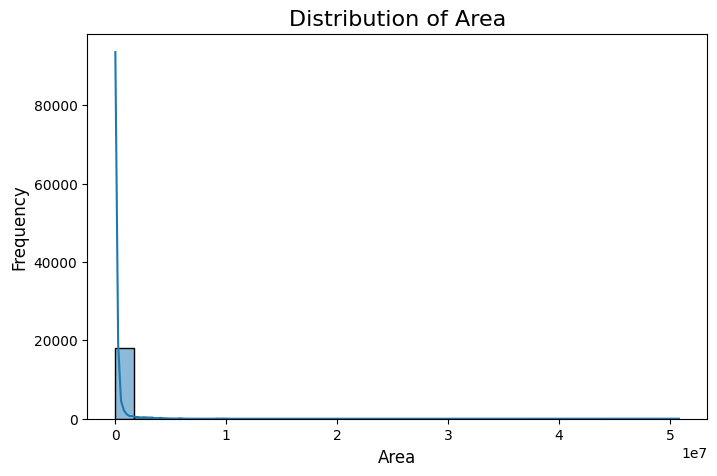

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


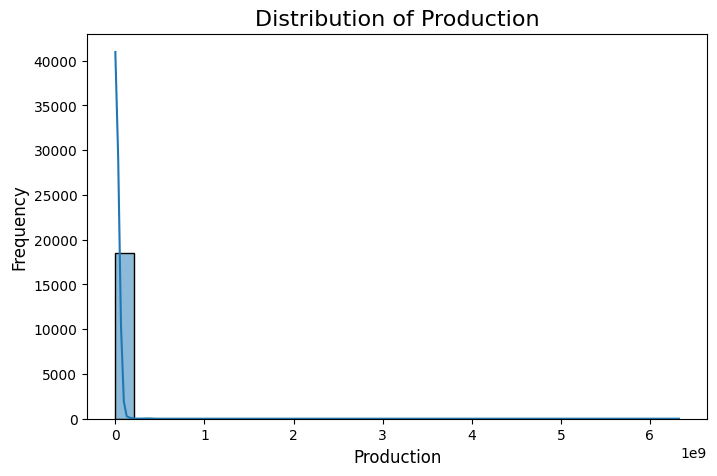

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


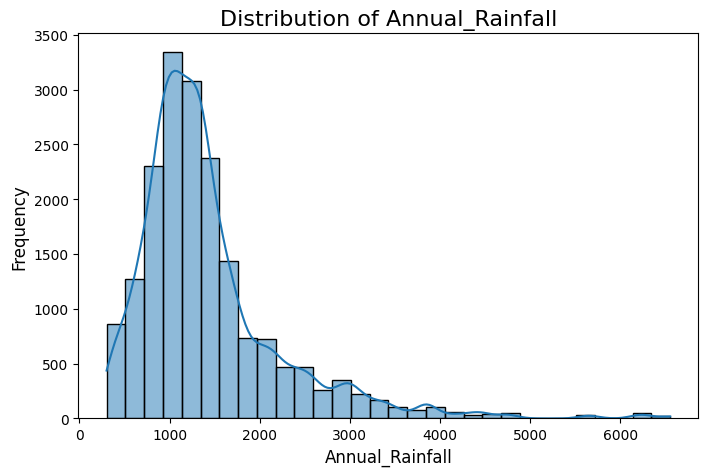

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


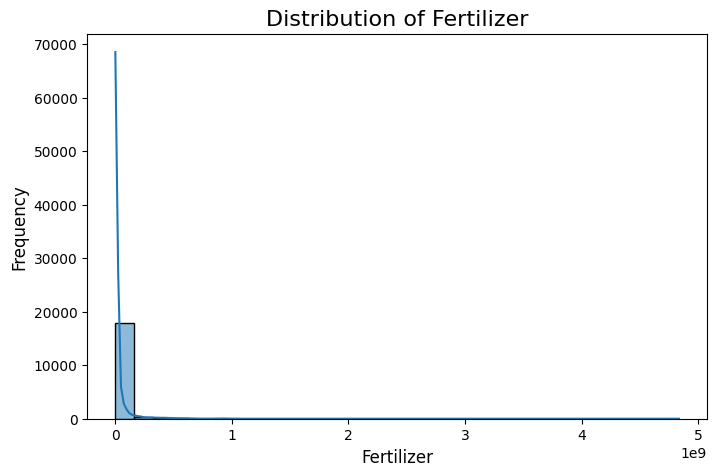

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


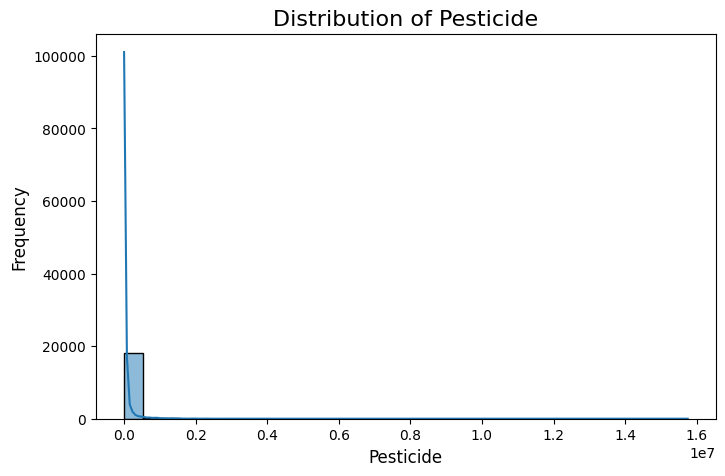

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


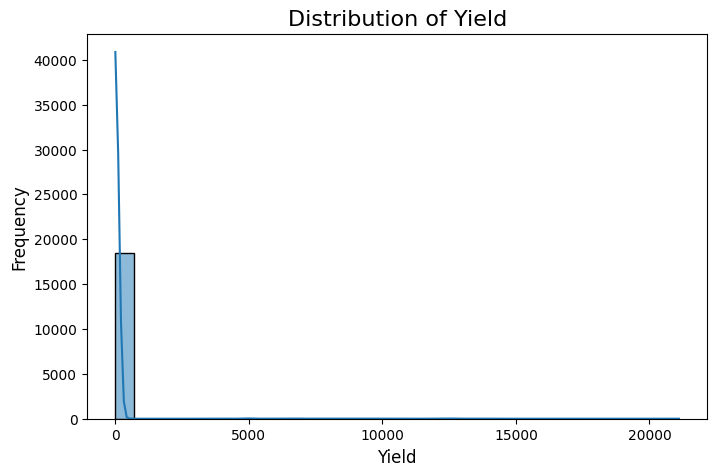

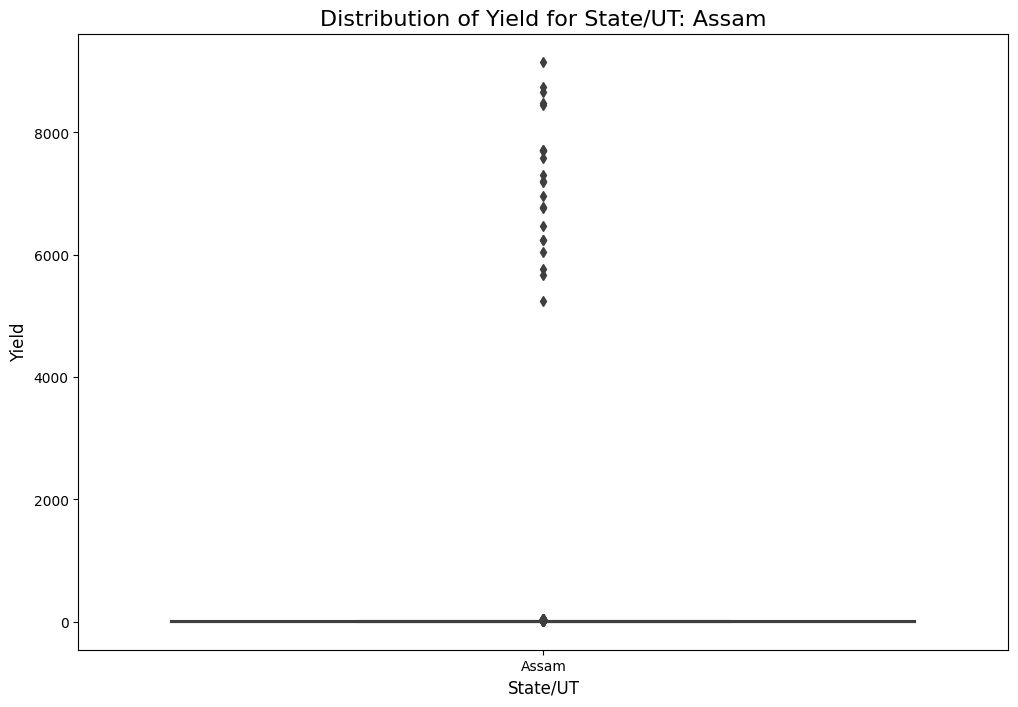

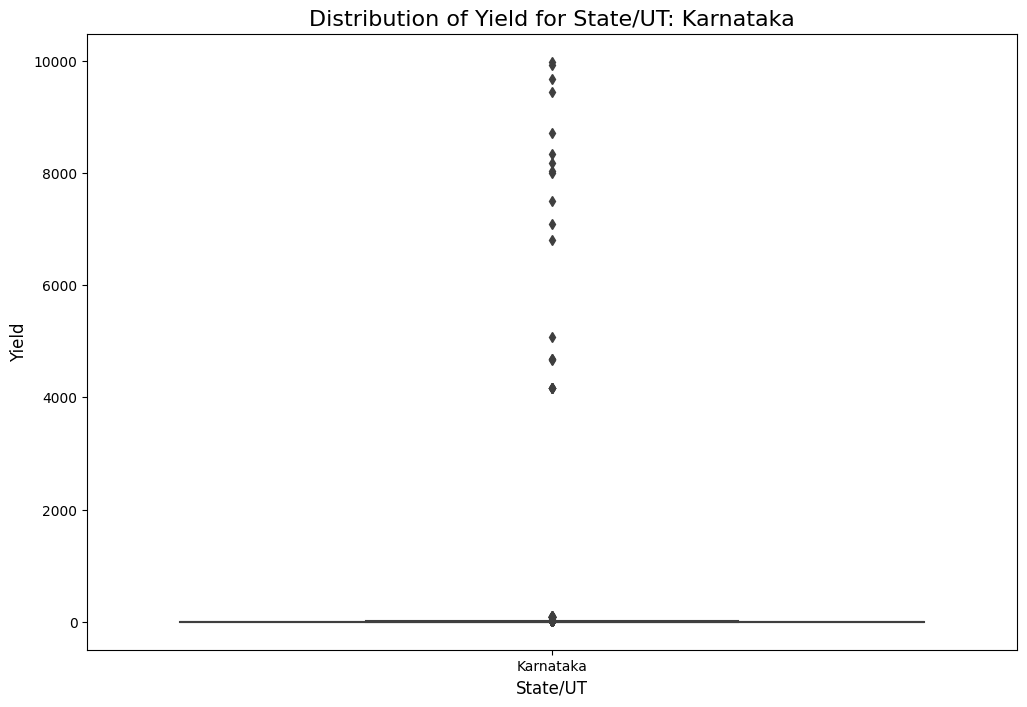

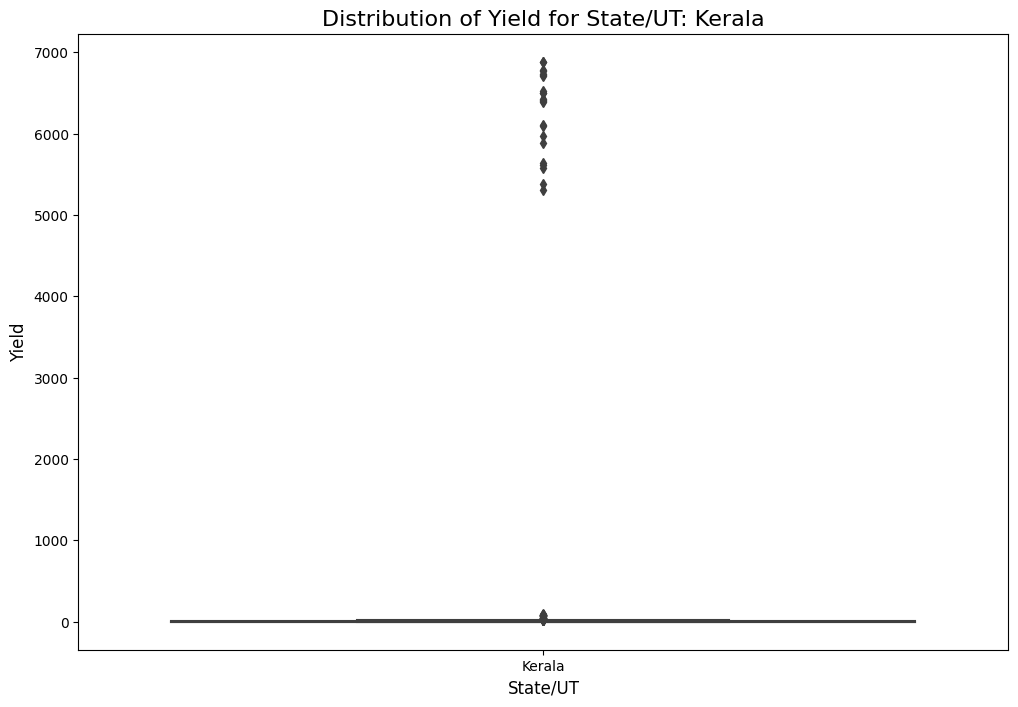

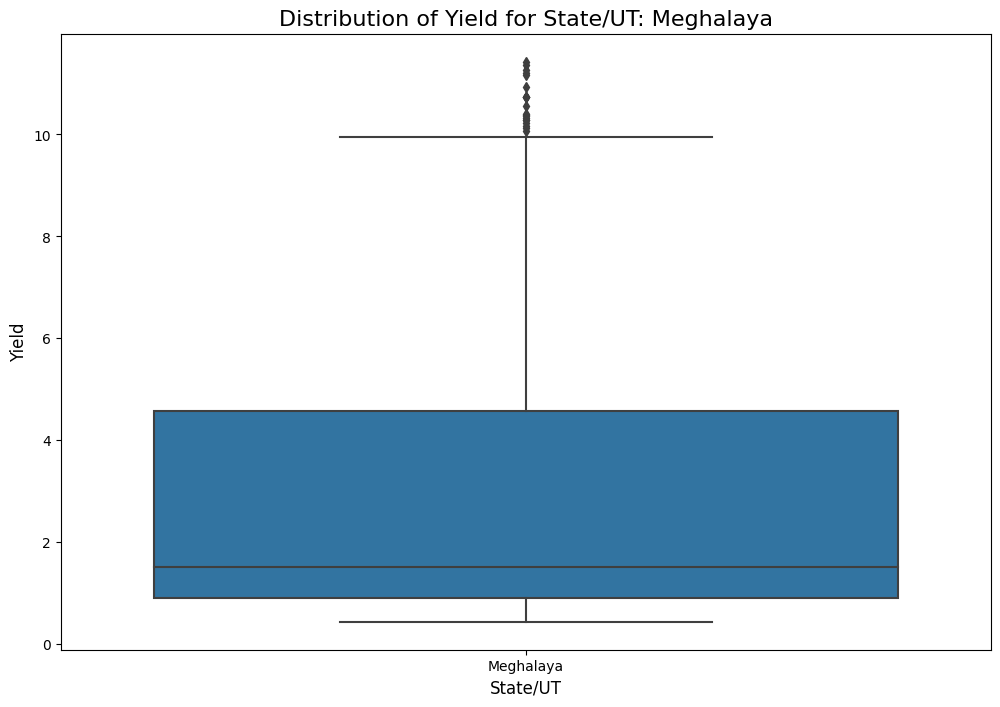

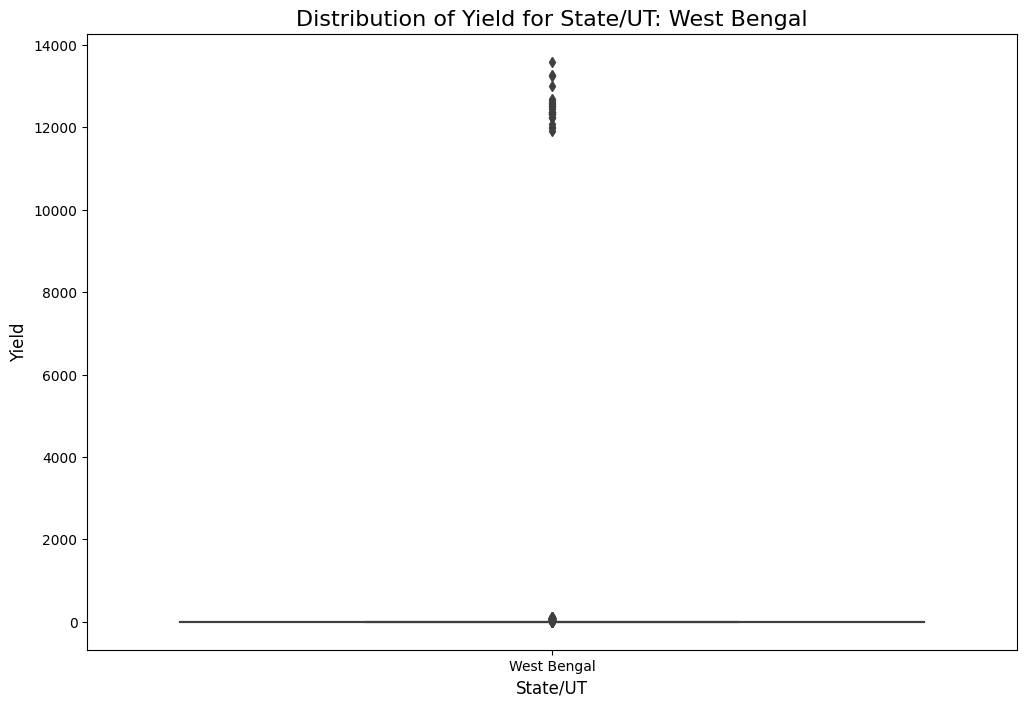

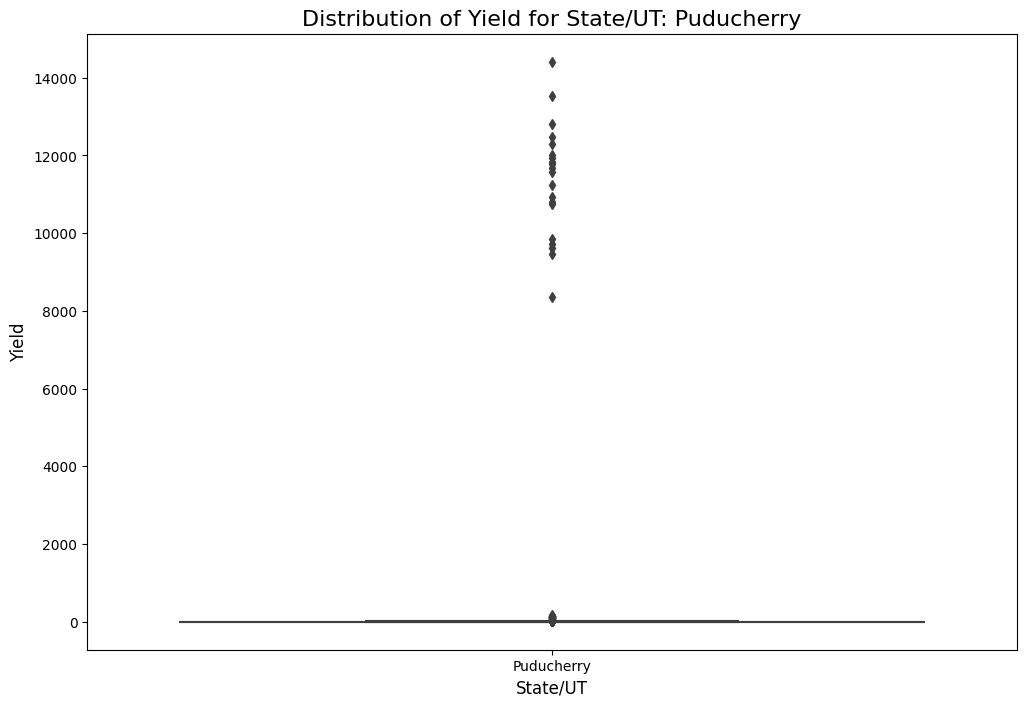

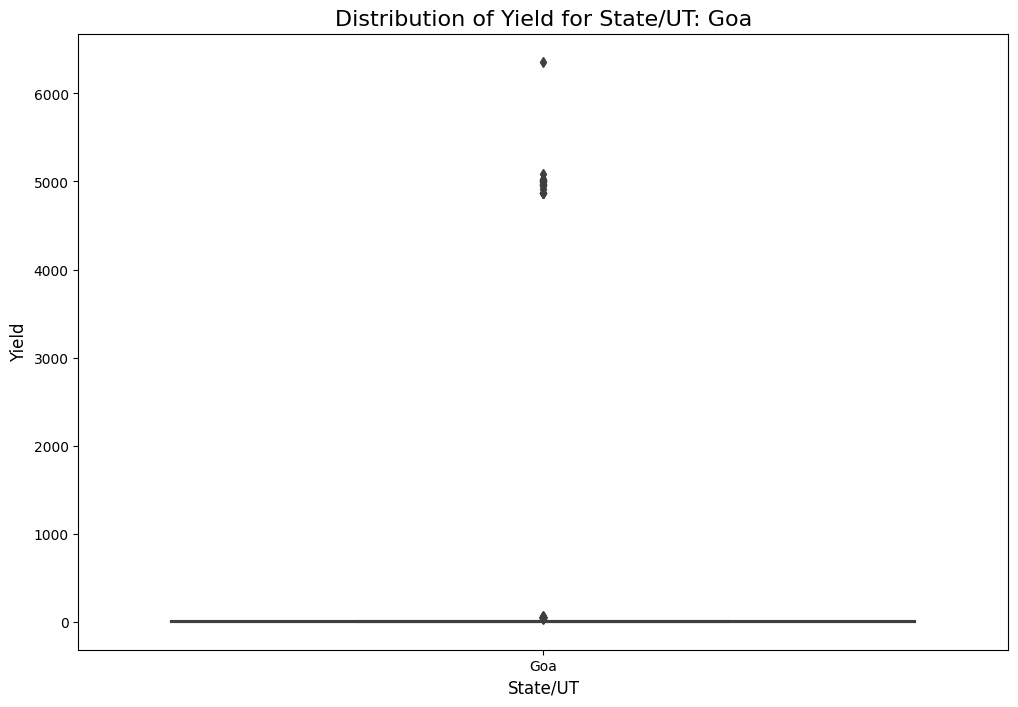

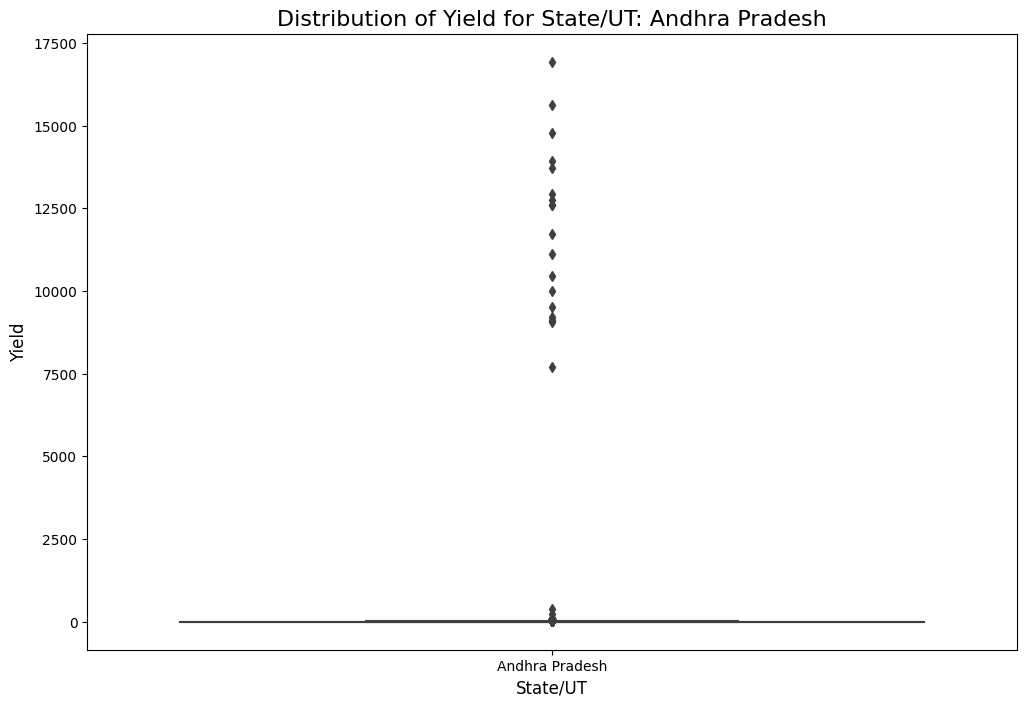

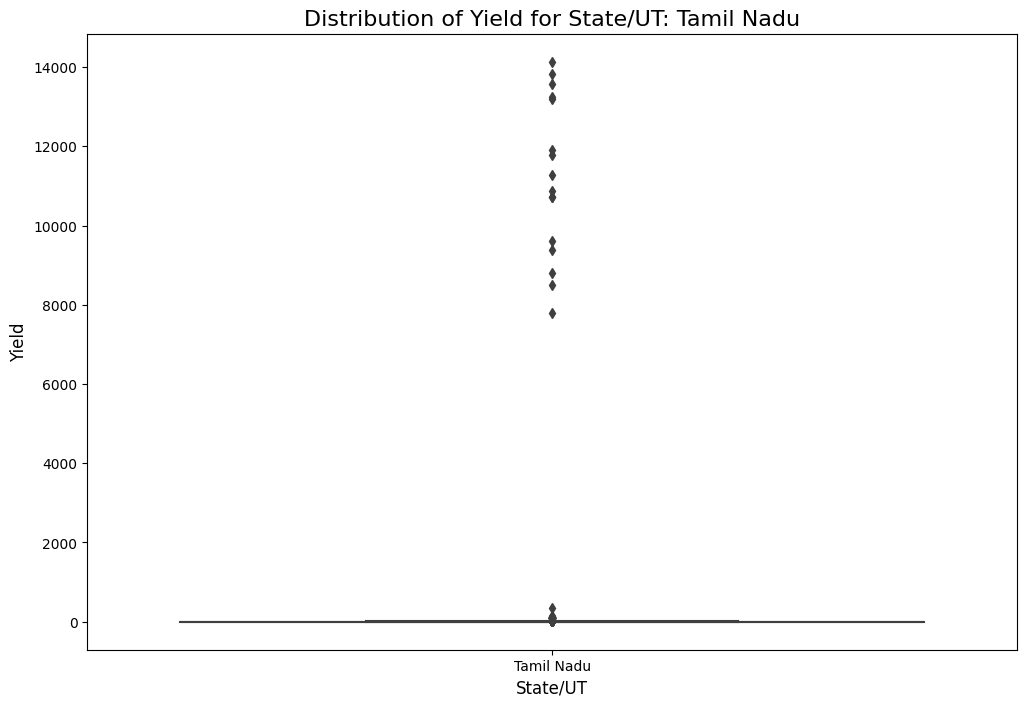

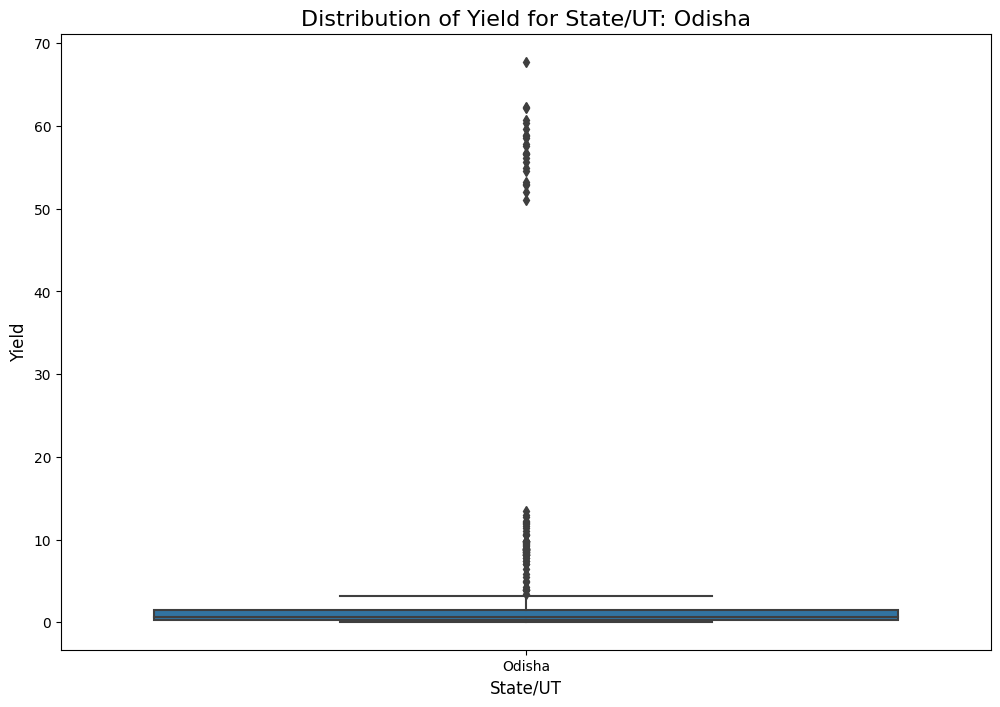

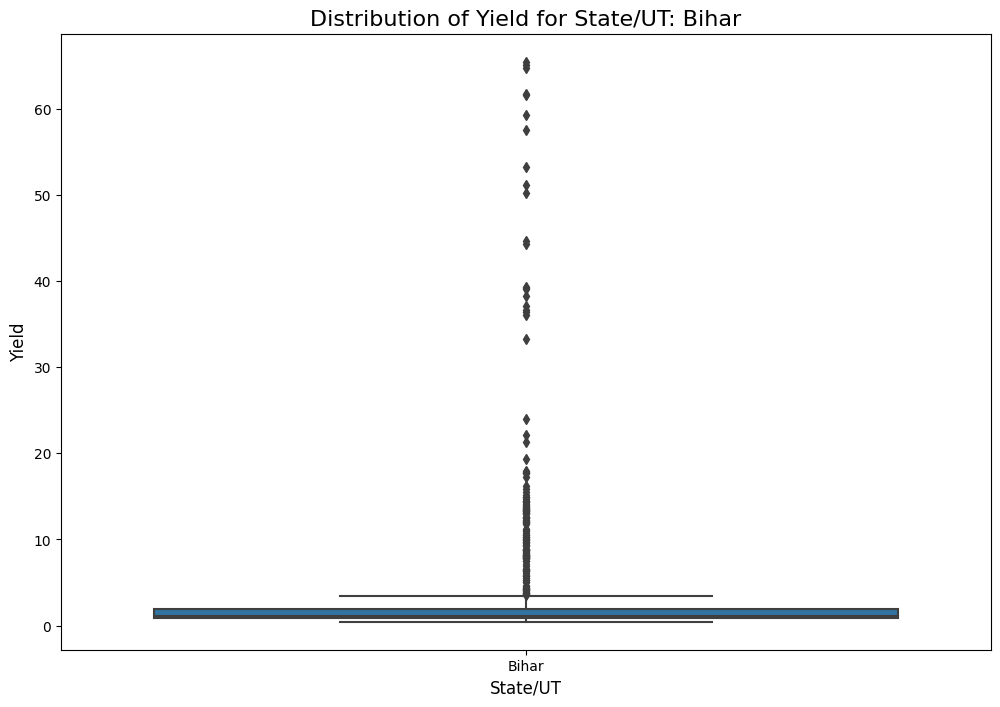

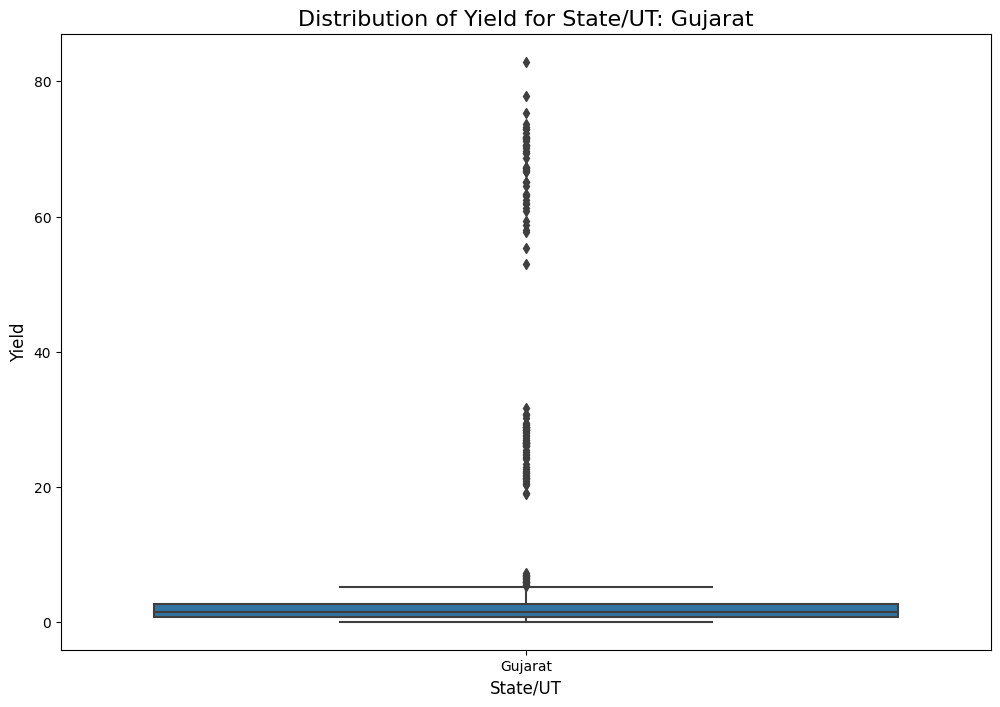

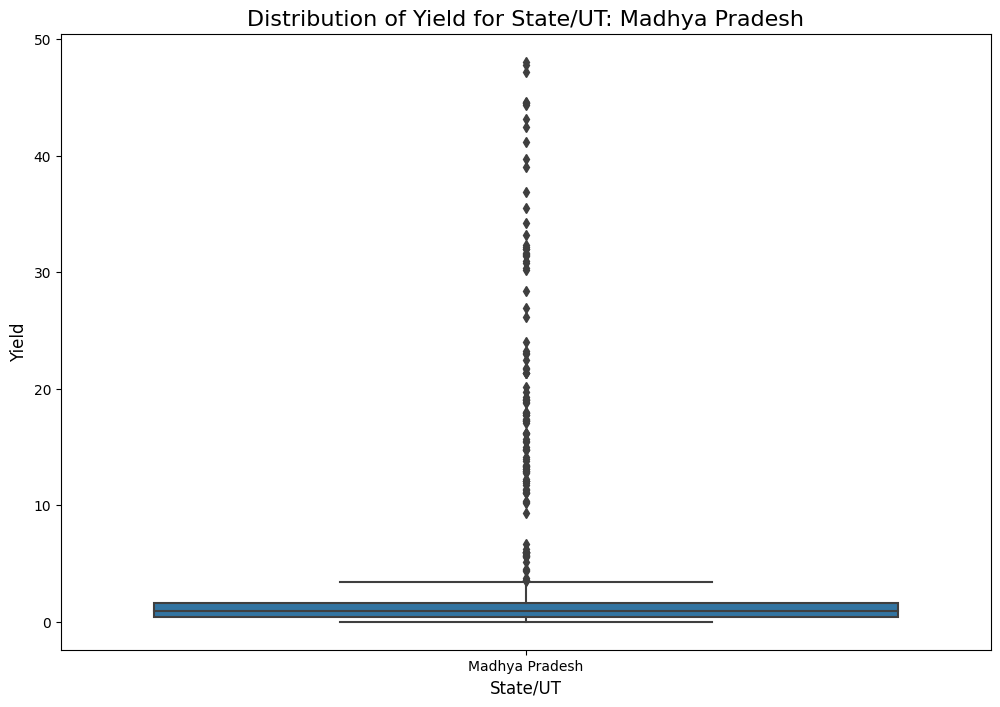

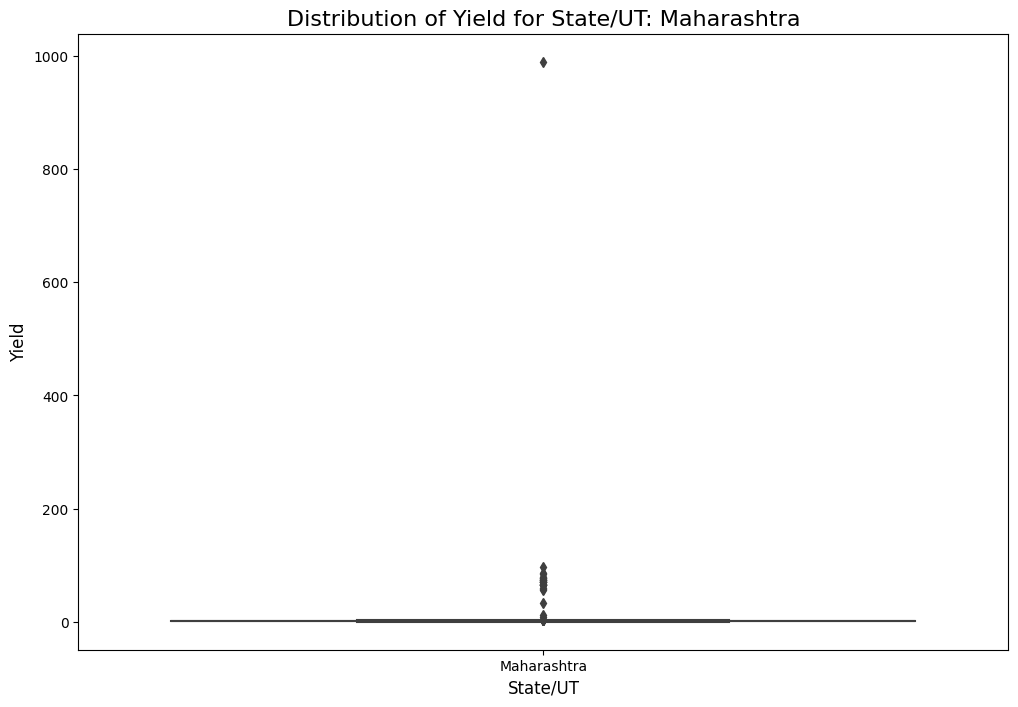

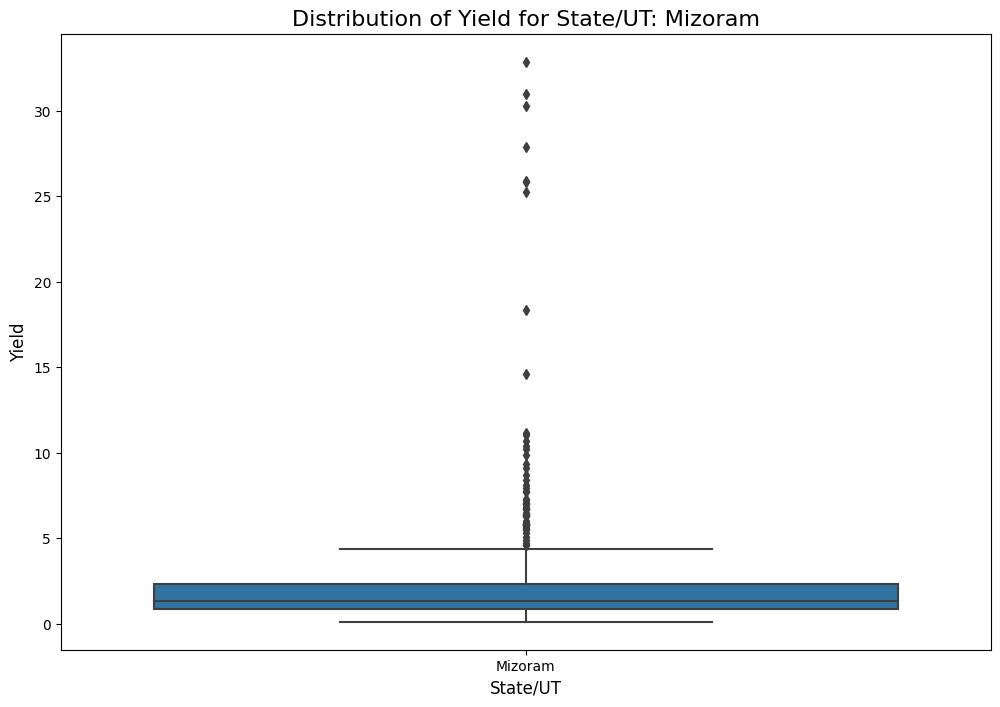

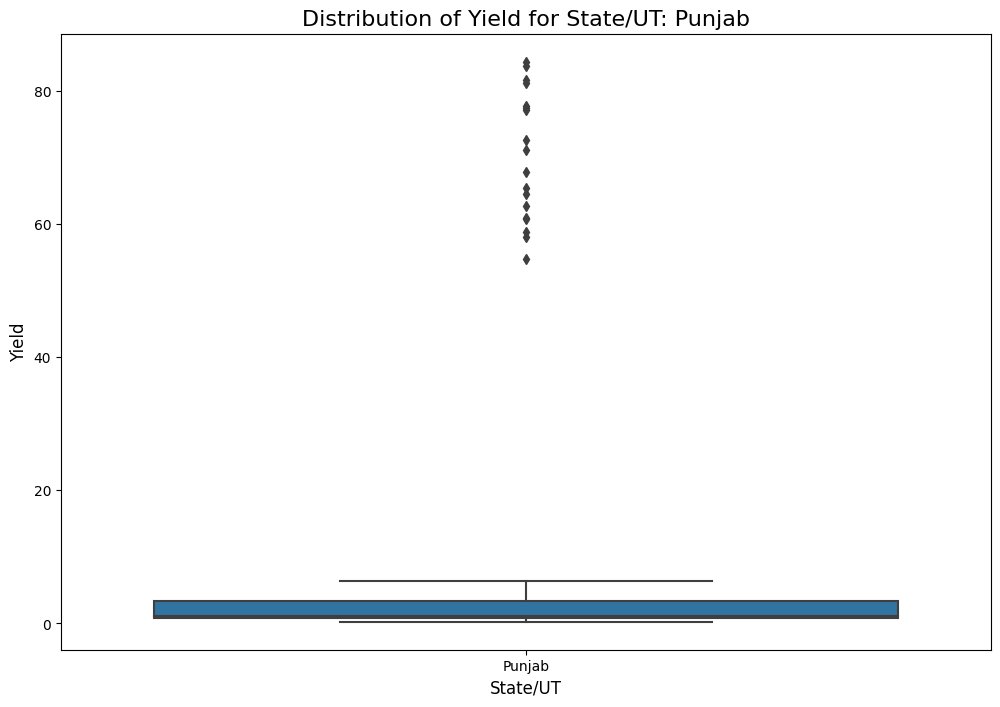

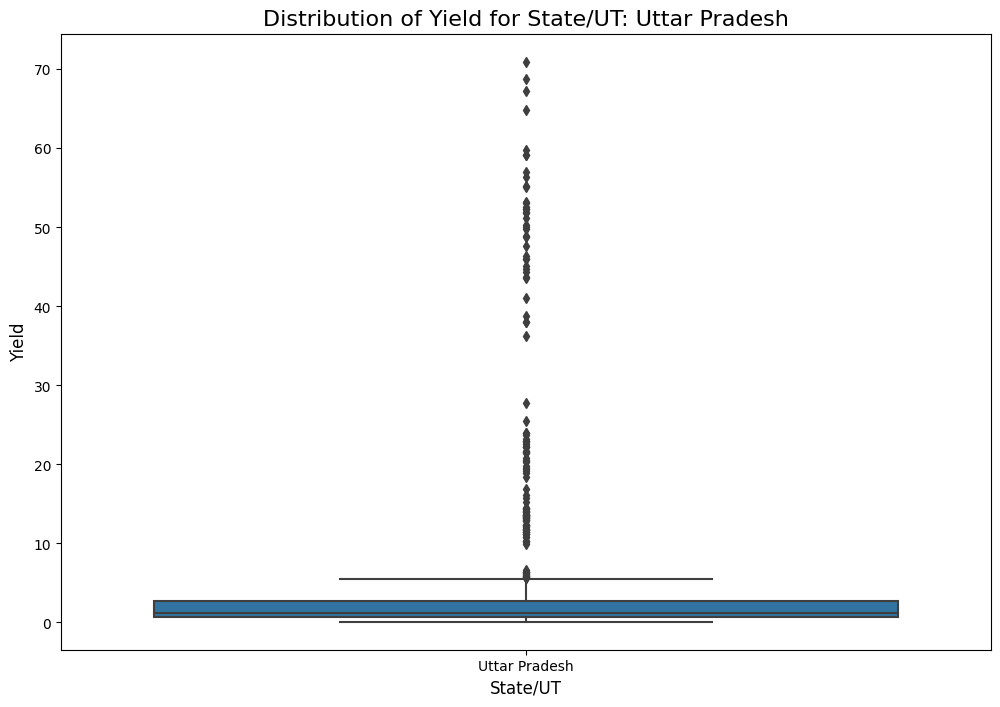

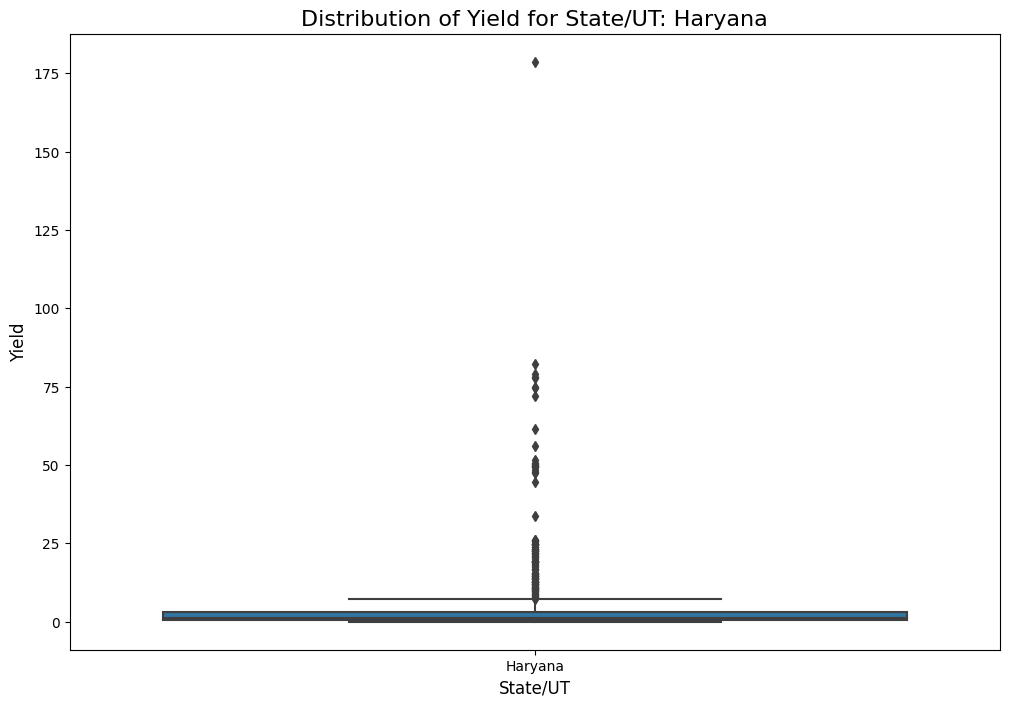

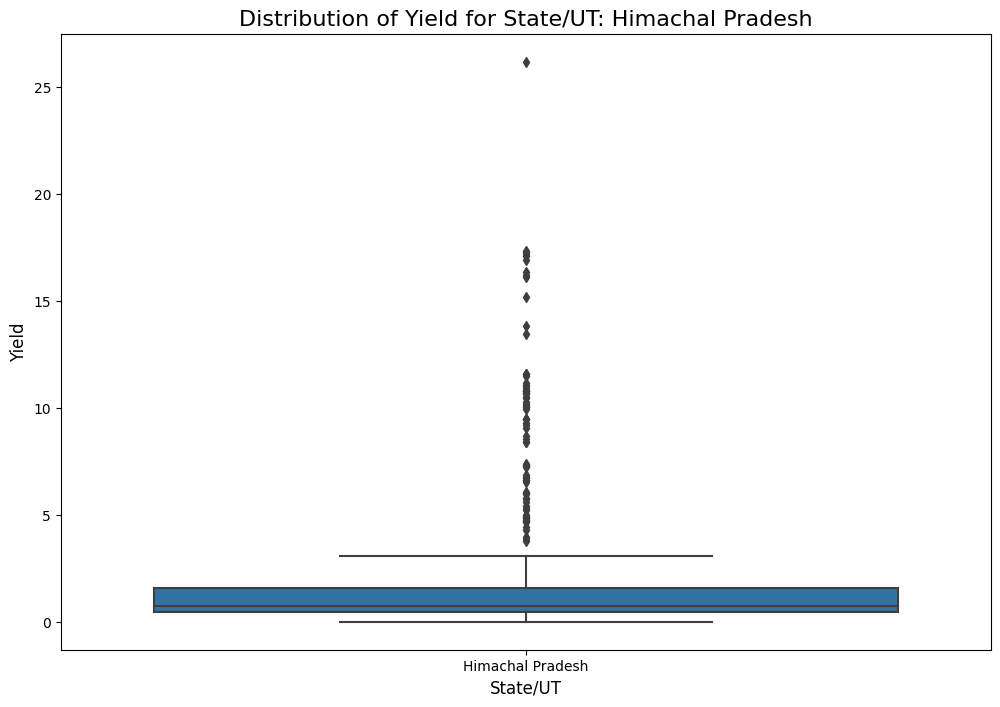

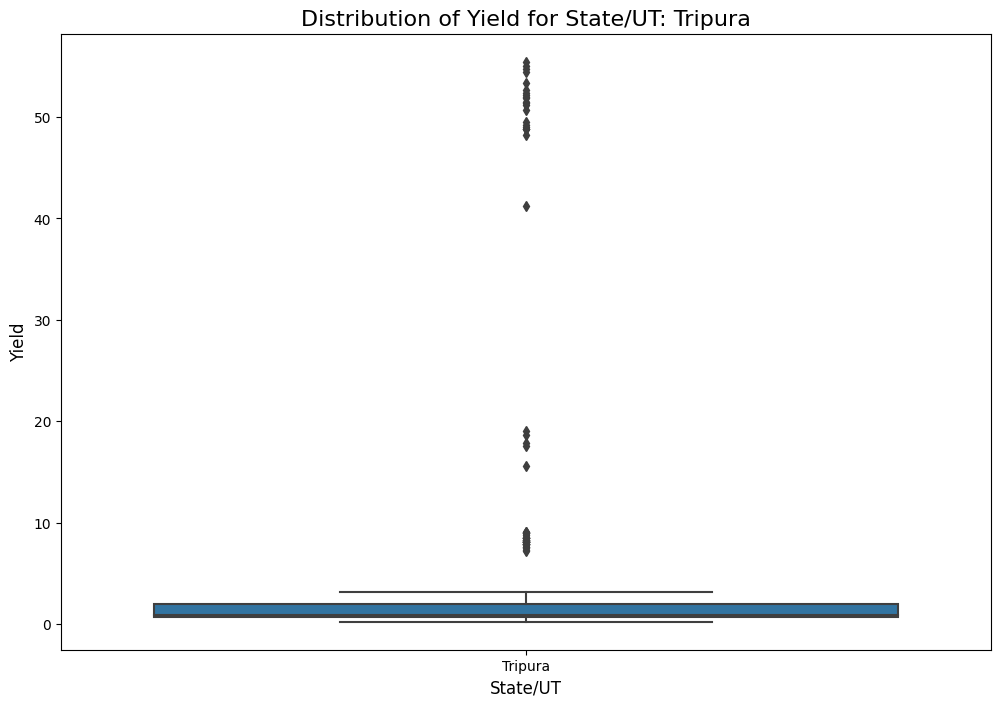

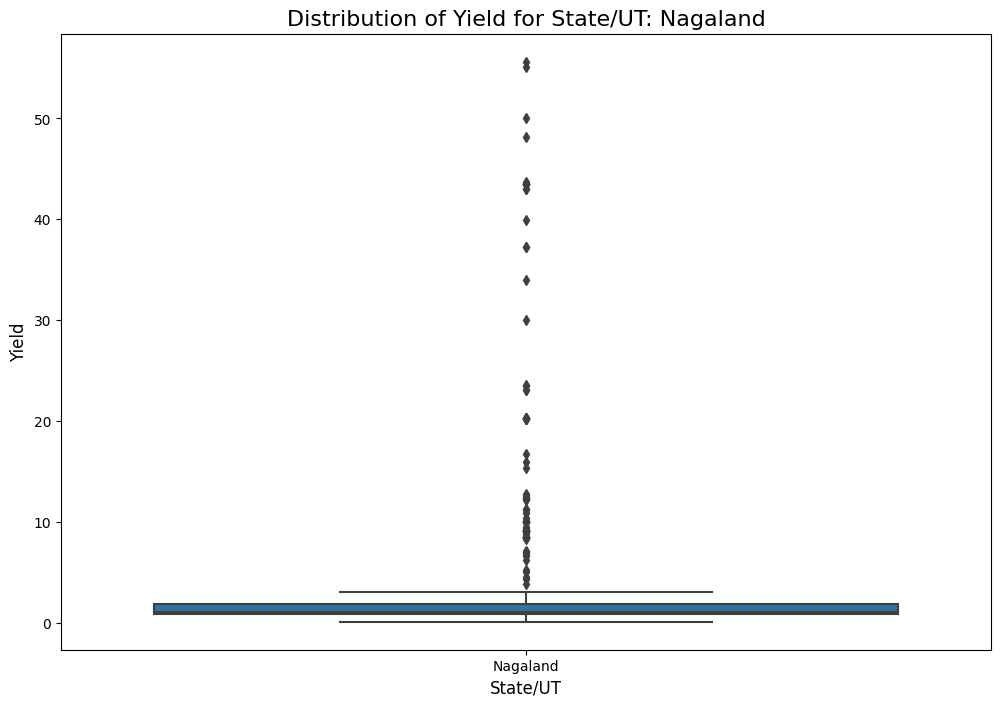

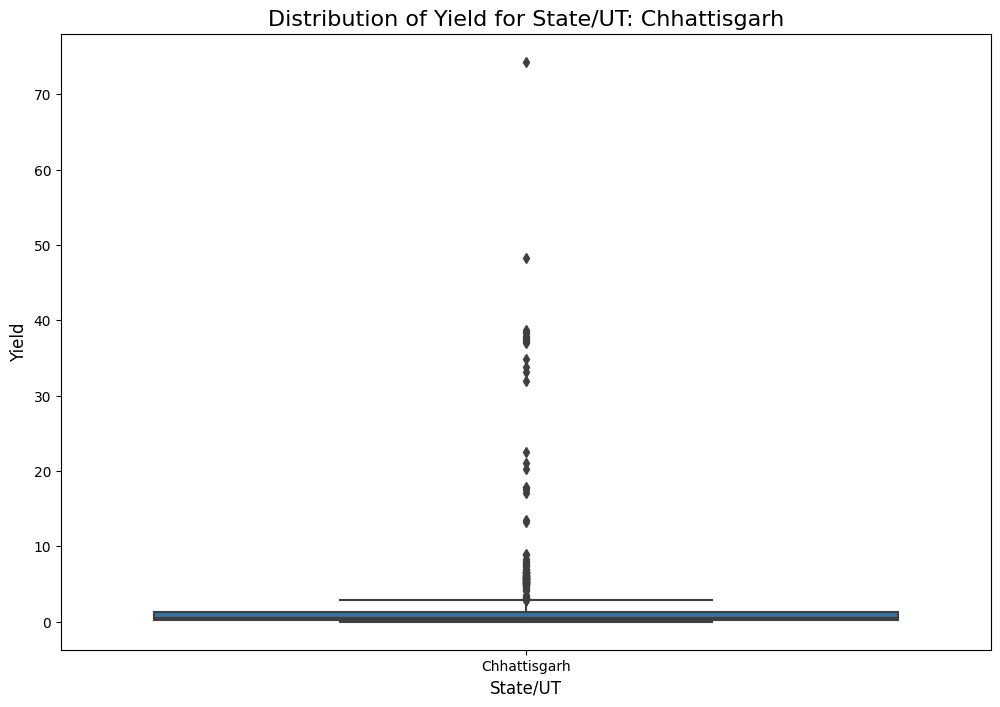

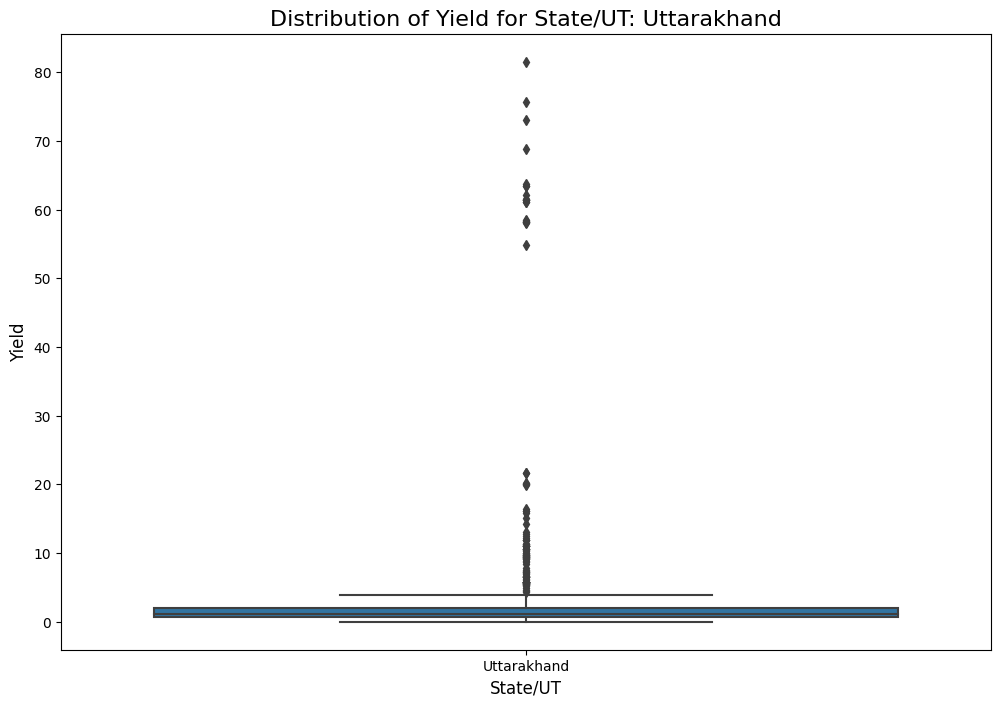

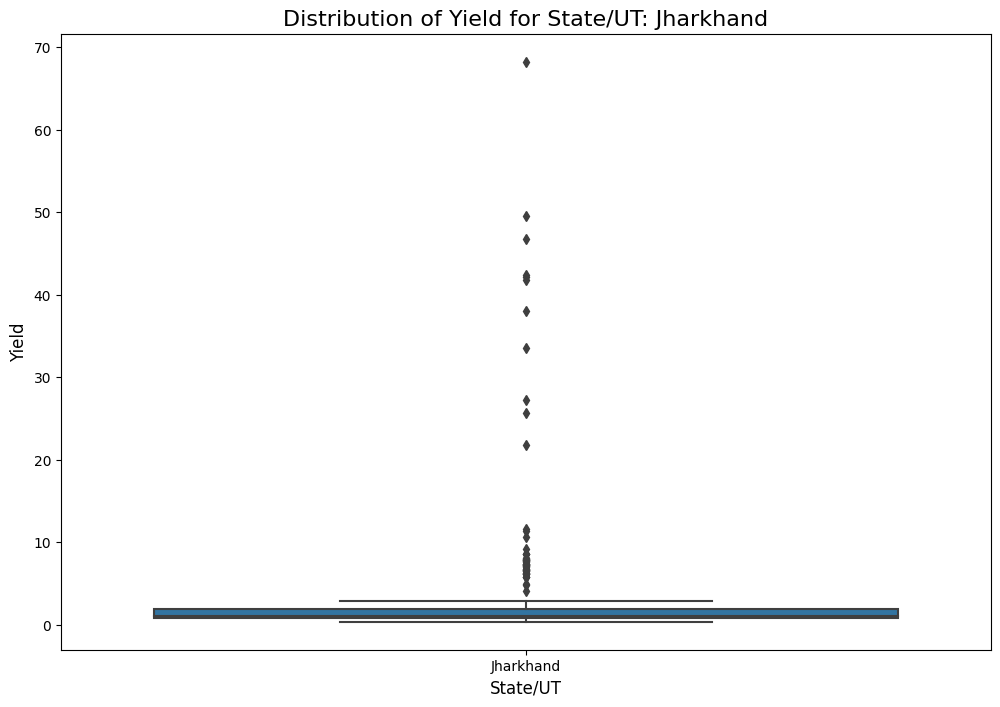

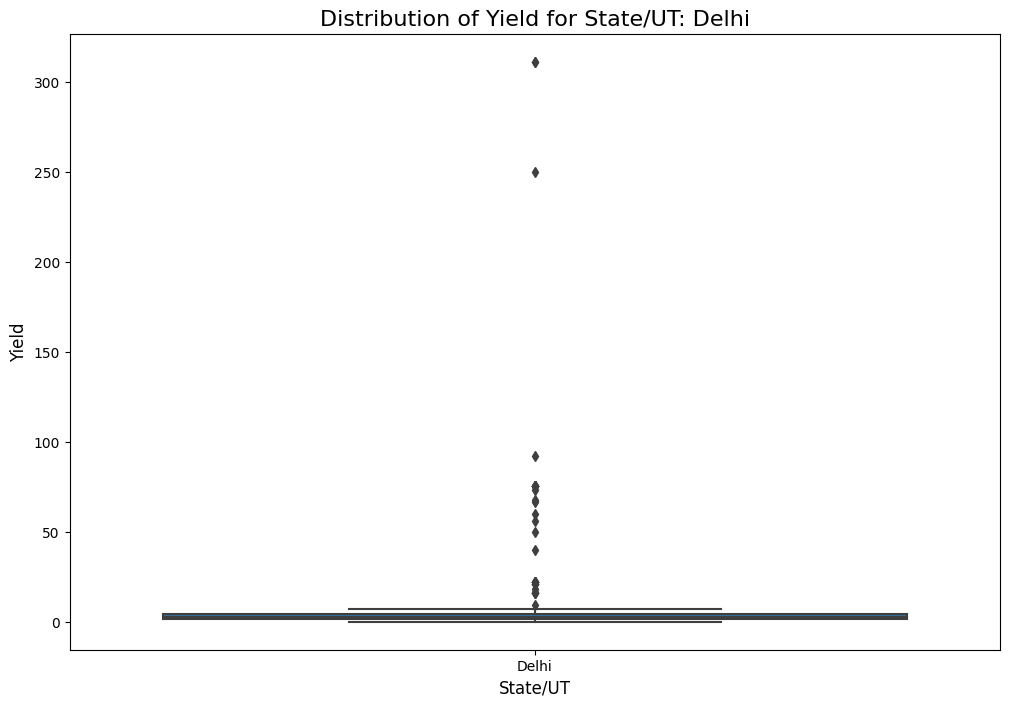

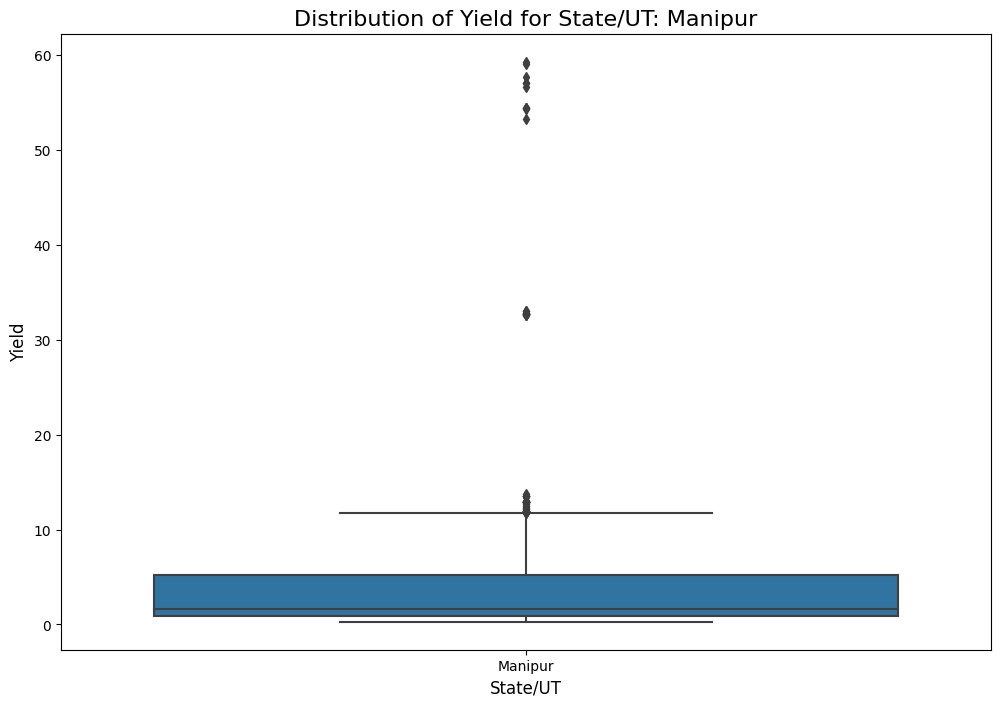

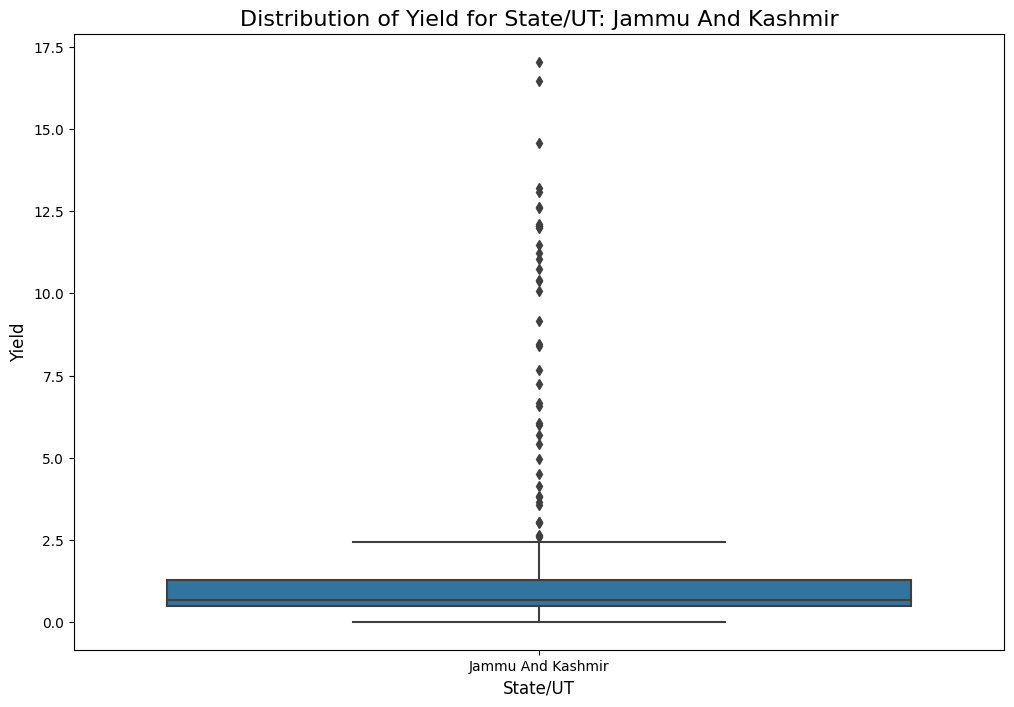

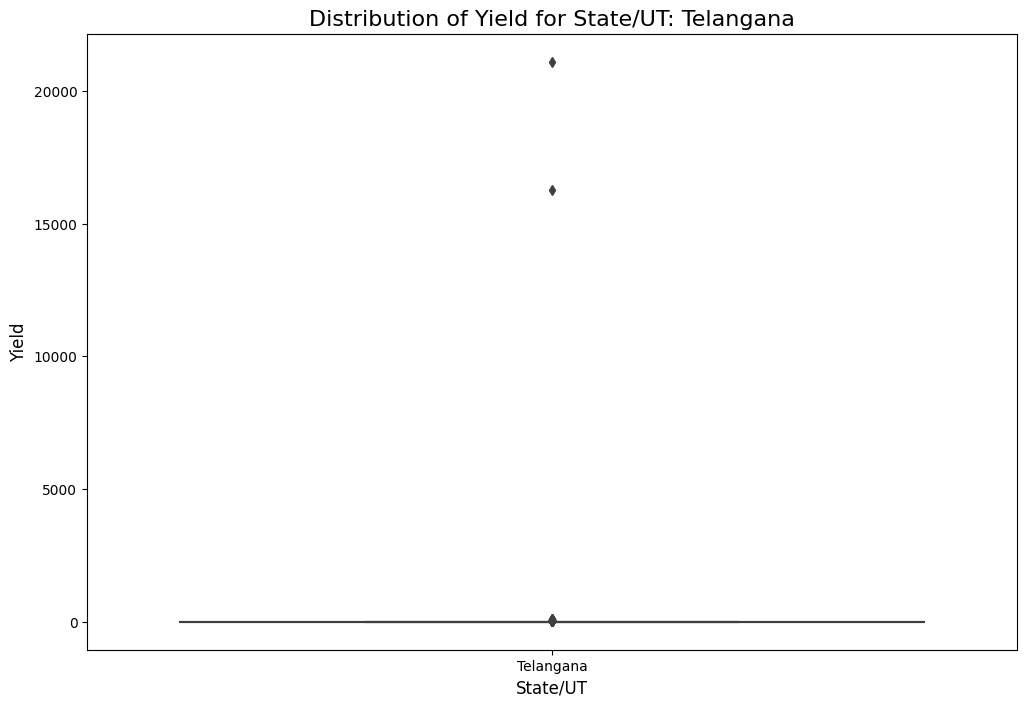

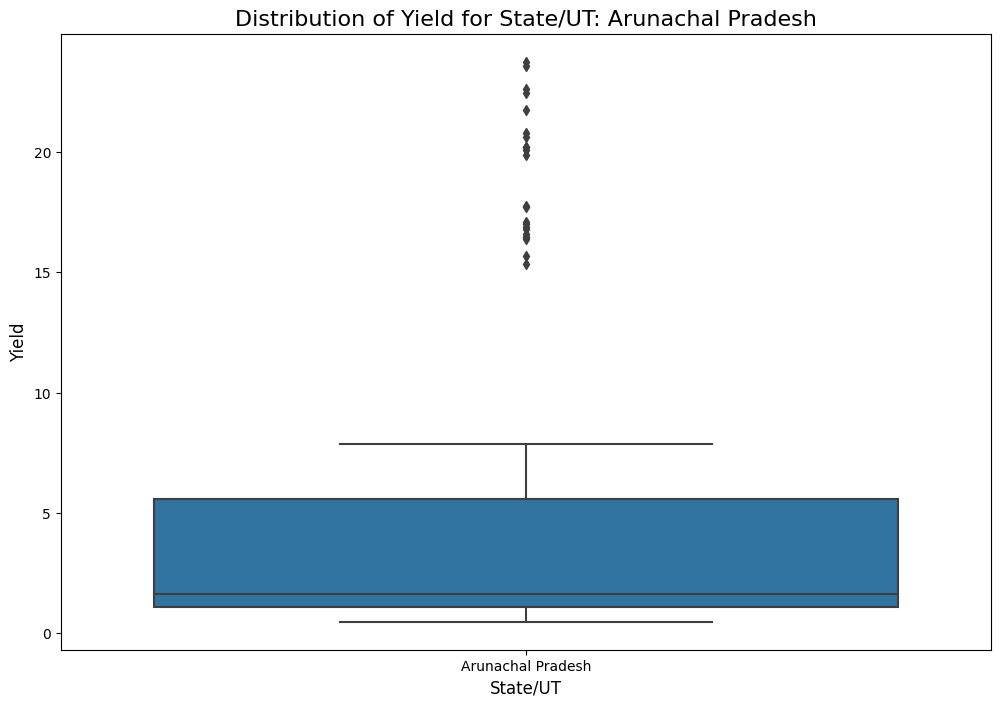

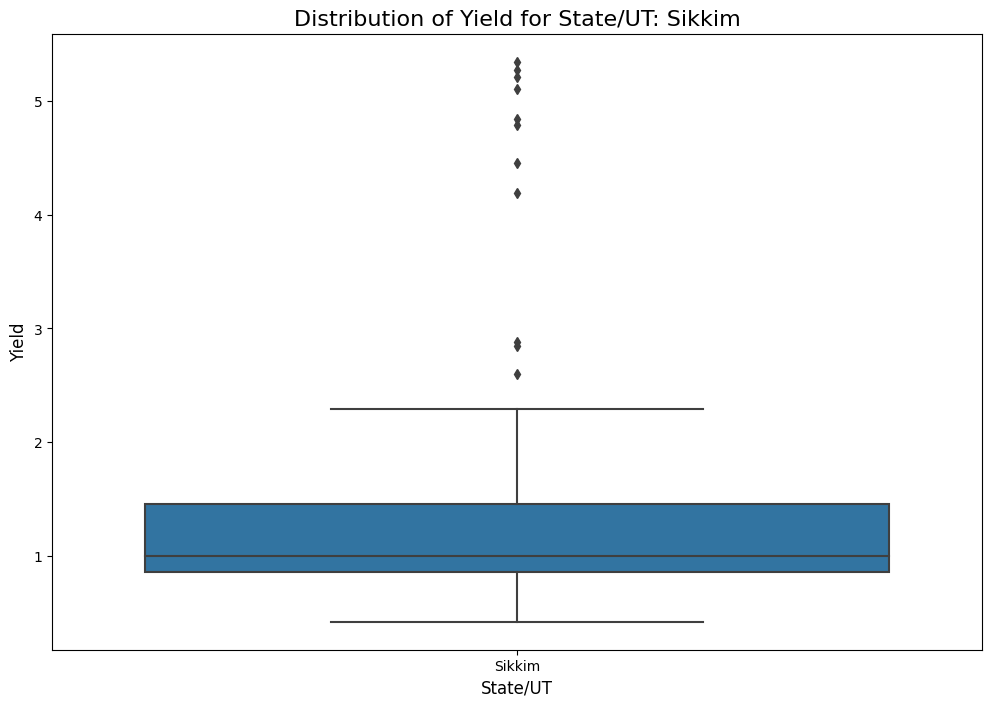

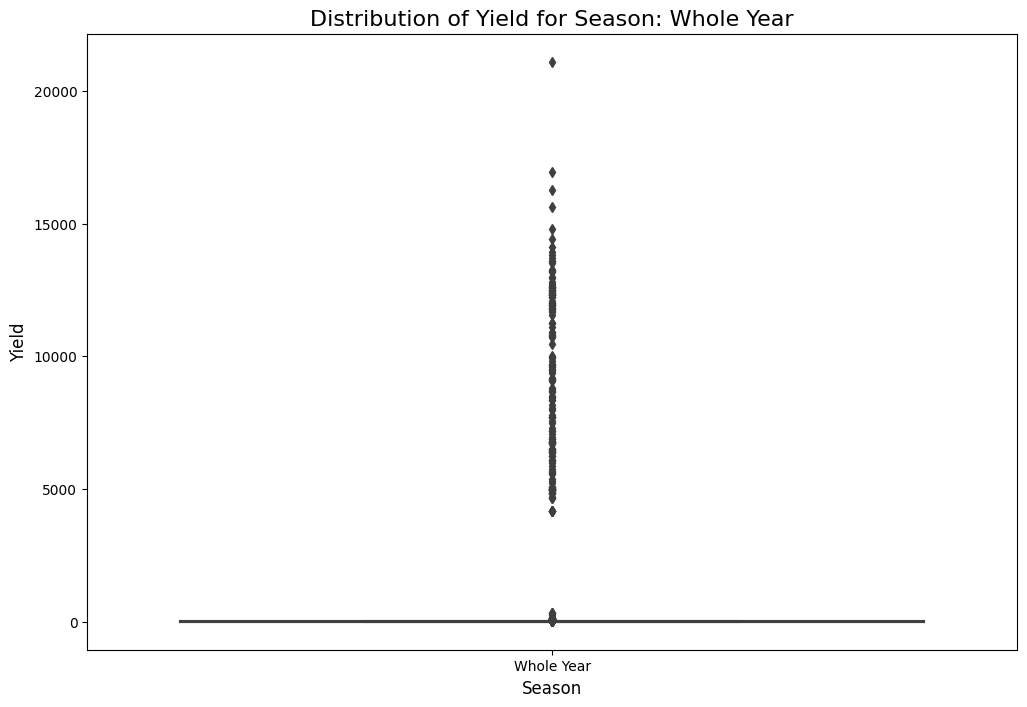

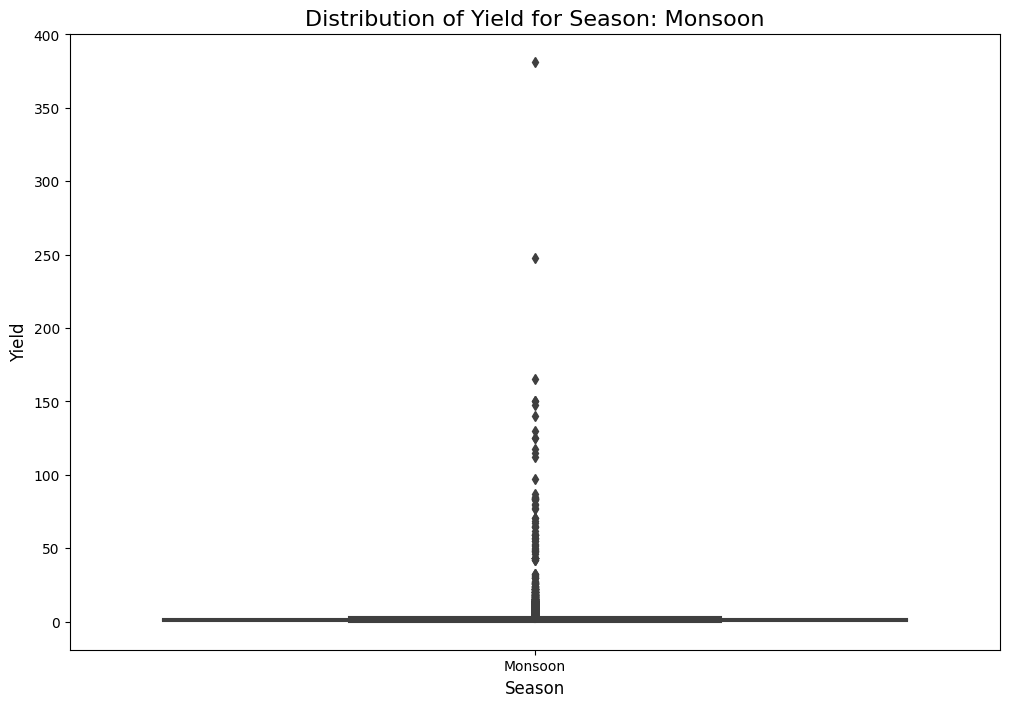

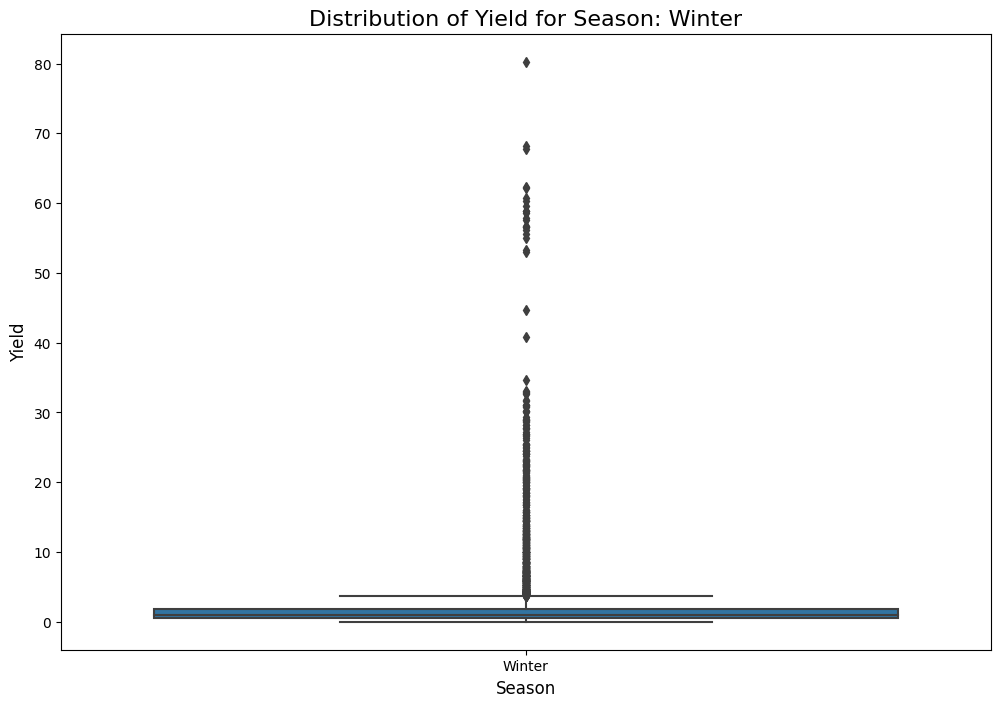

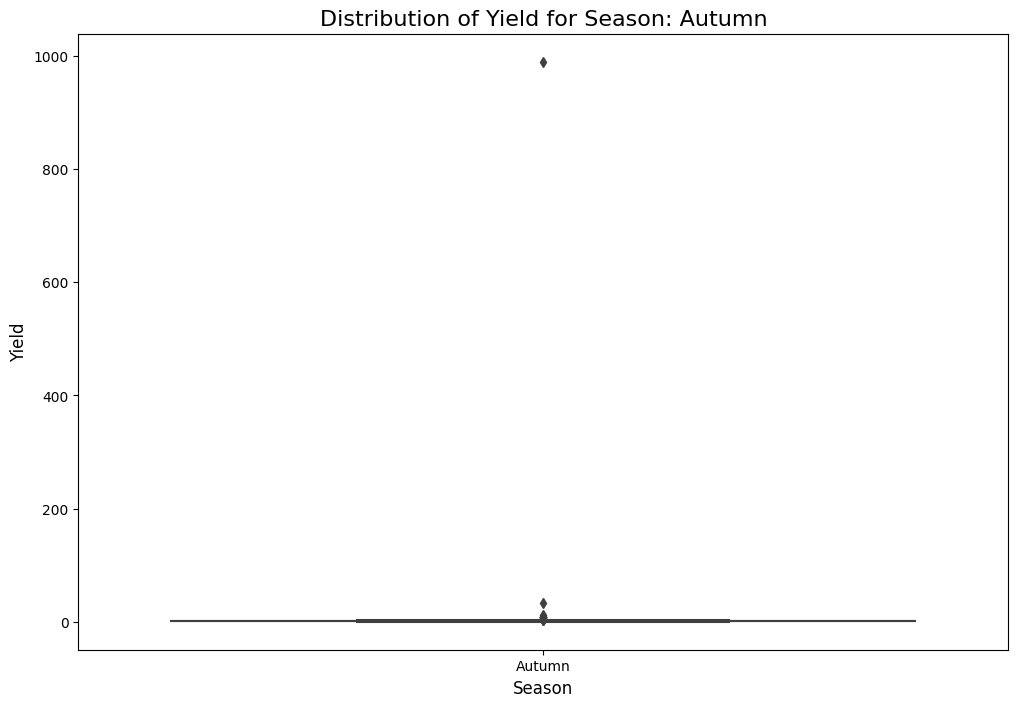

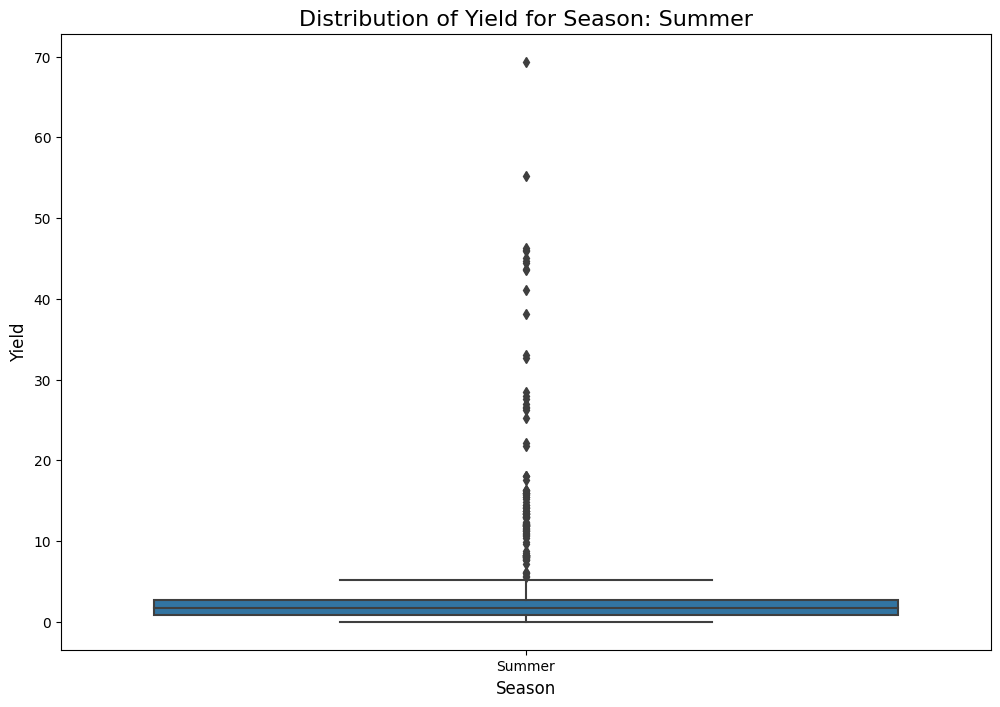

In [11]:

# Step 1: Visualize data distribution
def visualize_distribution(data, columns):
    """
    Function to visualize the distribution of numerical columns using histograms.
    """
    for col in columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.show()

# Step 2: Display separate boxplots for numerical and categorical column combinations
def display_separate_plots(data, numerical_column, categorical_column):
    """
    Function to display boxplots of a numerical column segmented by a categorical column.
    """
    unique_values = data[categorical_column].unique()  # Unique categories in the categorical column

    for value in unique_values:
        filtered_data = data[data[categorical_column] == value]  # Filter data for each unique category
        
        # Create the boxplot for the current category
        plt.figure(figsize=(12, 8))
        sns.boxplot(x=categorical_column, y=numerical_column, data=filtered_data)
        
        # Add titles and labels
        plt.title(f'Distribution of {numerical_column} for {categorical_column}: {value}', fontsize=16)
        plt.xlabel(categorical_column, fontsize=12)
        plt.ylabel(numerical_column, fontsize=12)
        
        # Show the plot
        plt.show()

# Example Usage:
# Visualize the distribution of numerical columns
numerical_cols = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
visualize_distribution(data, numerical_cols)

# Display boxplots for 'Yield' segmented by 'State'
display_separate_plots(data, 'Yield', 'State/UT')

# Display boxplots for 'Yield' segmented by 'Season'
display_separate_plots(data, 'Yield', 'Season')


In [12]:

# Step 2: Detect and handle outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_info = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers detected")
    outliers_info[col] = {"lower_bound": lower, "upper_bound": upper, "count": len(outliers)}



Area: 2902 outliers detected
Production: 3213 outliers detected
Annual_Rainfall: 1426 outliers detected
Fertilizer: 2942 outliers detected
Pesticide: 2888 outliers detected
Yield: 2948 outliers detected


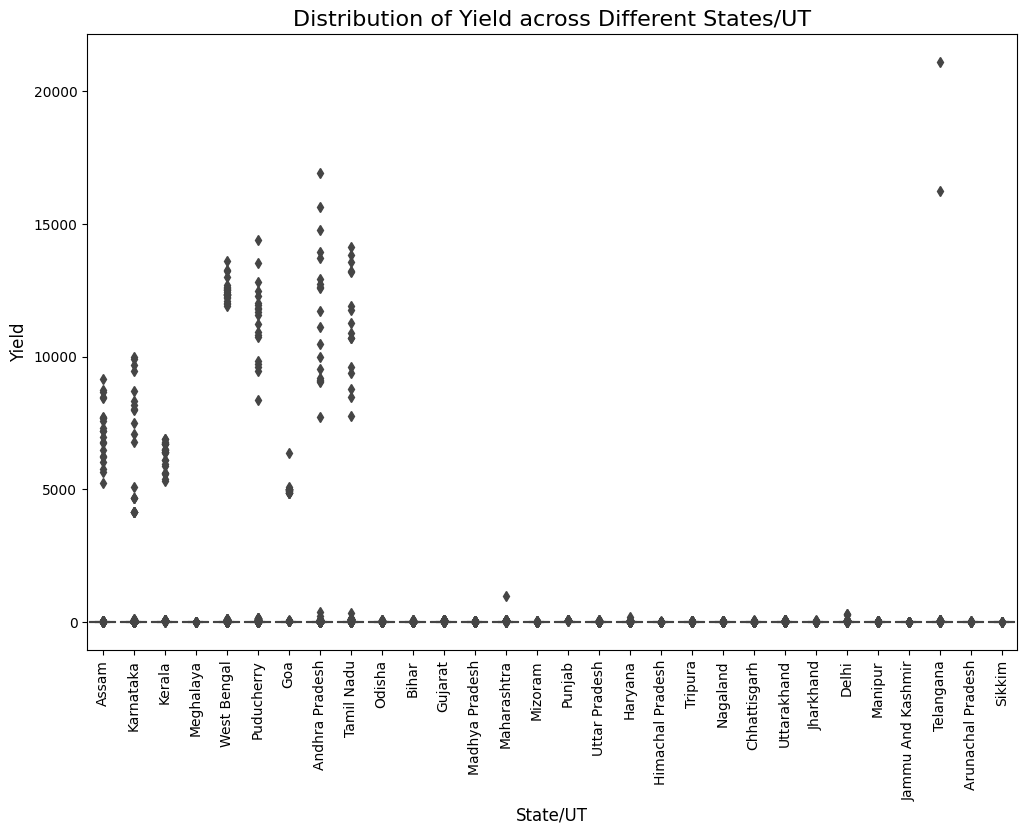

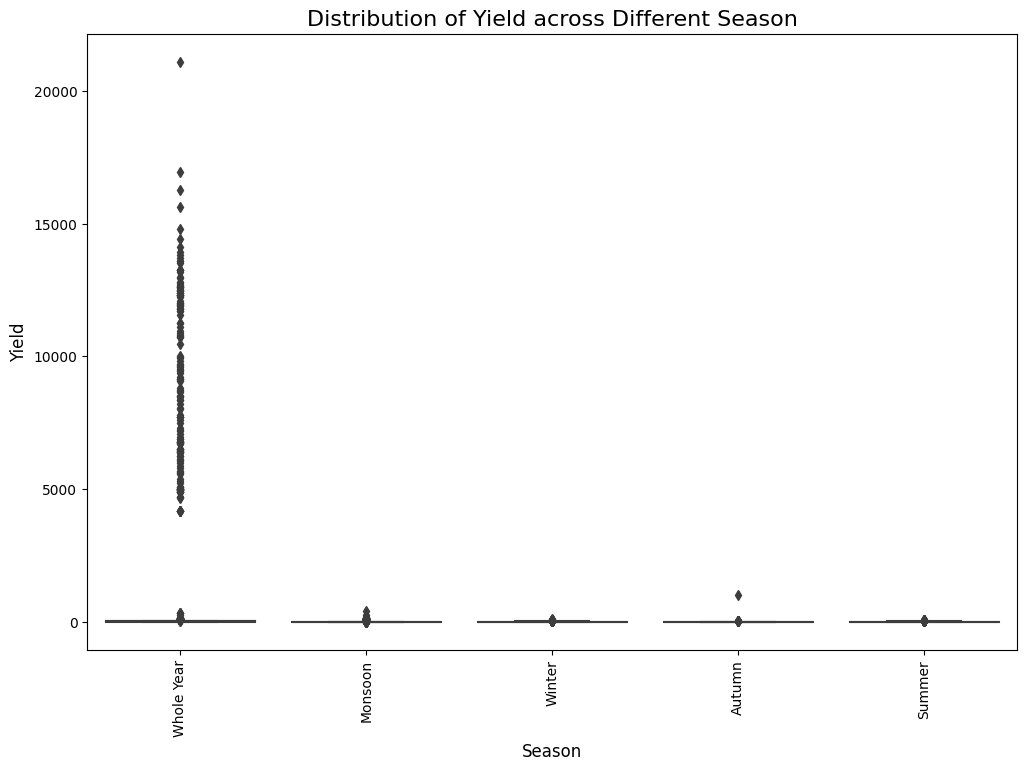

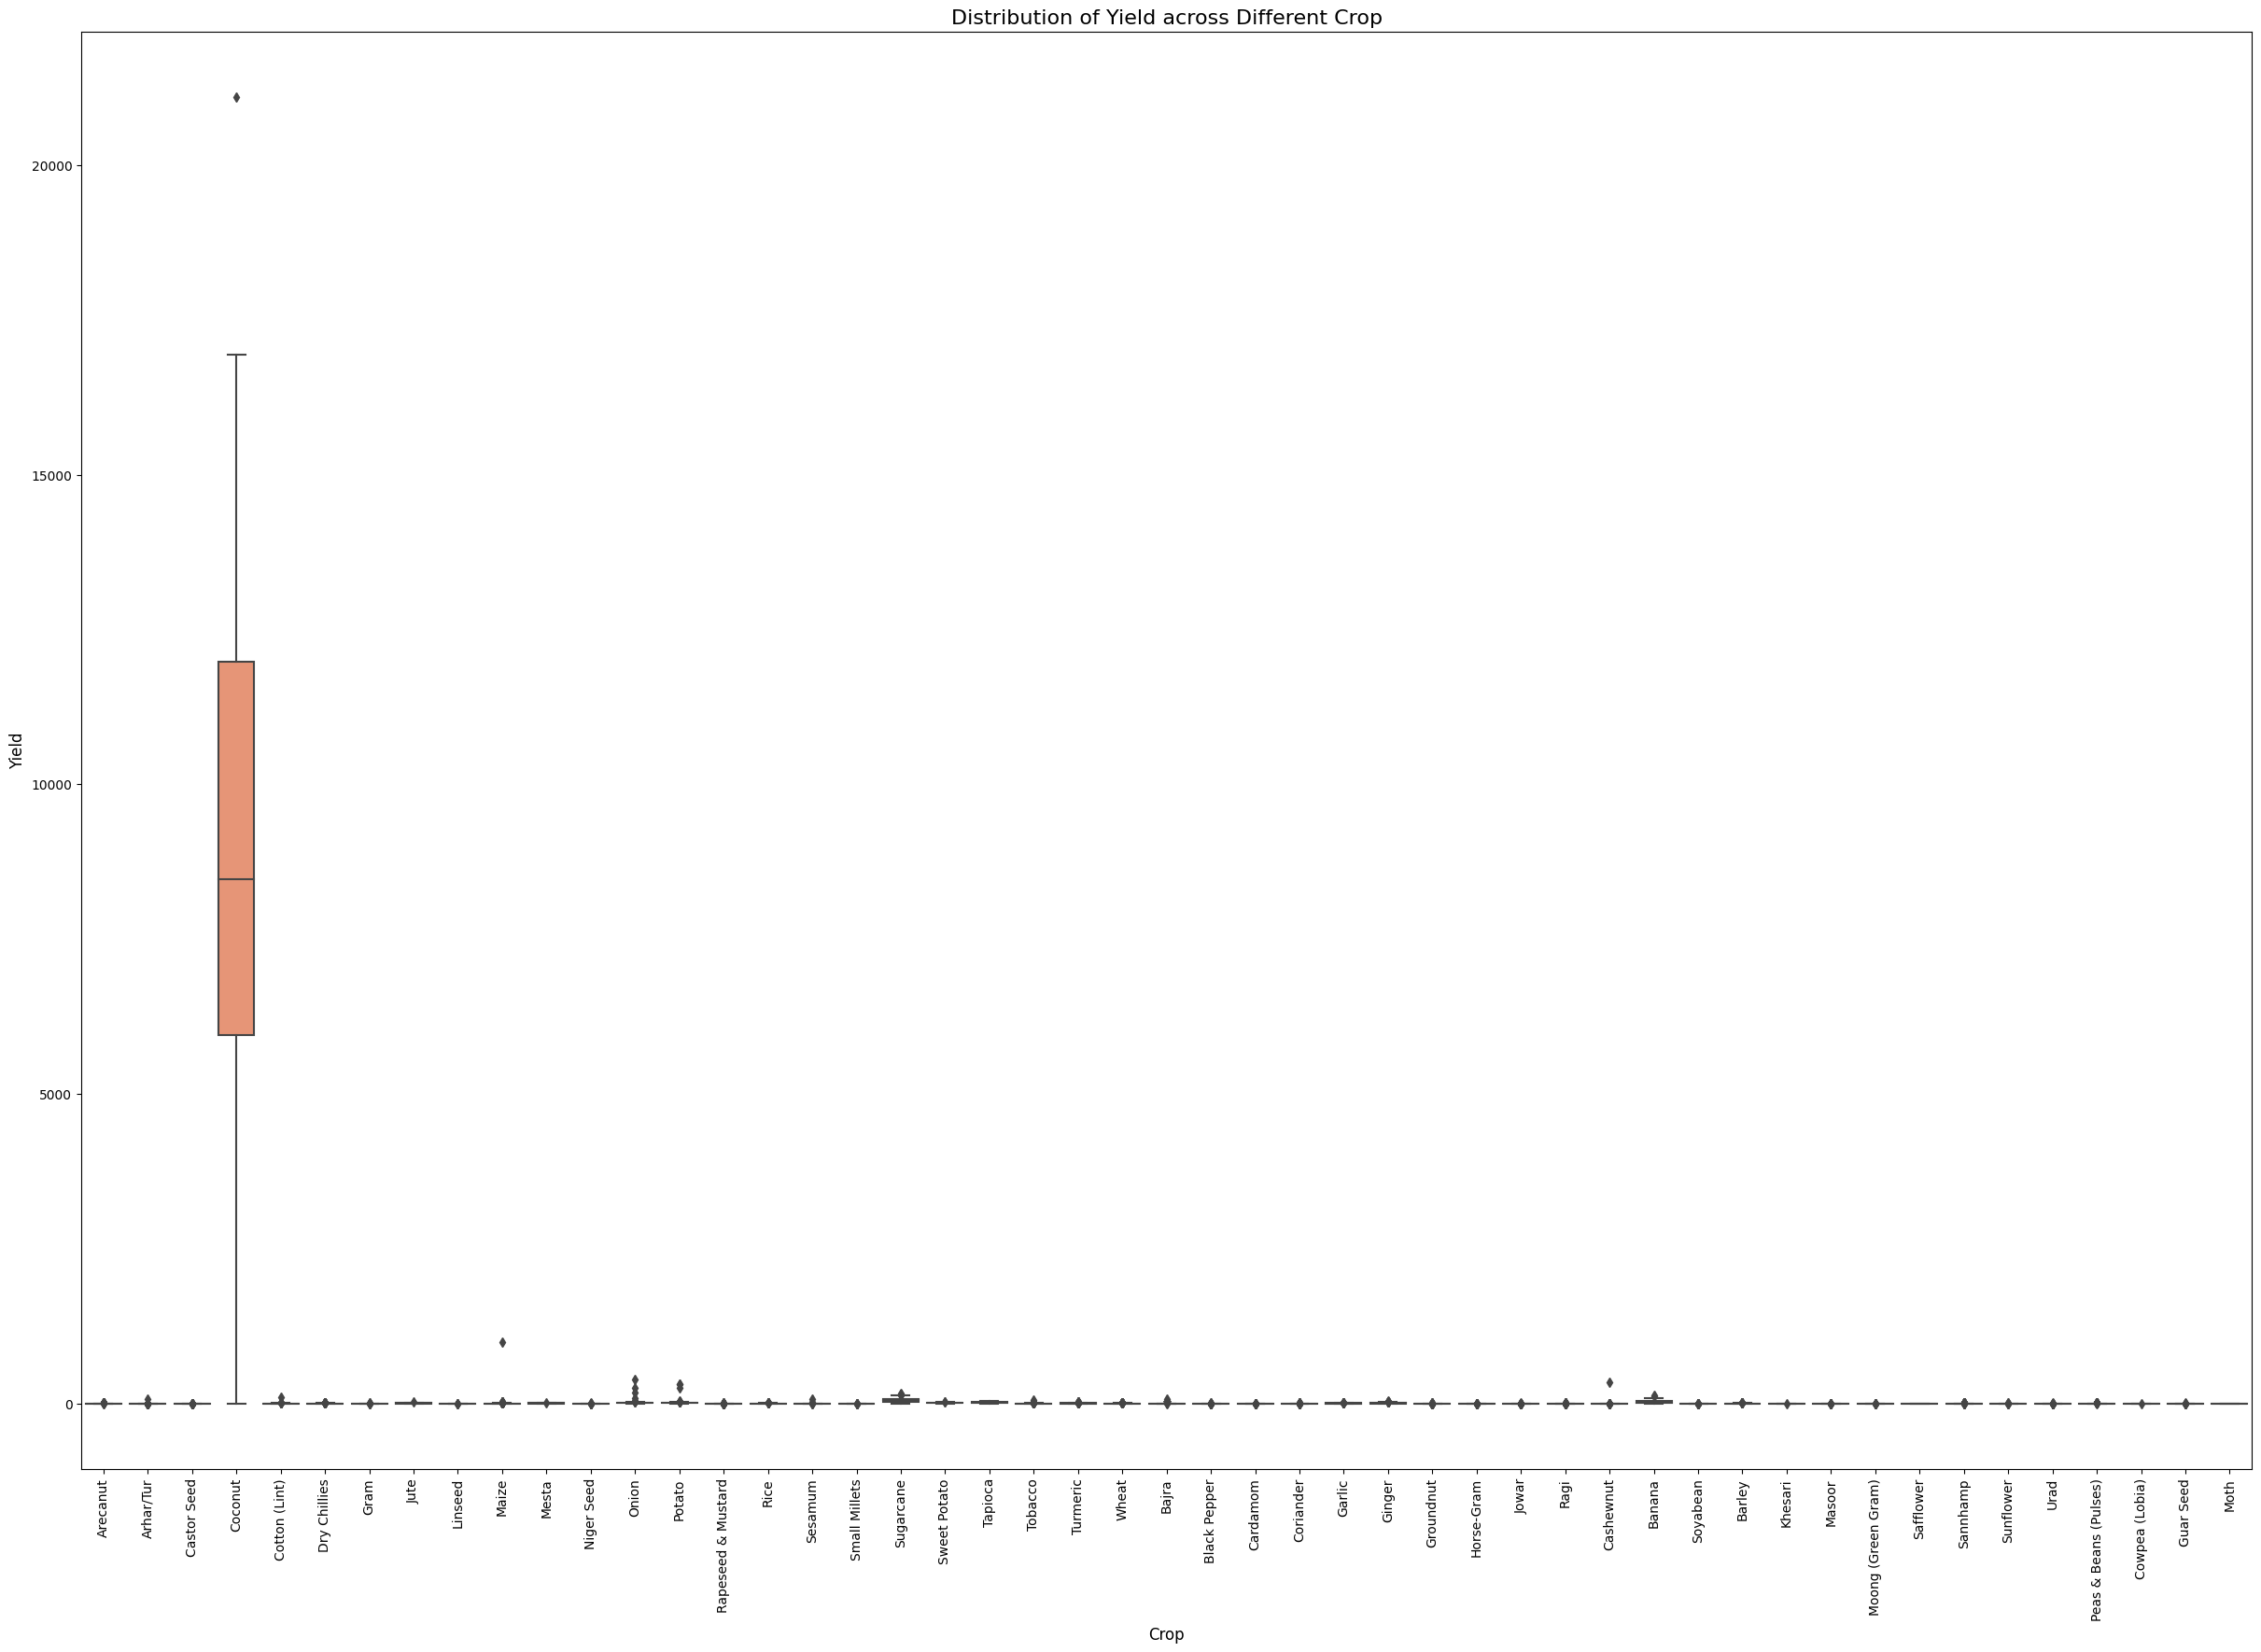

In [13]:
# Distribution of Yield across Different States/UT
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Yield', data=data)

# Add titles and labels
plt.title('Distribution of Yield across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Yield', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Yield across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Yield', data=data)

# Add titles and labels
plt.title('Distribution of Yield across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Yield', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Yield across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Yield', data=data)

# Add titles and labels
plt.title('Distribution of Yield across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Yield', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



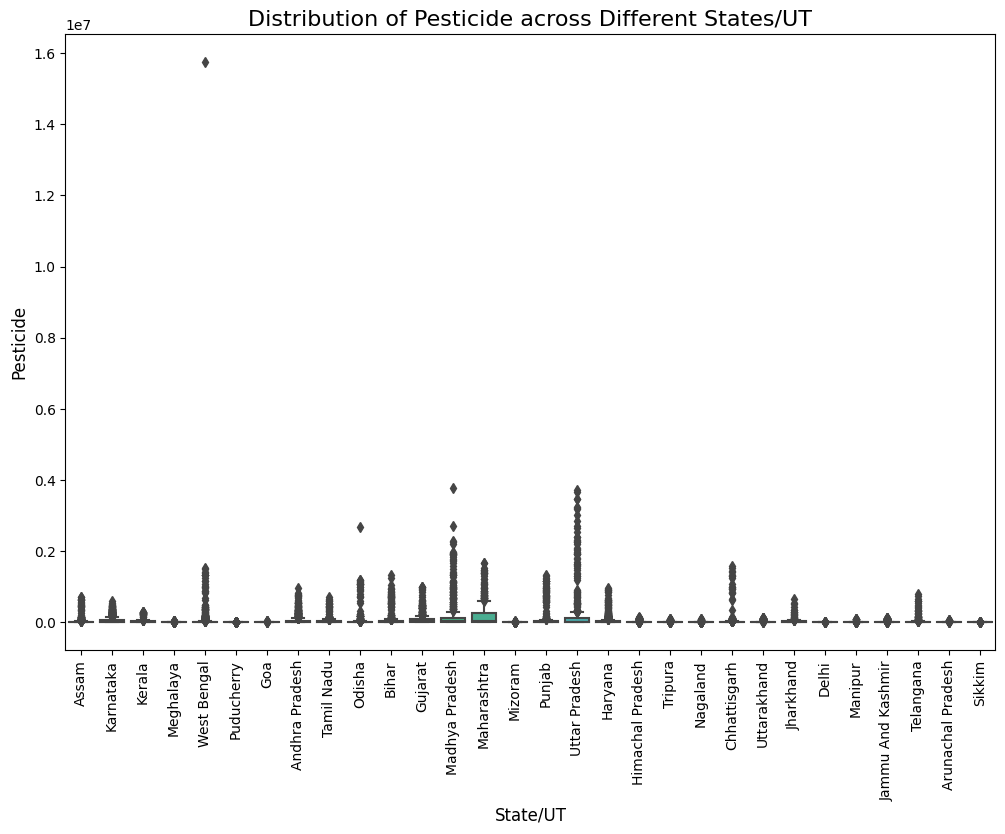

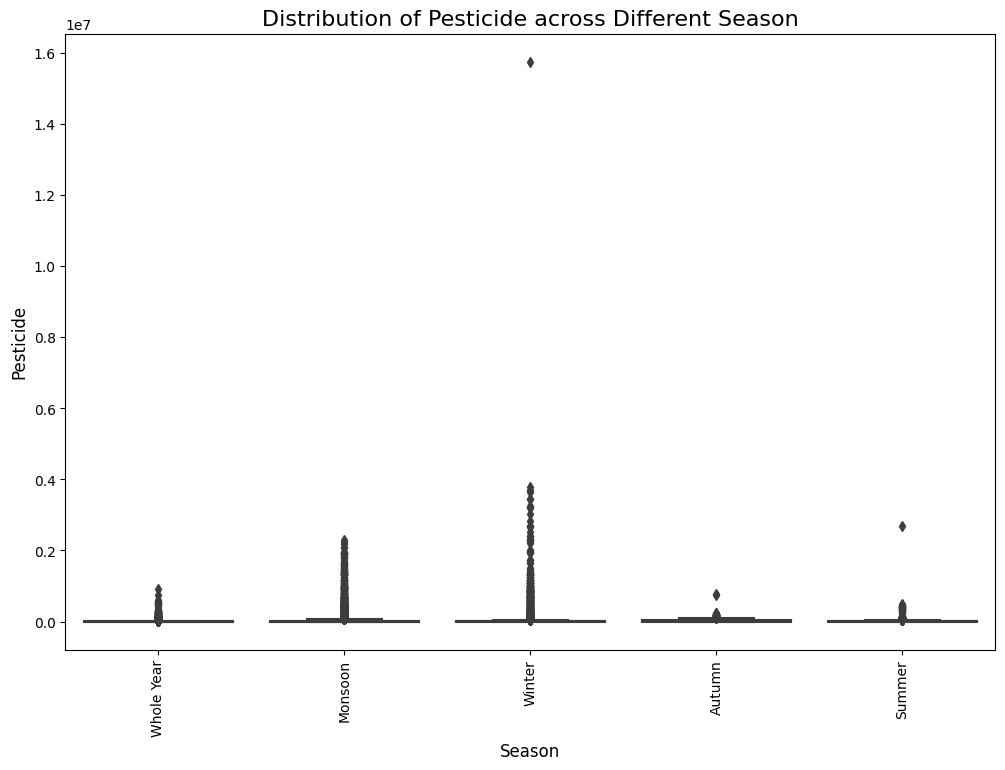

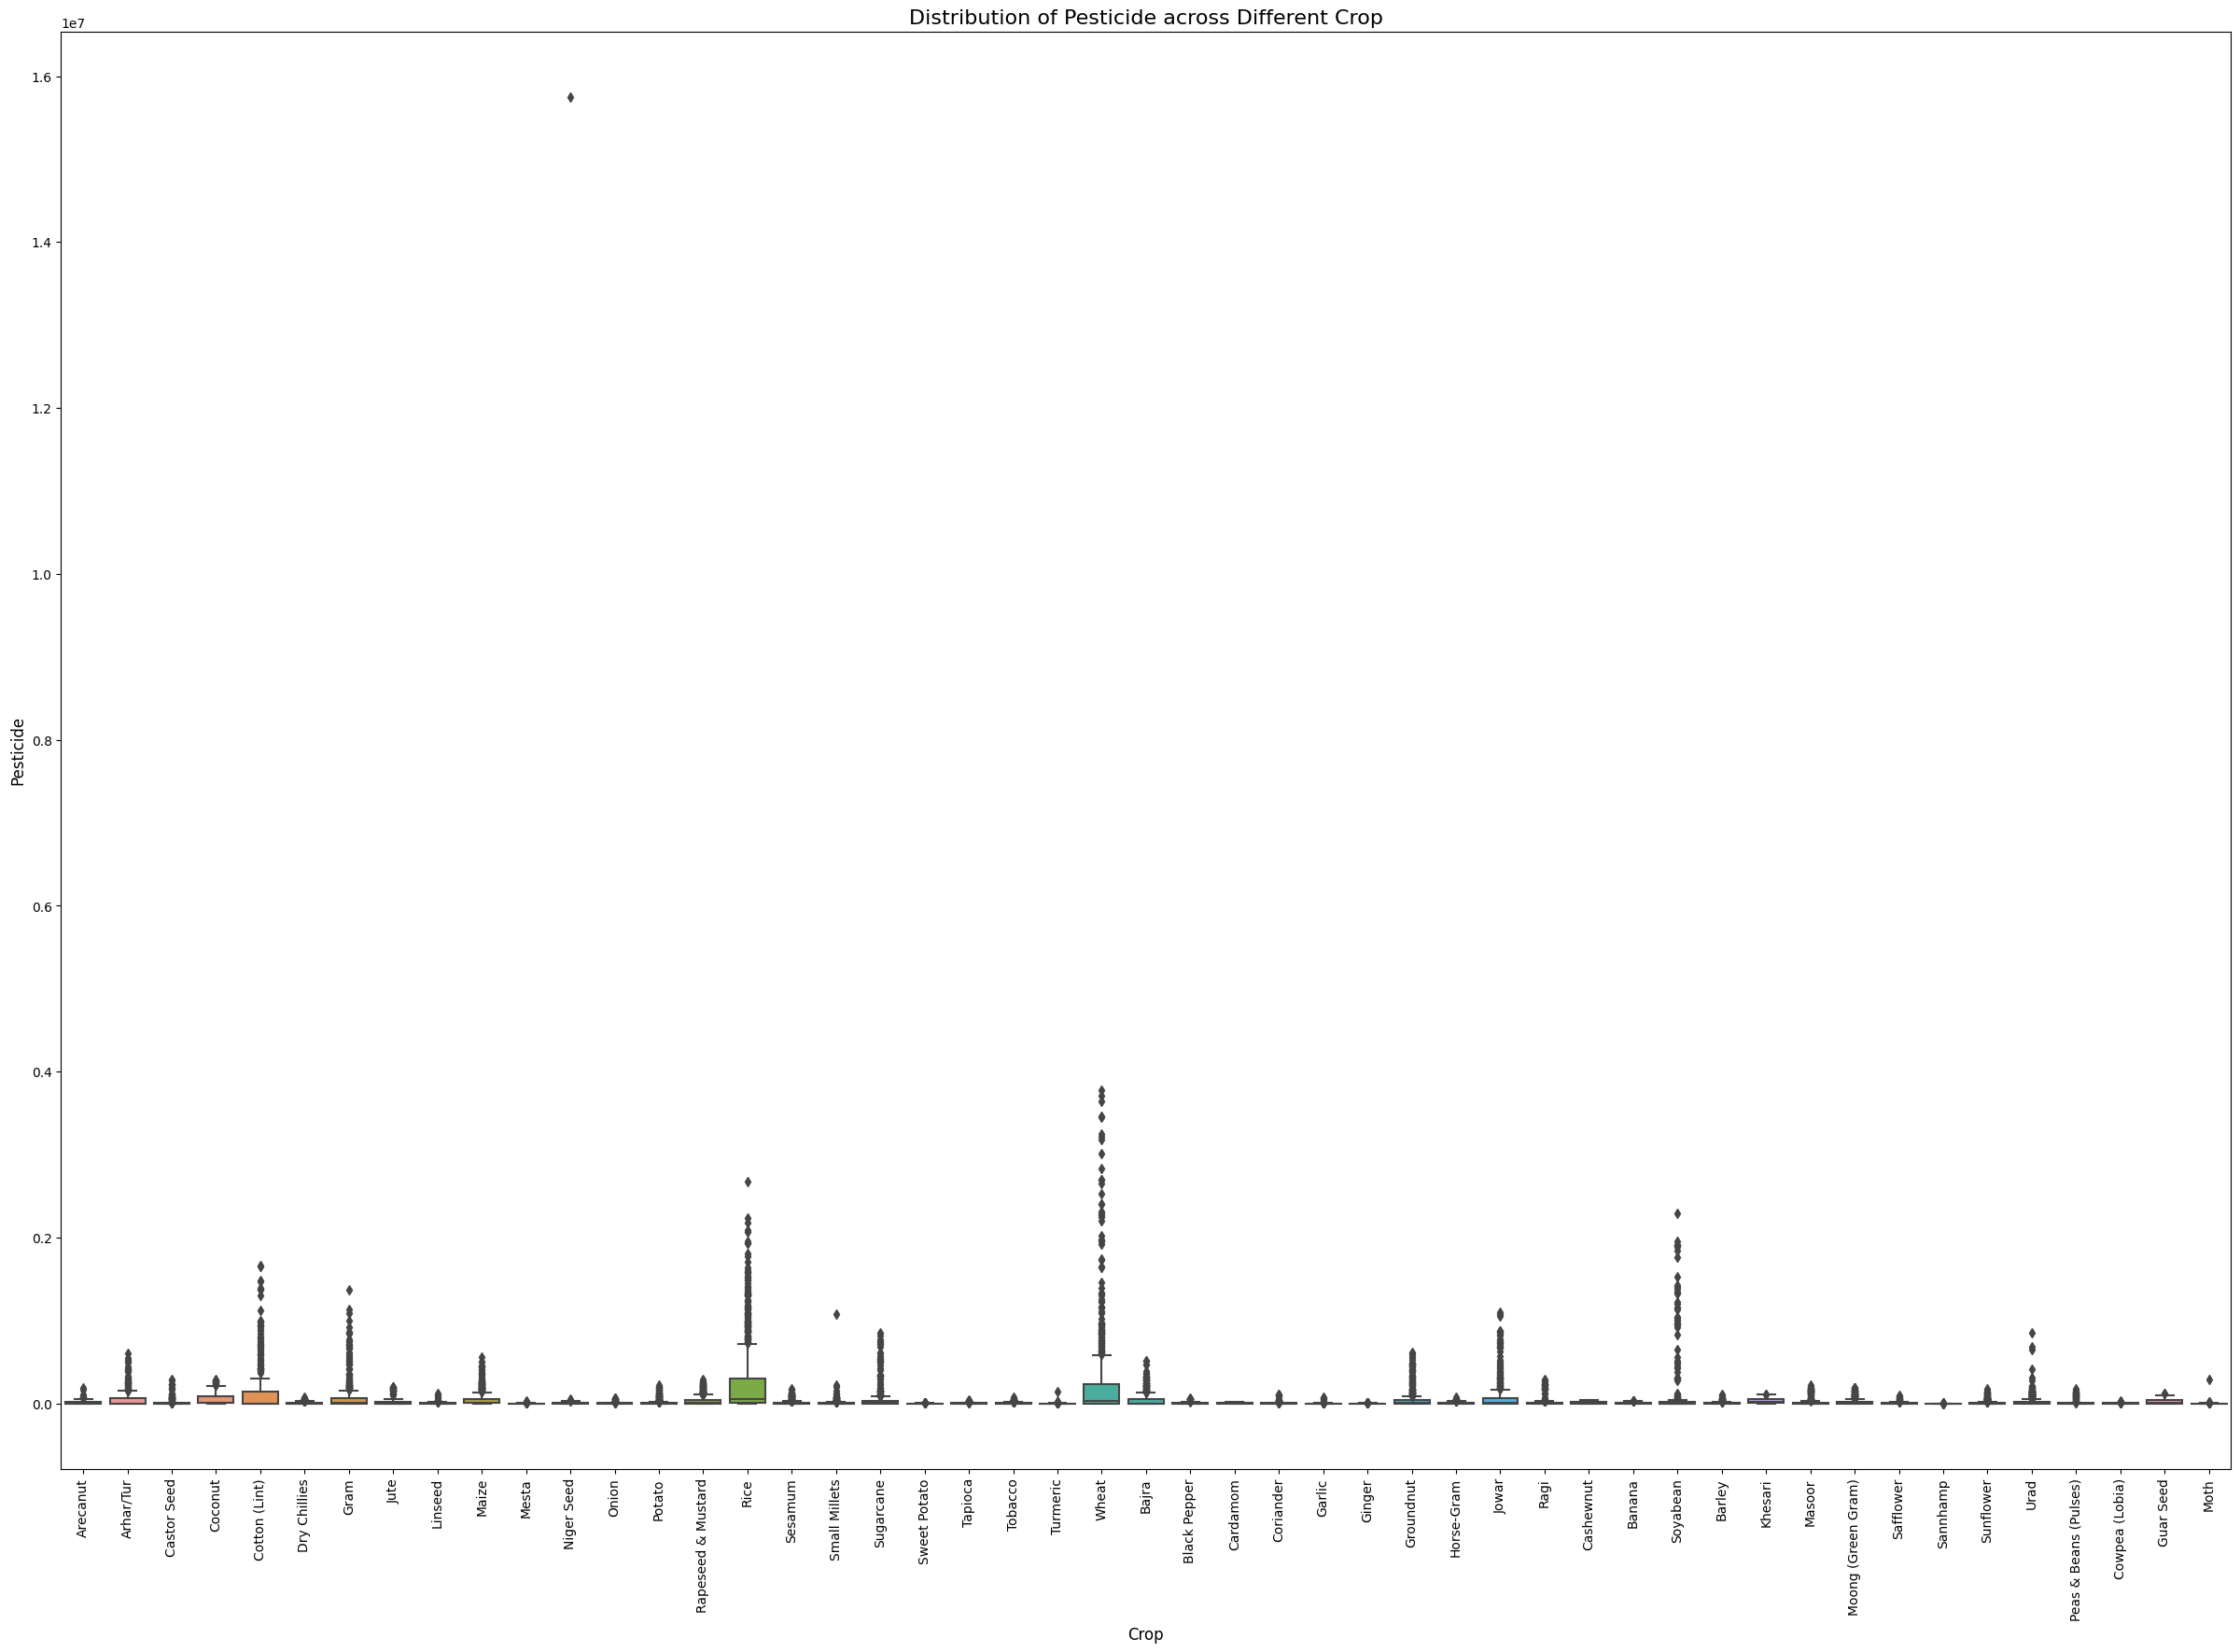

In [14]:
# Distribution of Pesticide across Different States/UT
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Pesticide', data=data)

# Add titles and labels
plt.title('Distribution of Pesticide across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Pesticide', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Pesticide across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Pesticide', data=data)

# Add titles and labels
plt.title('Distribution of Pesticide across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Pesticide', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Pesticide across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Pesticide', data=data)

# Add titles and labels
plt.title('Distribution of Pesticide across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Pesticide', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



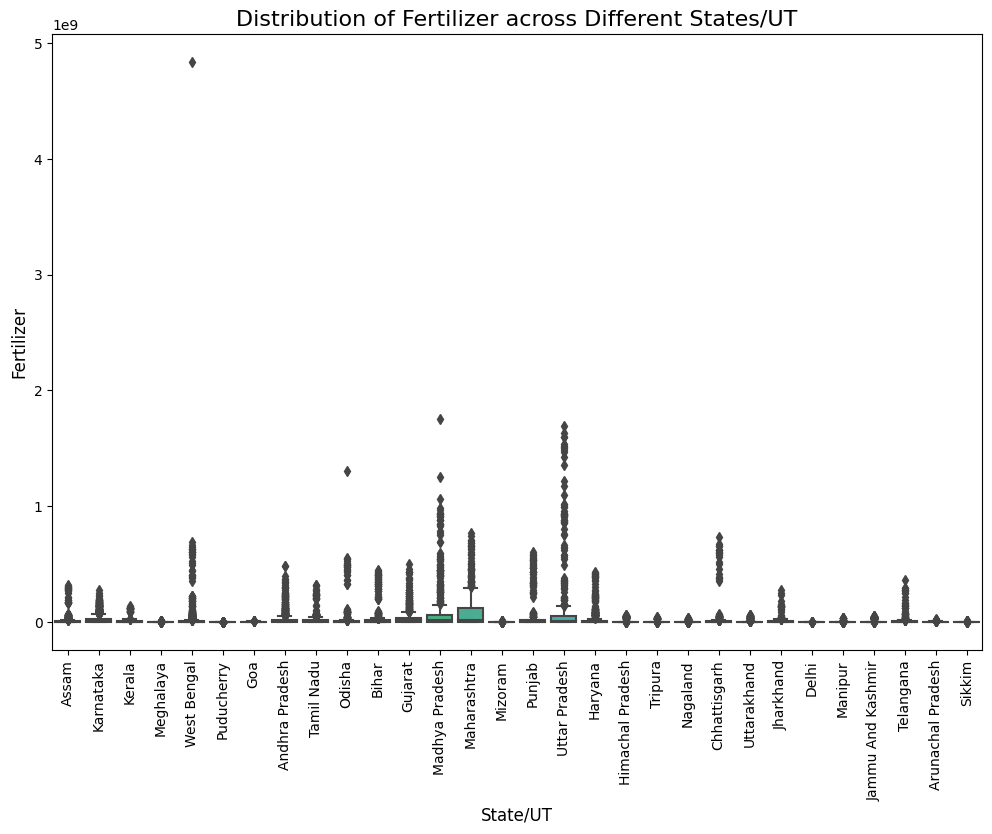

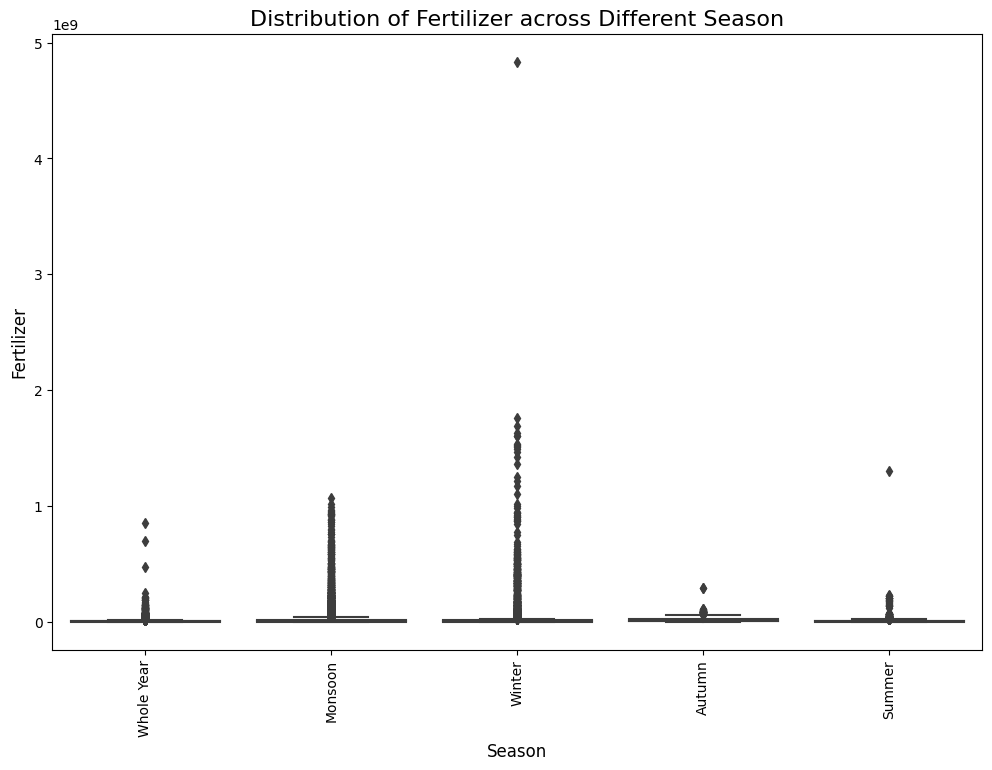

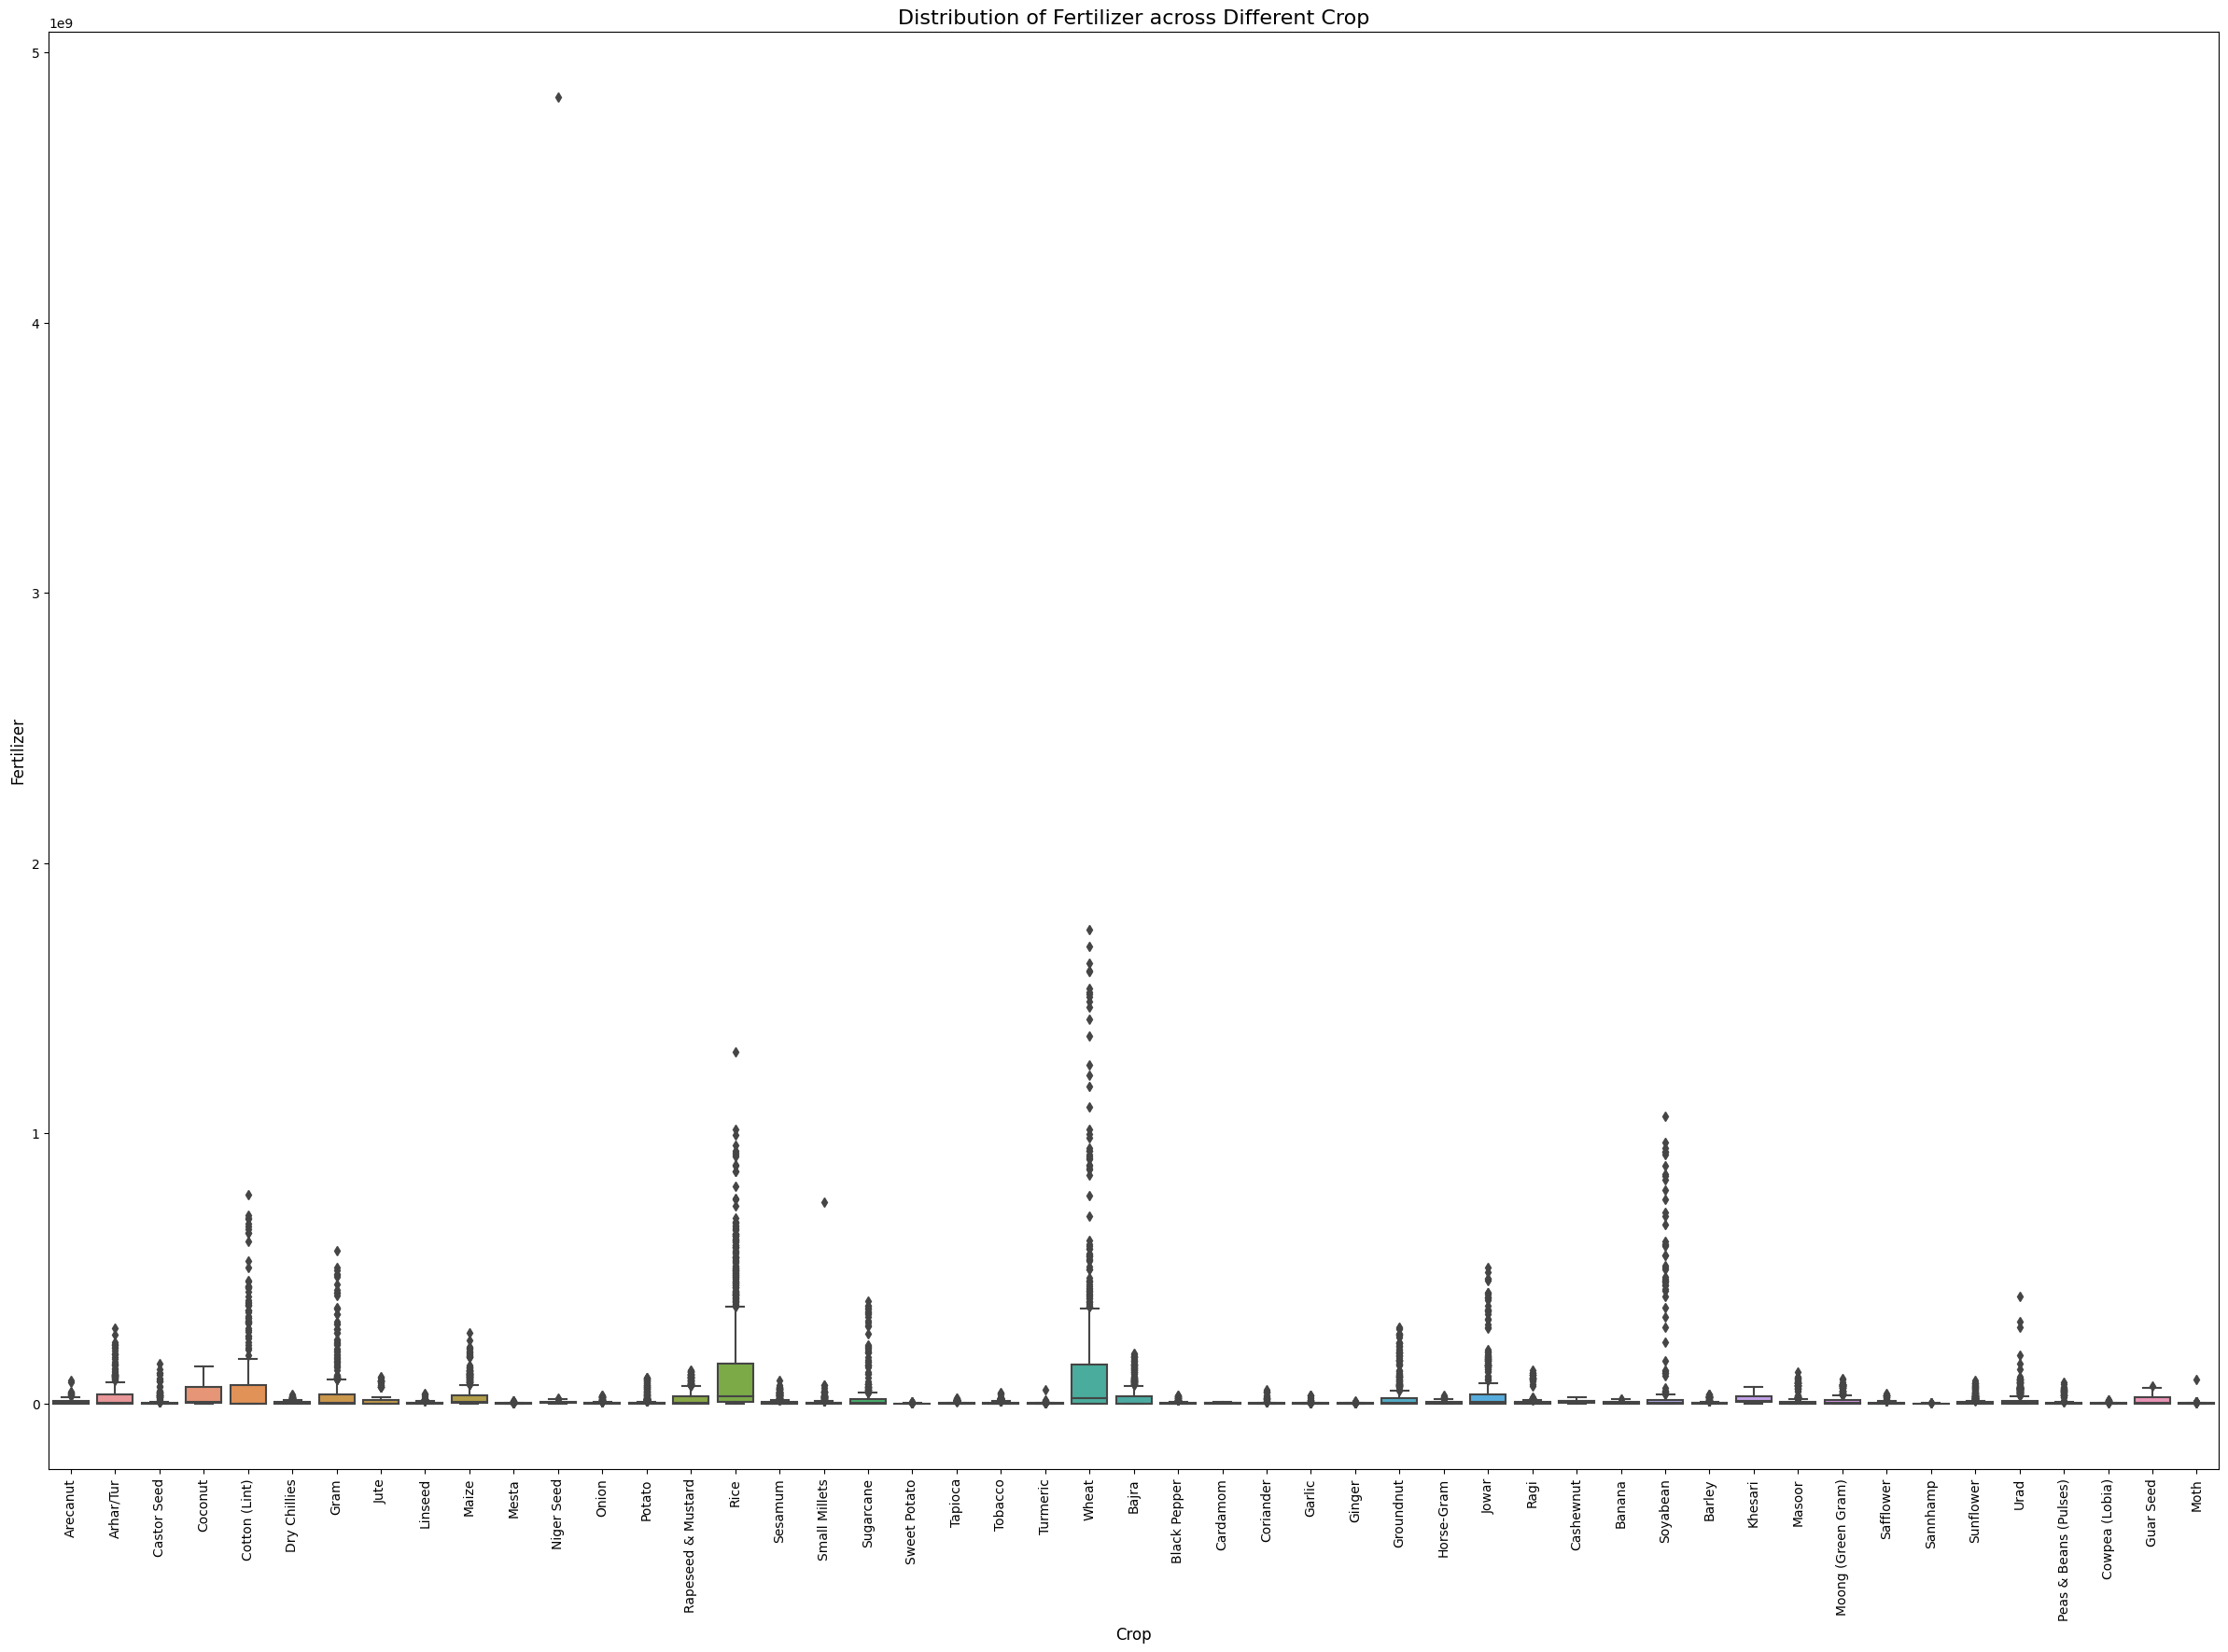

In [15]:
# Distribution of Fertilizer across Different States/UT
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Fertilizer', data=data)

# Add titles and labels
plt.title('Distribution of Fertilizer across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Fertilizer', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Fertilizer across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Fertilizer', data=data)

# Add titles and labels
plt.title('Distribution of Fertilizer across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Fertilizer', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Fertilizer across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Fertilizer', data=data)

# Add titles and labels
plt.title('Distribution of Fertilizer across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Fertilizer', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



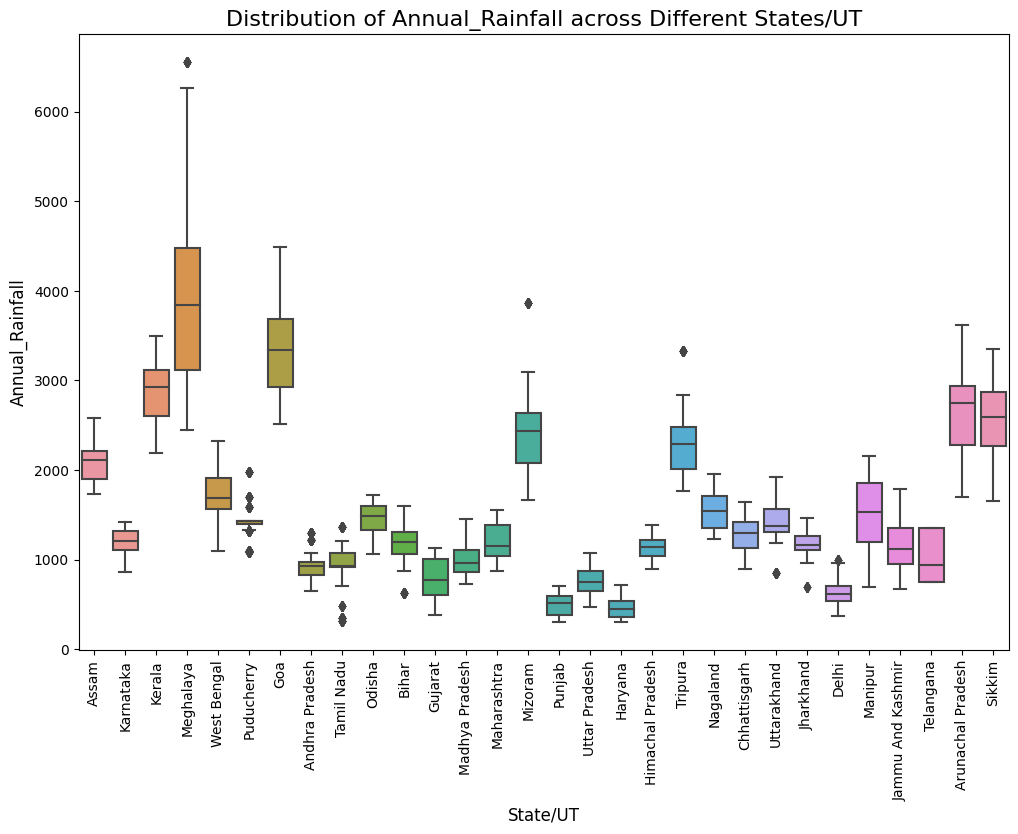

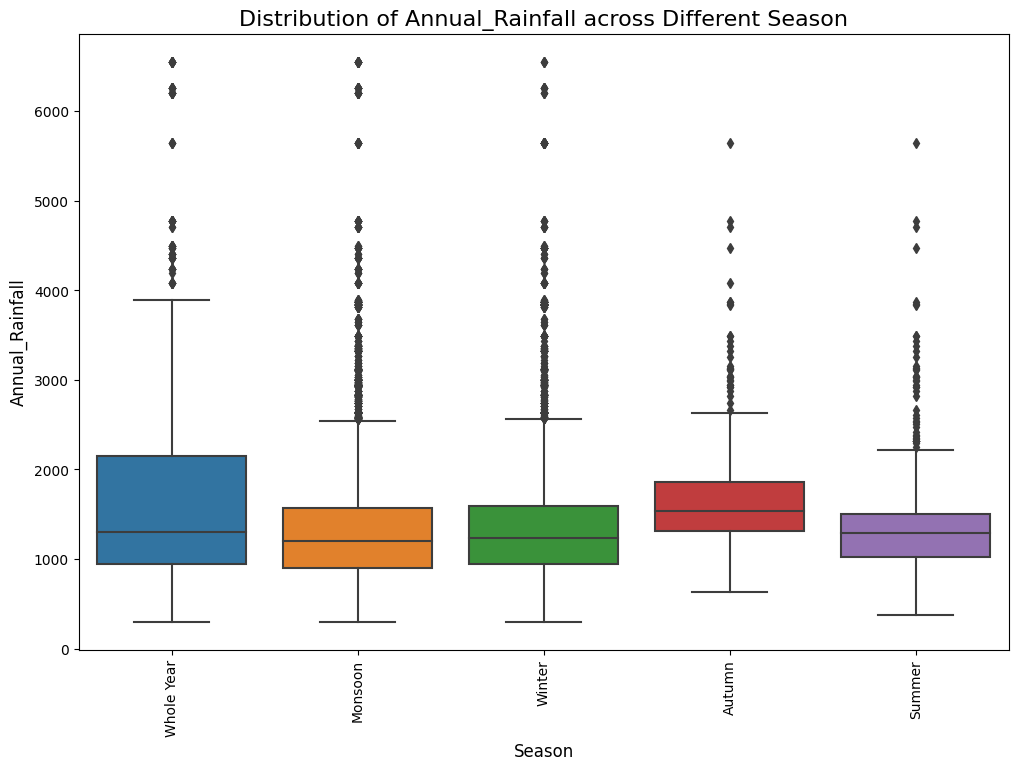

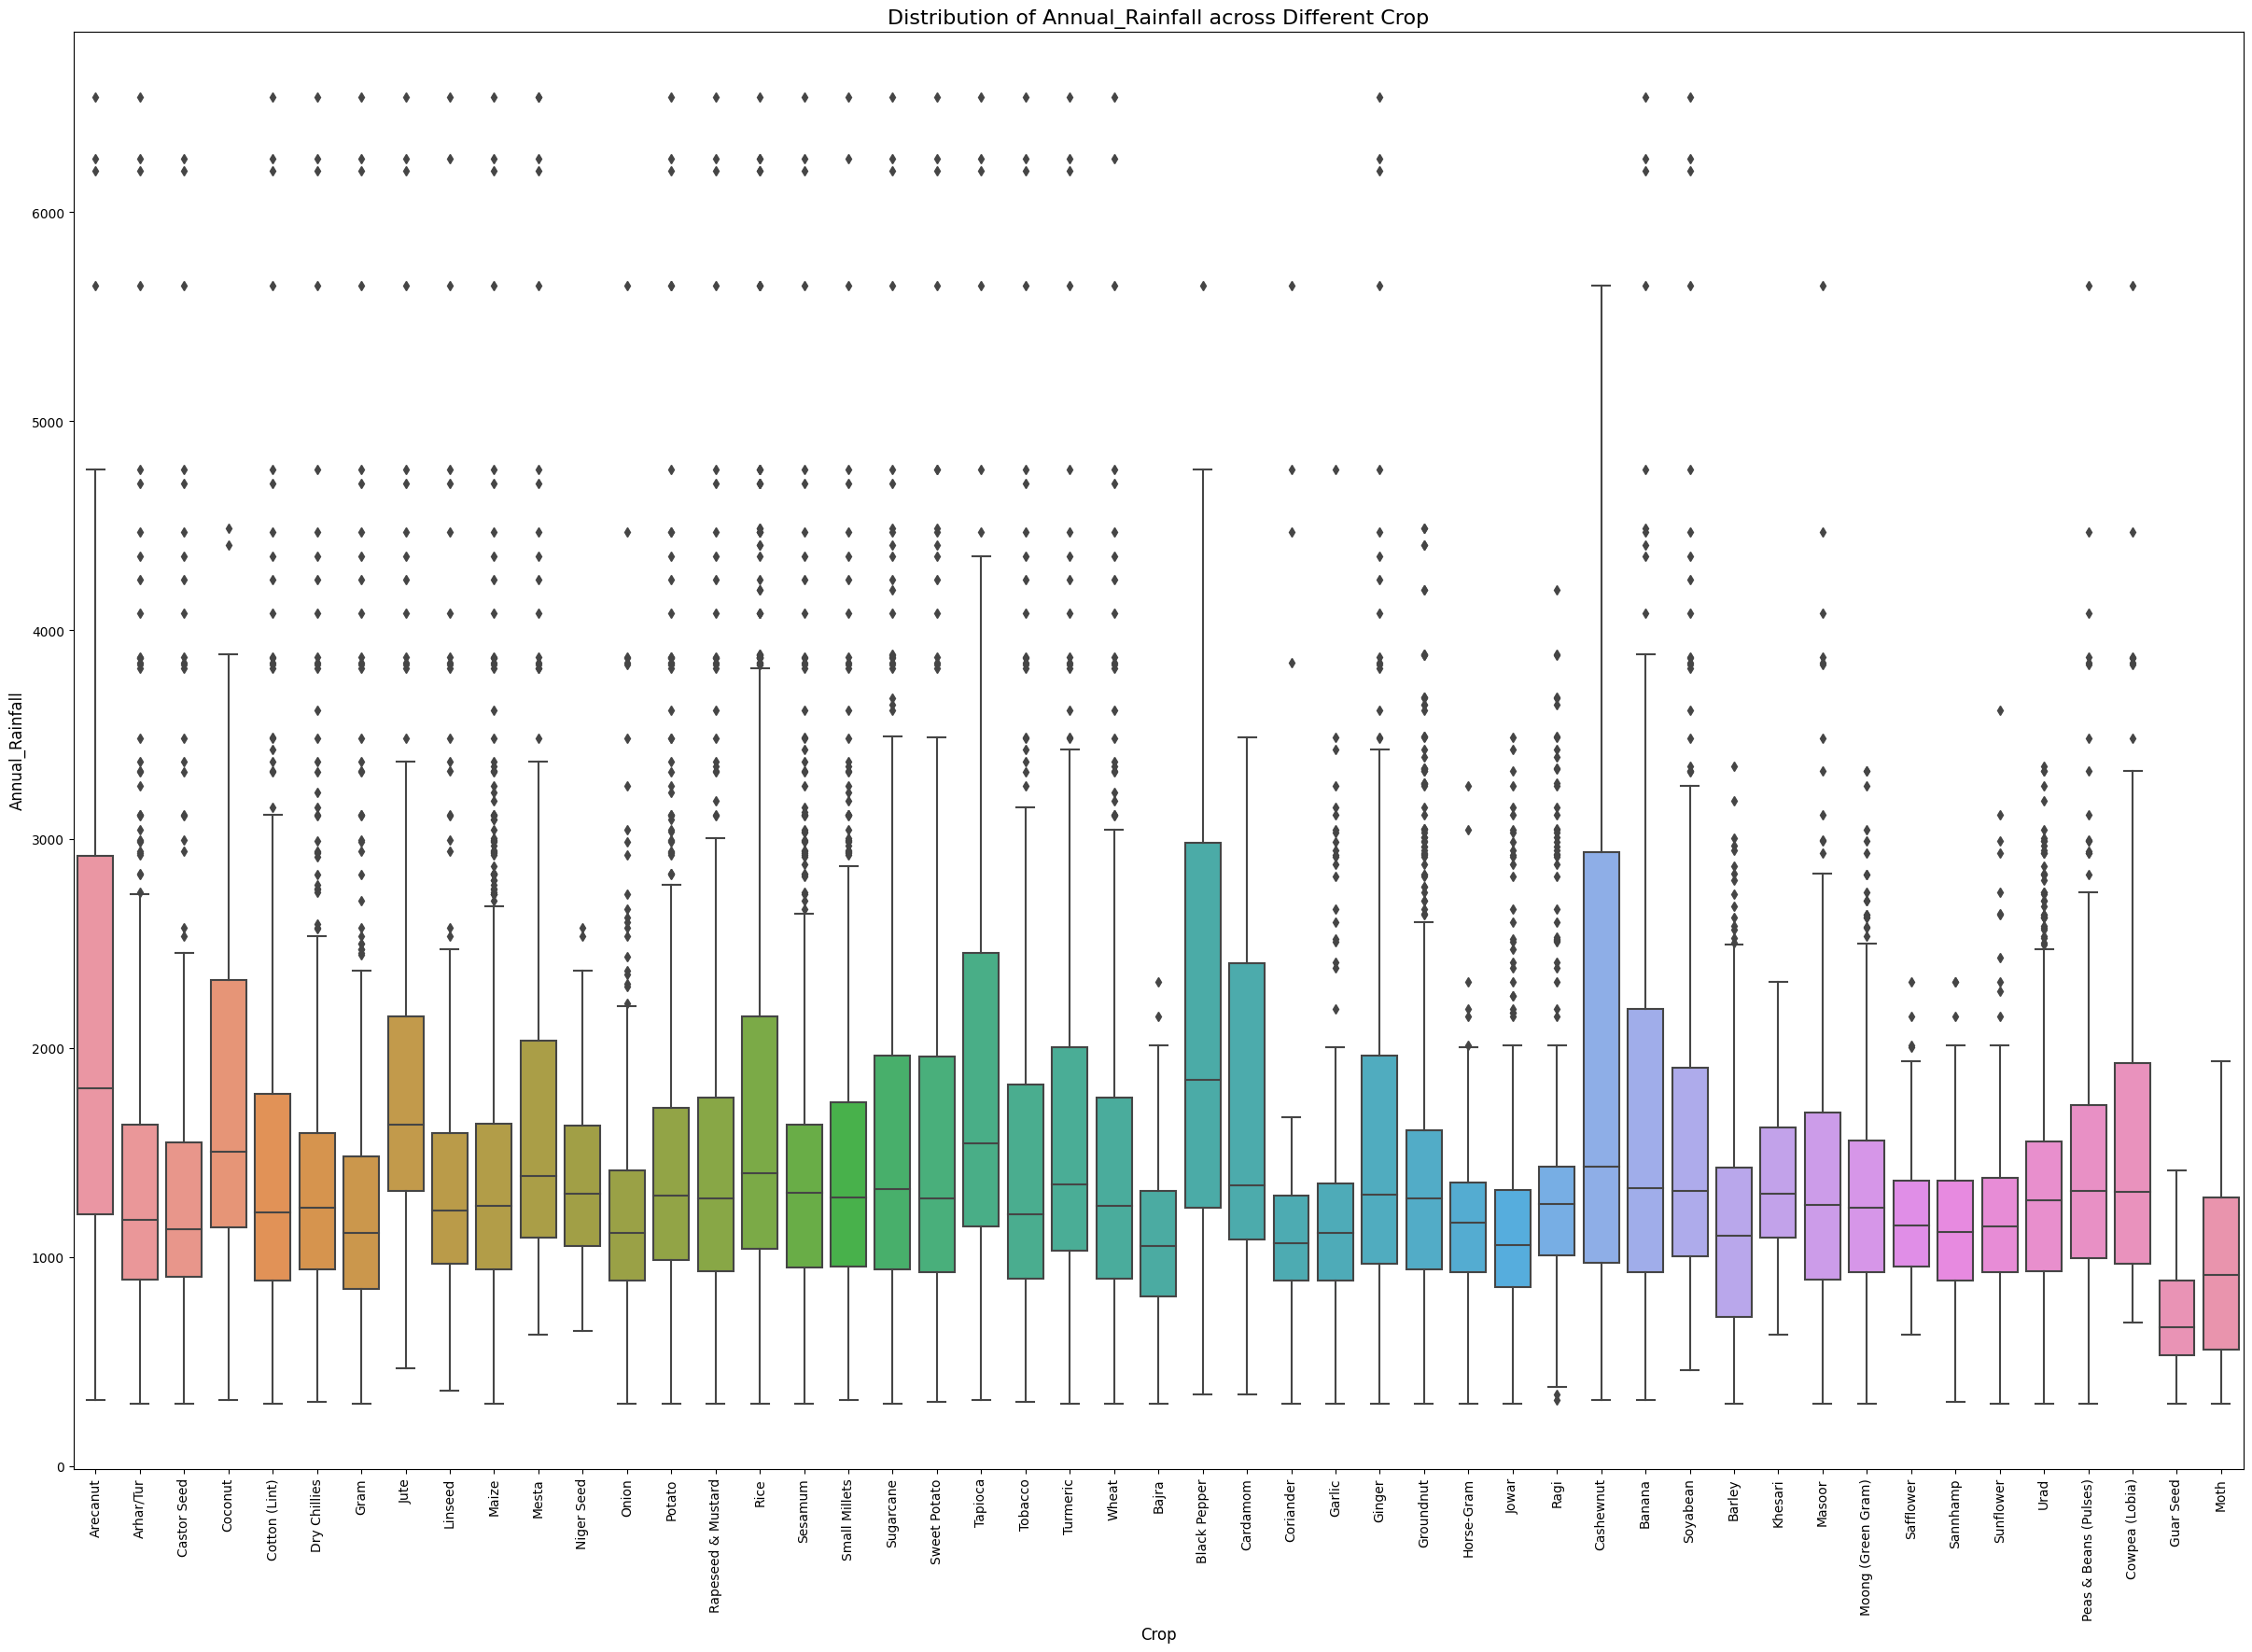

In [16]:
# Distribution of Annual_Rainfall across Different States/UT
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Annual_Rainfall', data=data)

# Add titles and labels
plt.title('Distribution of Annual_Rainfall across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Annual_Rainfall', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Annual_Rainfall across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Annual_Rainfall', data=data)

# Add titles and labels
plt.title('Distribution of Annual_Rainfall across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Annual_Rainfall', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Annual_Rainfall across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Annual_Rainfall', data=data)

# Add titles and labels
plt.title('Distribution of Annual_Rainfall across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Annual_Rainfall', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



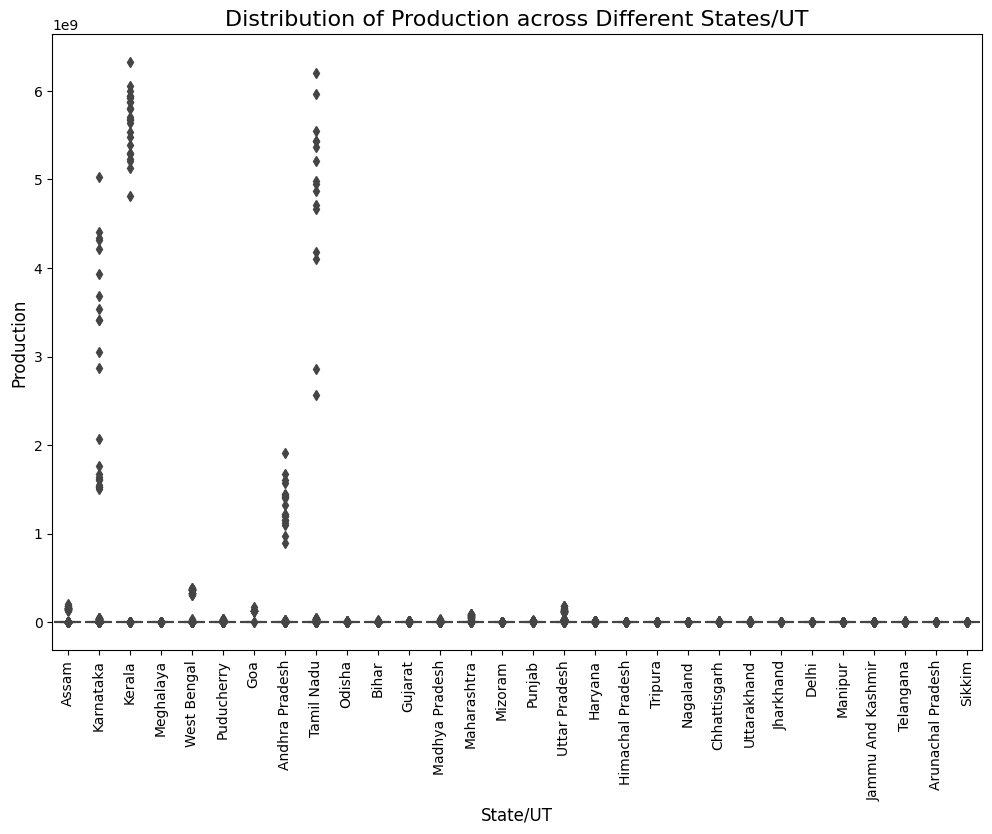

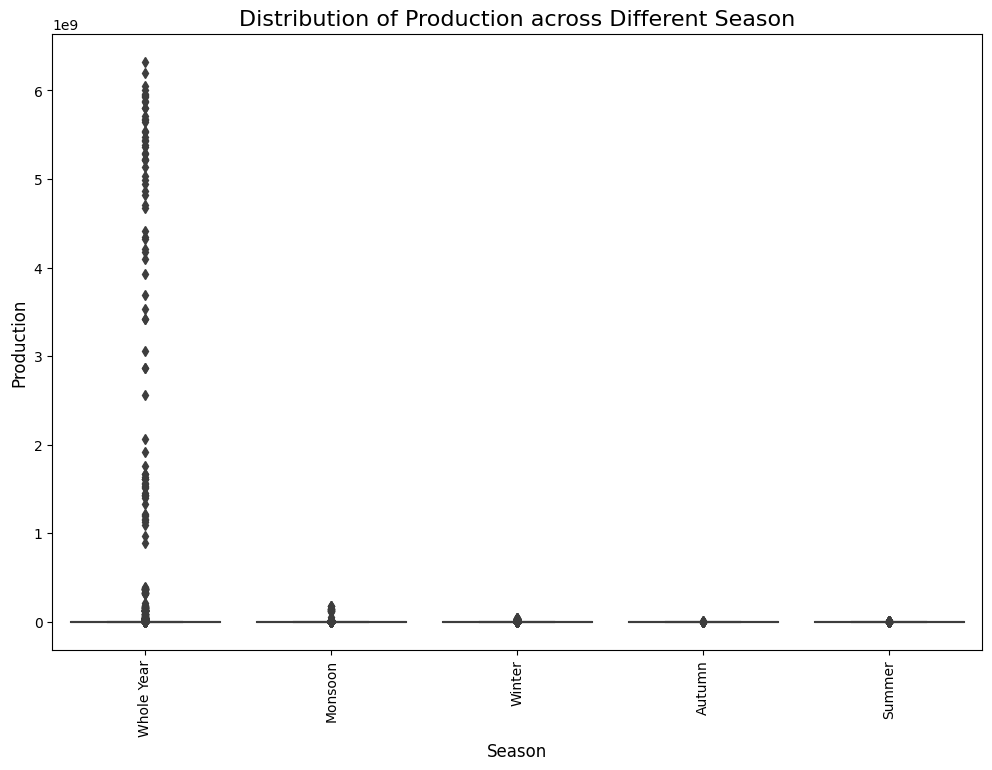

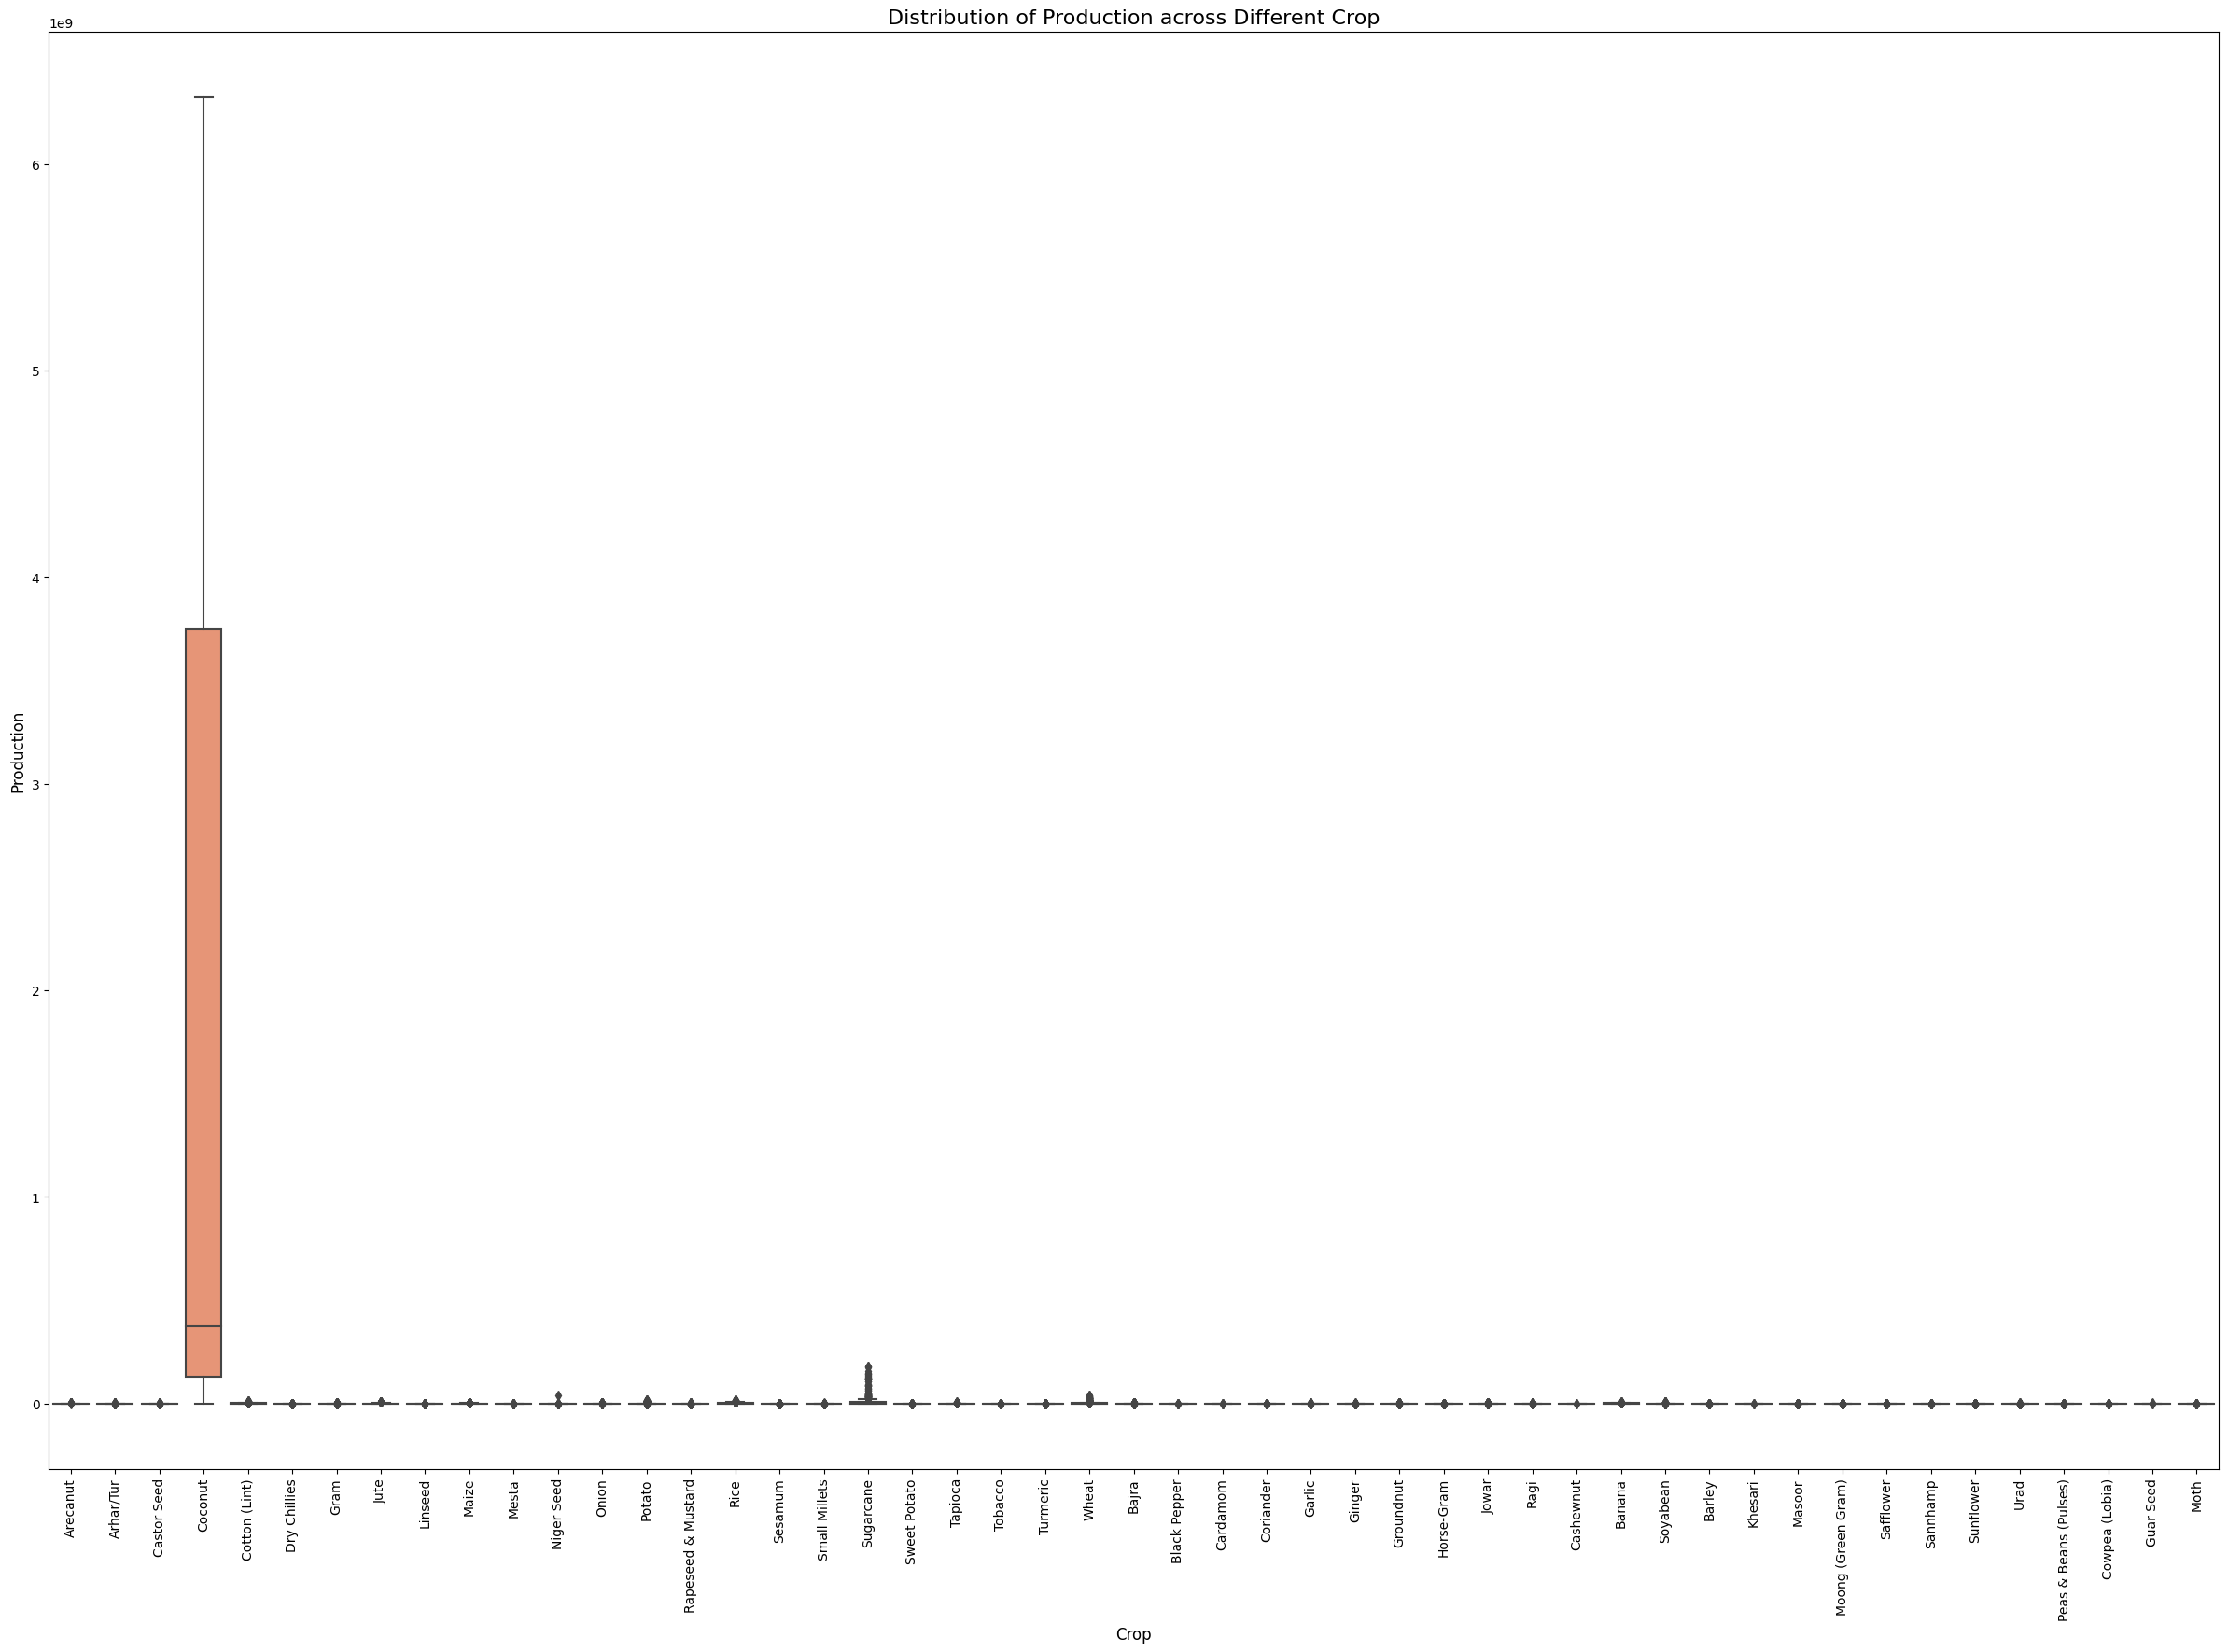

In [17]:
# Distribution of Production across Different States/UT
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Production', data=data)

# Add titles and labels
plt.title('Distribution of Production across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Production', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Production across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Production', data=data)

# Add titles and labels
plt.title('Distribution of Production across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Production', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Production across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Production', data=data)

# Add titles and labels
plt.title('Distribution of Production across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Production', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



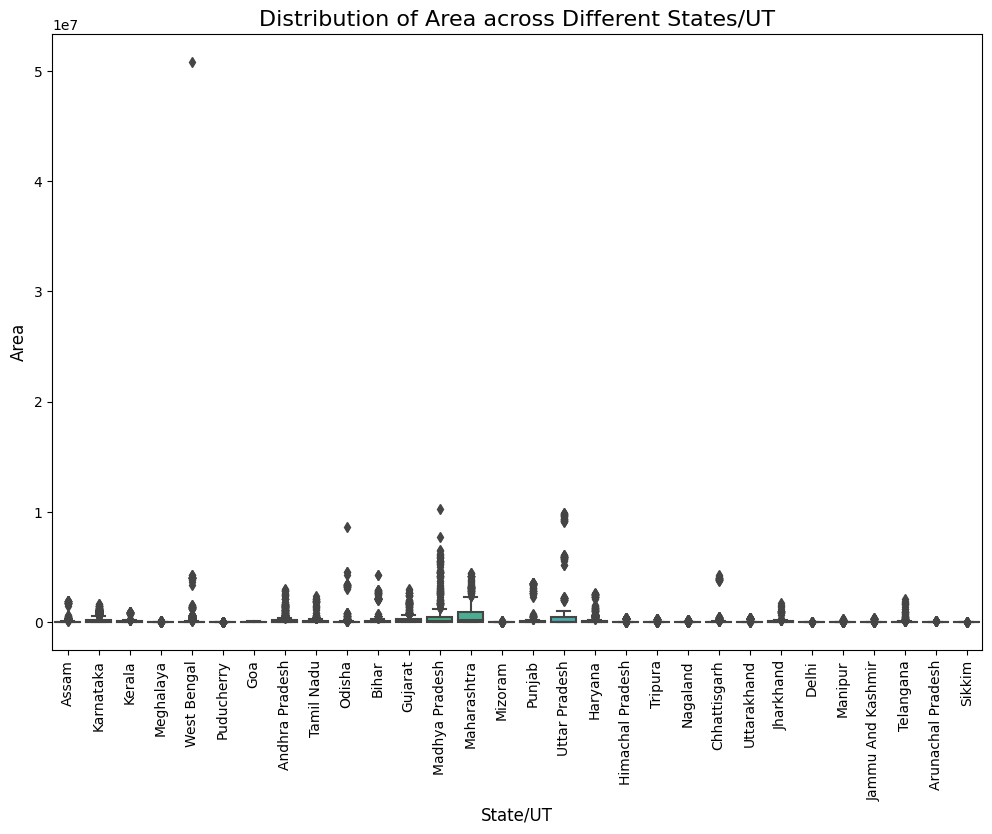

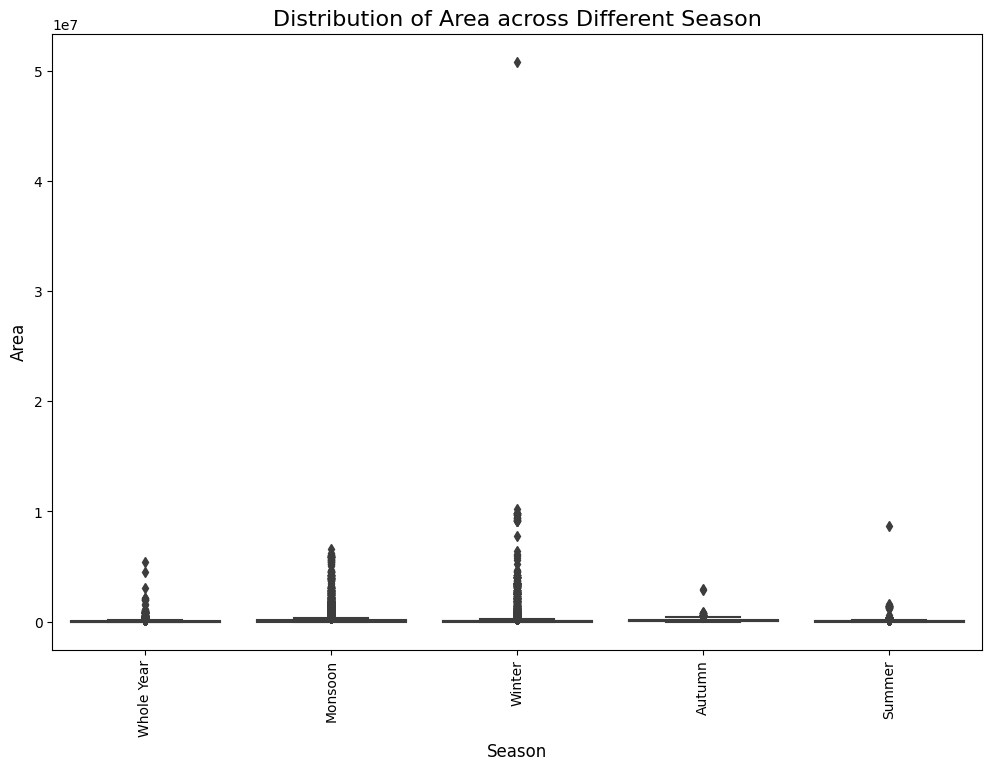

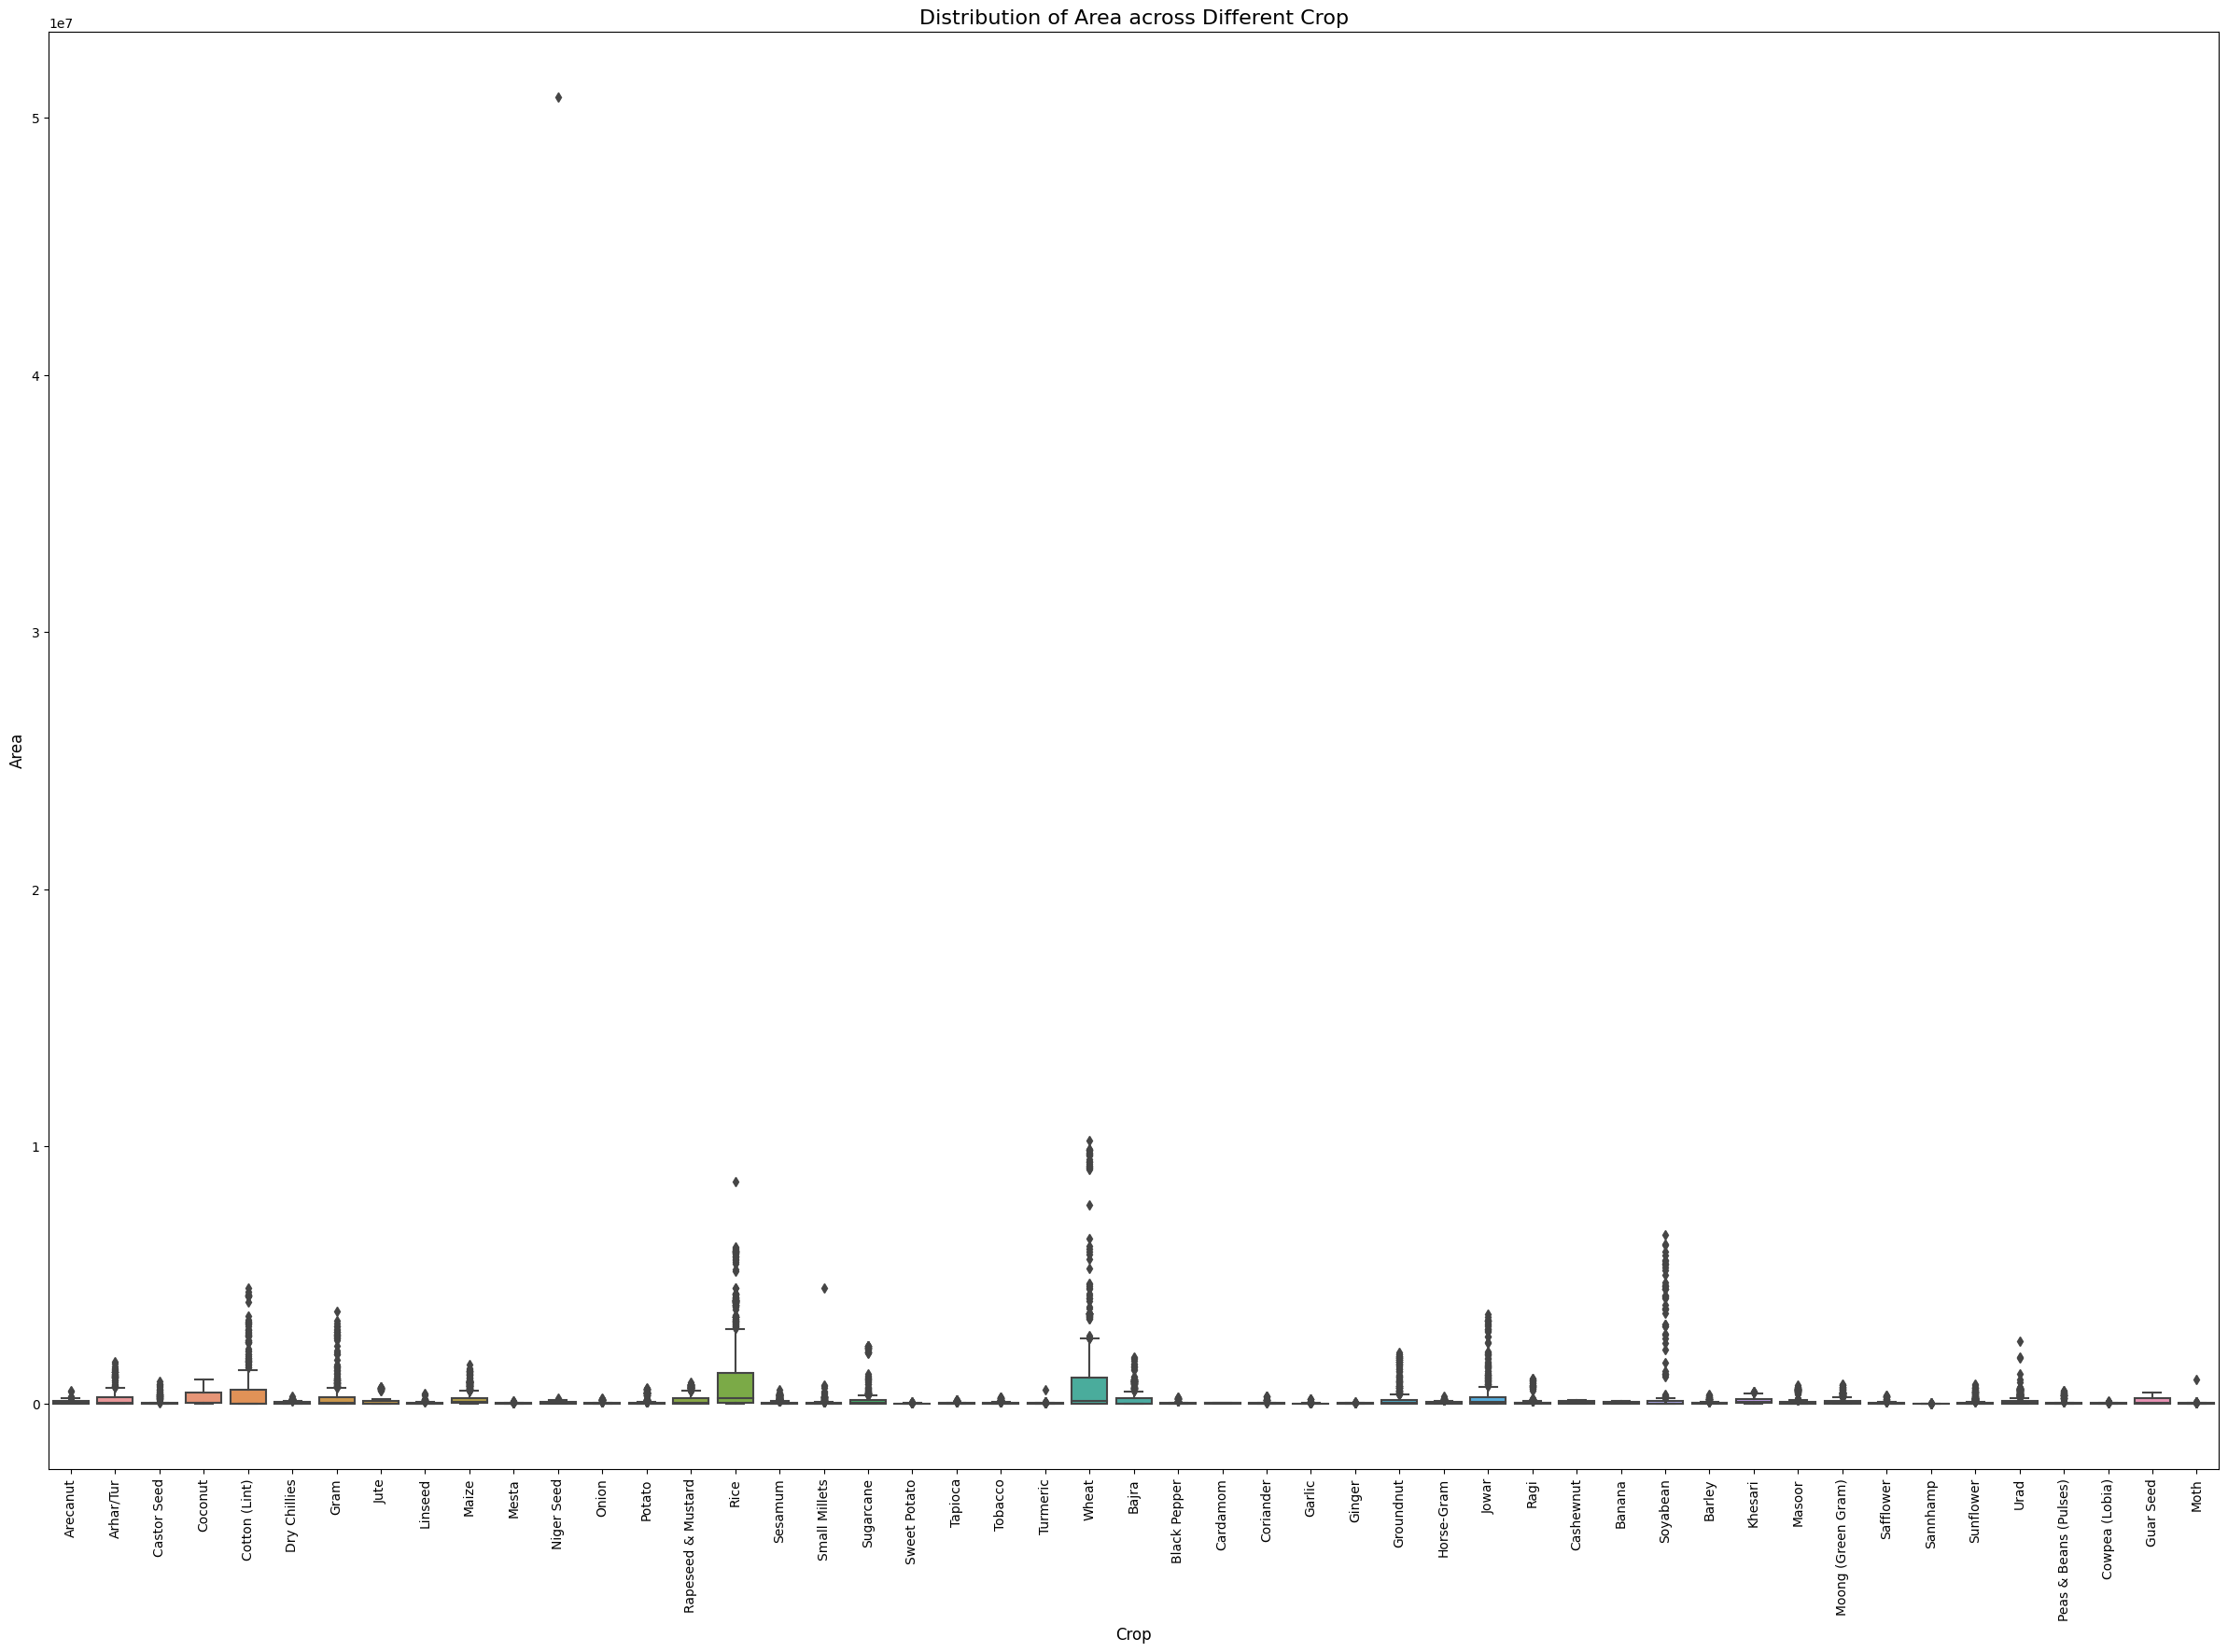

In [18]:
# Distribution of Area across Different States/UT
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Area', data=data)

# Add titles and labels
plt.title('Distribution of Area across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Area', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Area across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Area', data=data)

# Add titles and labels
plt.title('Distribution of Area across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Area', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Area across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Area', data=data)

# Add titles and labels
plt.title('Distribution of Area across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Area', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



In [19]:
# Step 3: Handle outliers
def handle_outliers(data, col, lower_bound, upper_bound, method="cap"):
    if method == "cap":
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    elif method == "remove":
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Cap outliers for now (alternative: use method="remove")
for col, bounds in outliers_info.items():
    data = handle_outliers(data, col, bounds['lower_bound'], bounds['upper_bound'], method="cap")

data.to_csv('SilverLayer_data.csv', index=False)

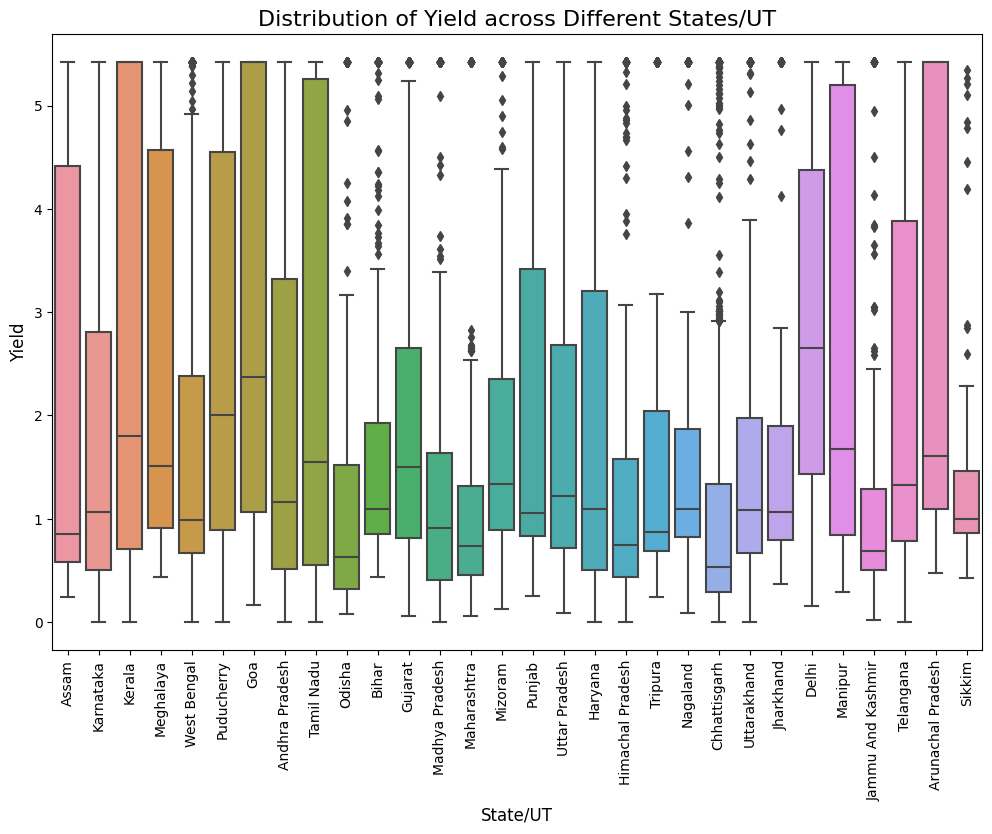

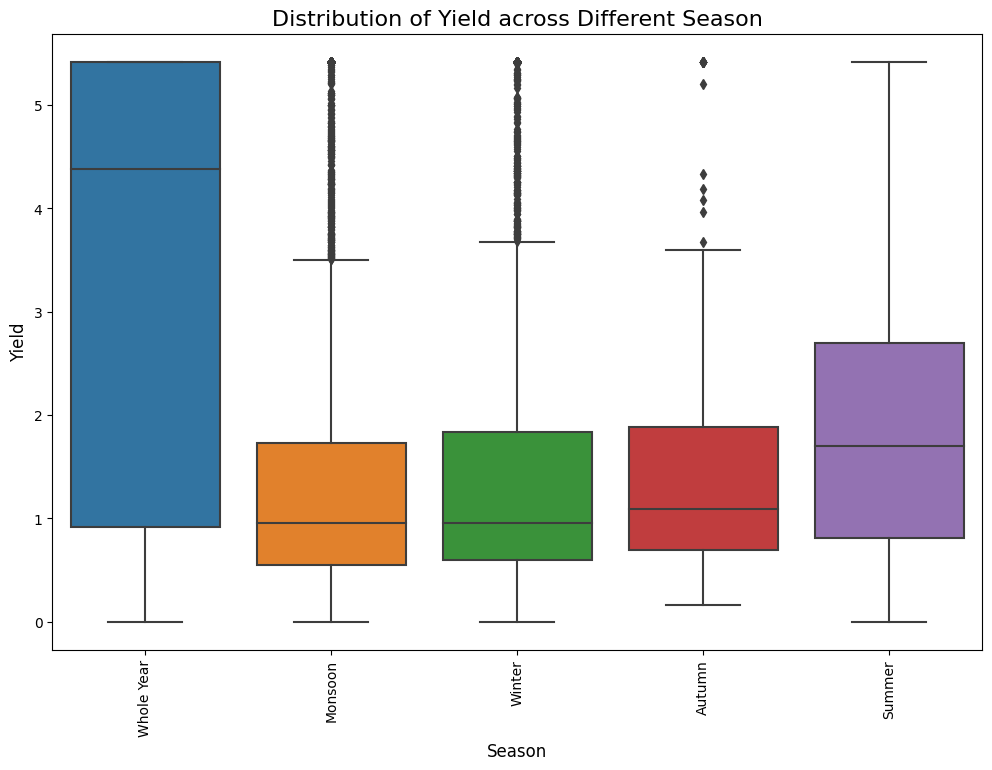

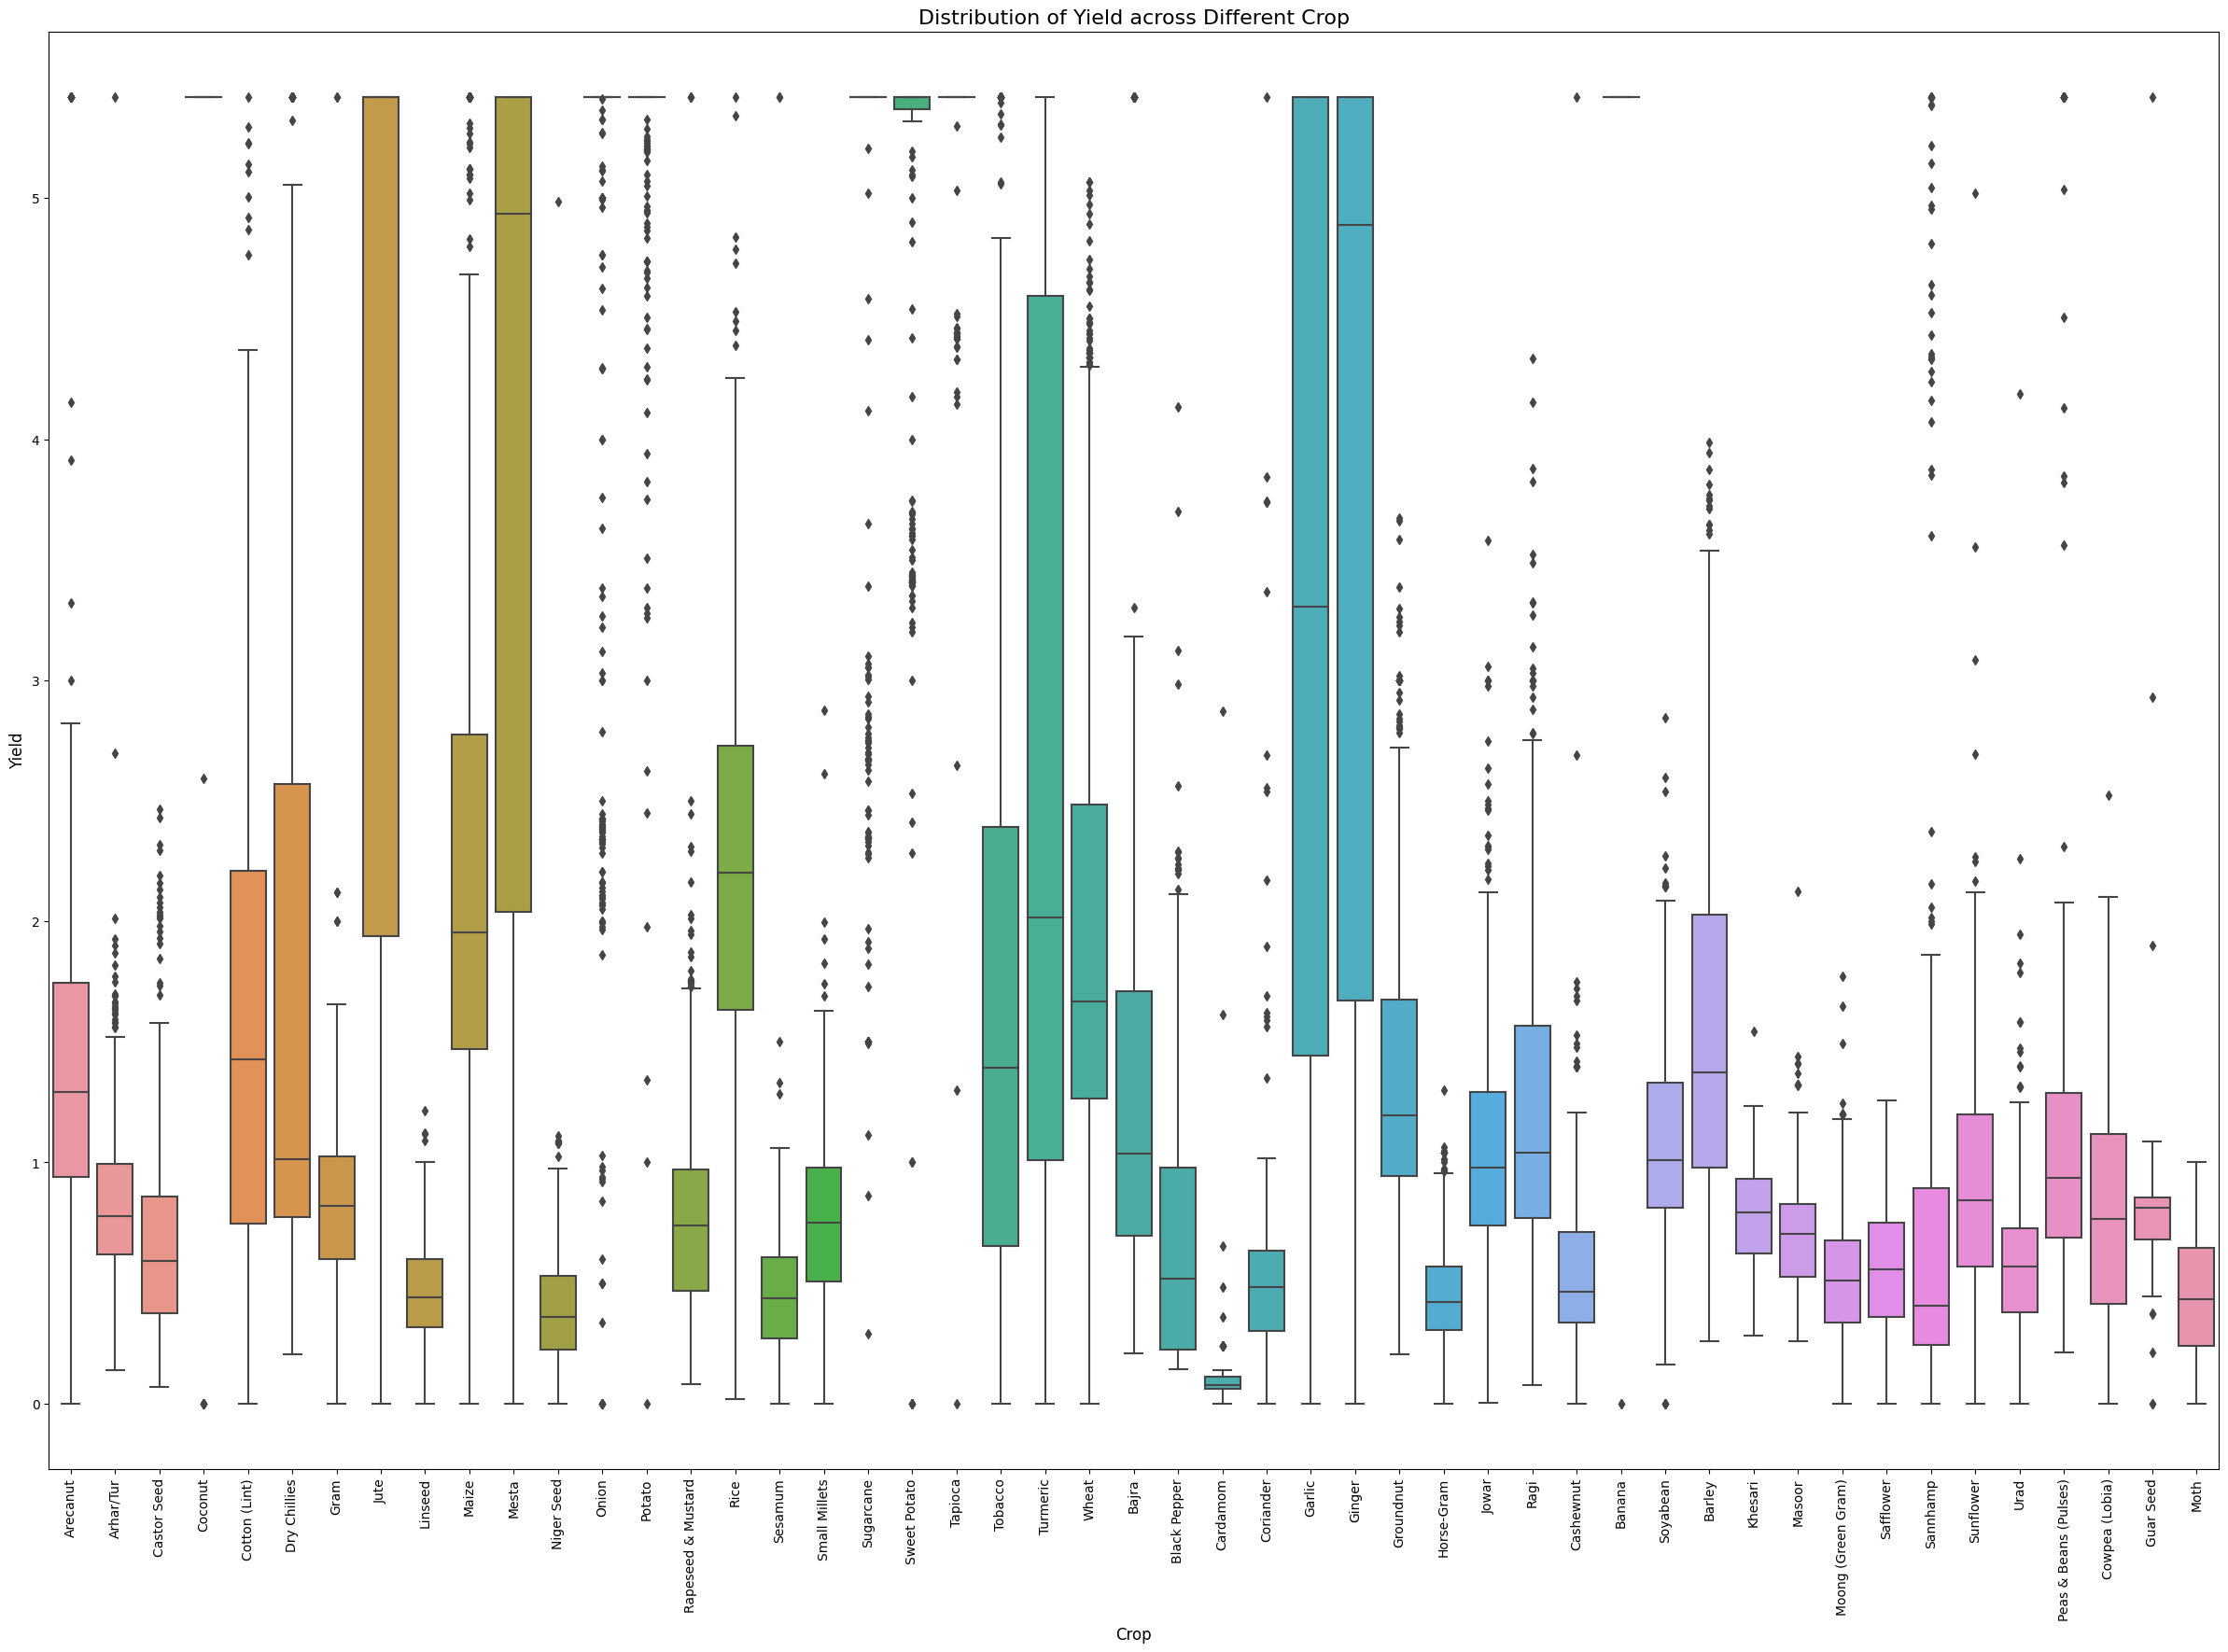

In [20]:
# Distribution of Yield across Different States/UT
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Yield', data=data)

# Add titles and labels
plt.title('Distribution of Yield across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Yield', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Yield across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Yield', data=data)

# Add titles and labels
plt.title('Distribution of Yield across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Yield', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Yield across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Yield', data=data)

# Add titles and labels
plt.title('Distribution of Yield across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Yield', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



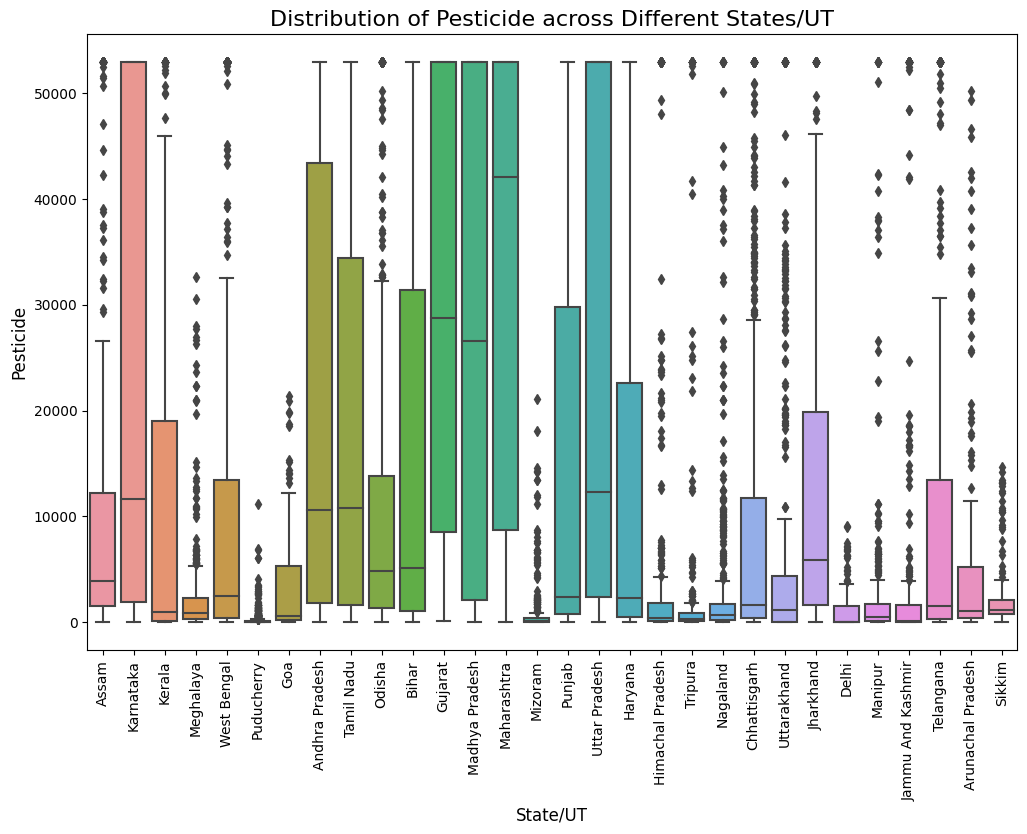

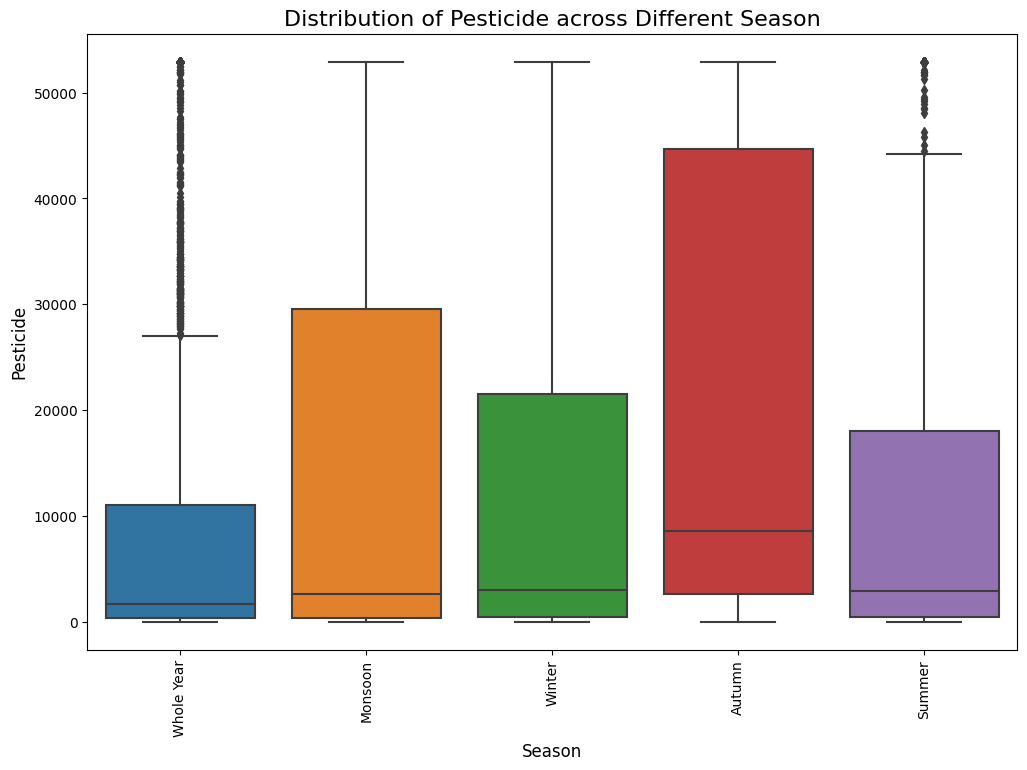

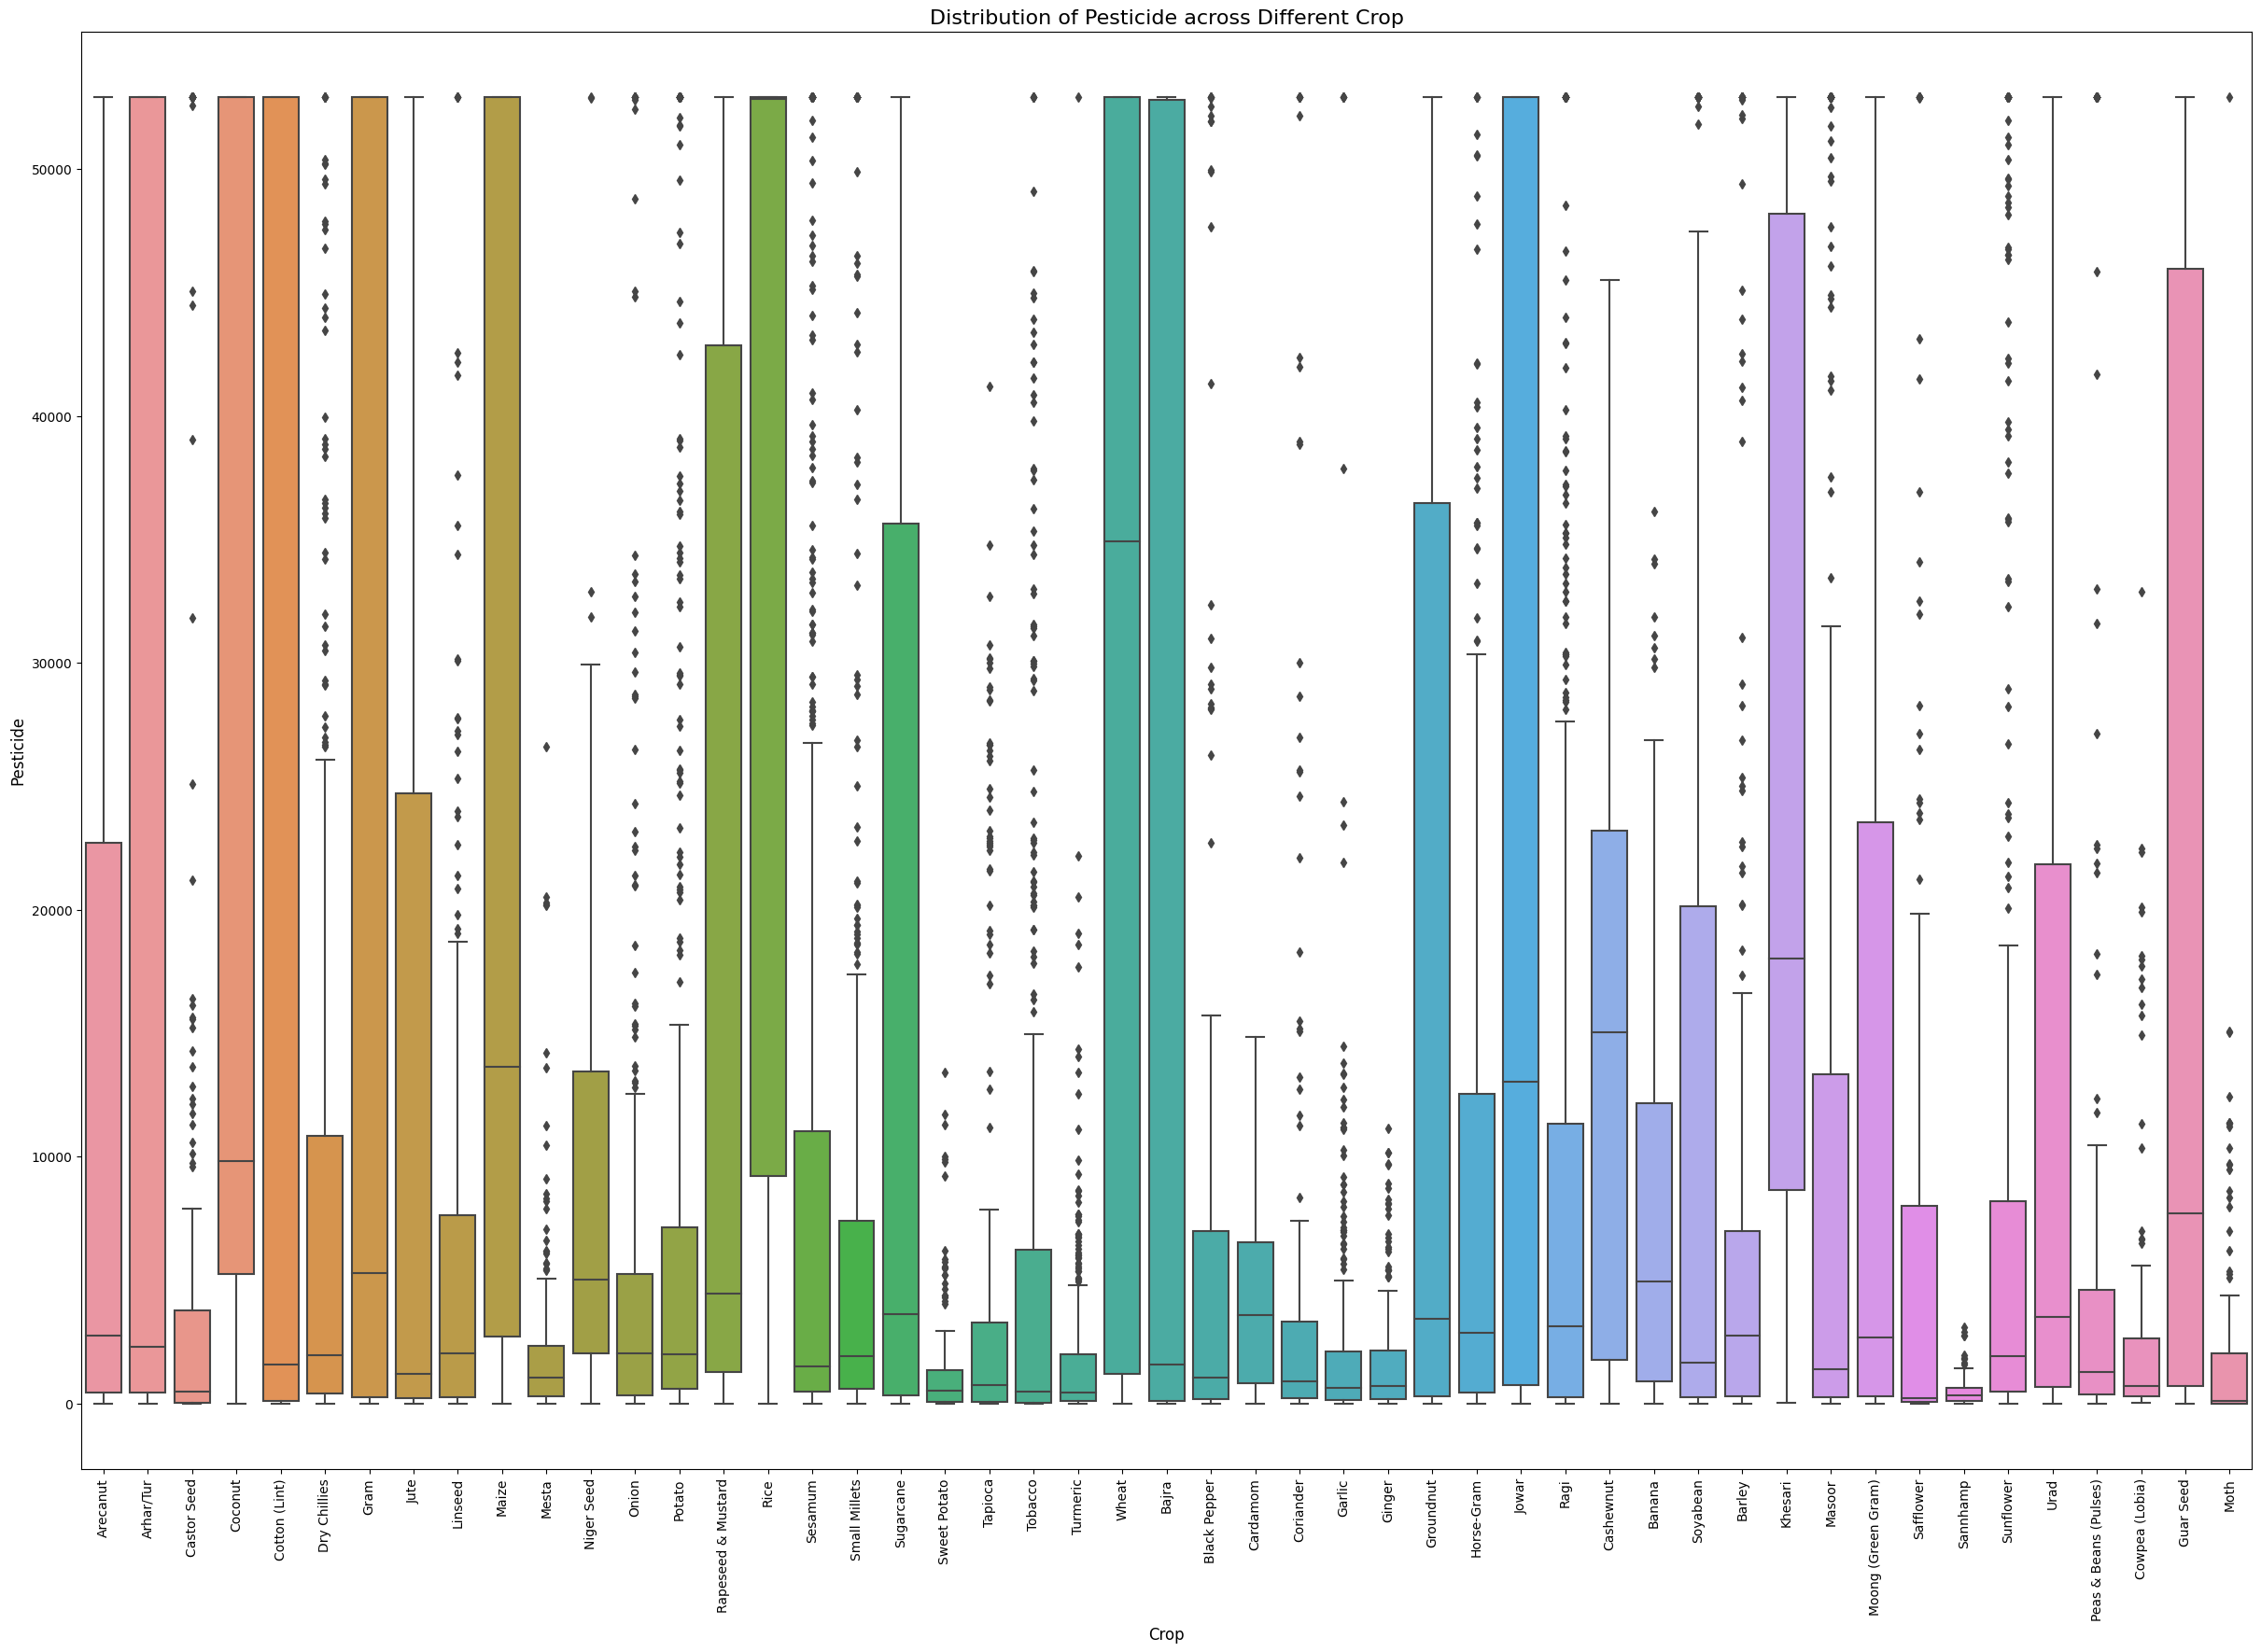

In [21]:
# Distribution of Pesticide across Different States/UT
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Pesticide', data=data)

# Add titles and labels
plt.title('Distribution of Pesticide across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Pesticide', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Pesticide across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Pesticide', data=data)

# Add titles and labels
plt.title('Distribution of Pesticide across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Pesticide', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Pesticide across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Pesticide', data=data)

# Add titles and labels
plt.title('Distribution of Pesticide across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Pesticide', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



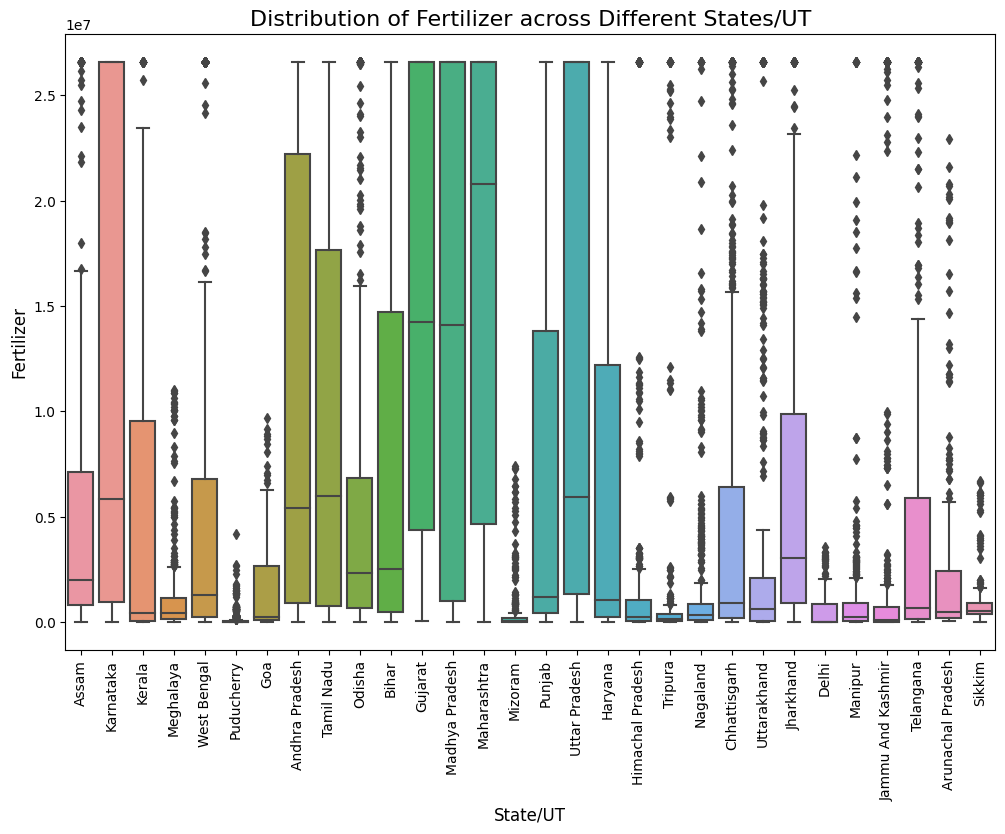

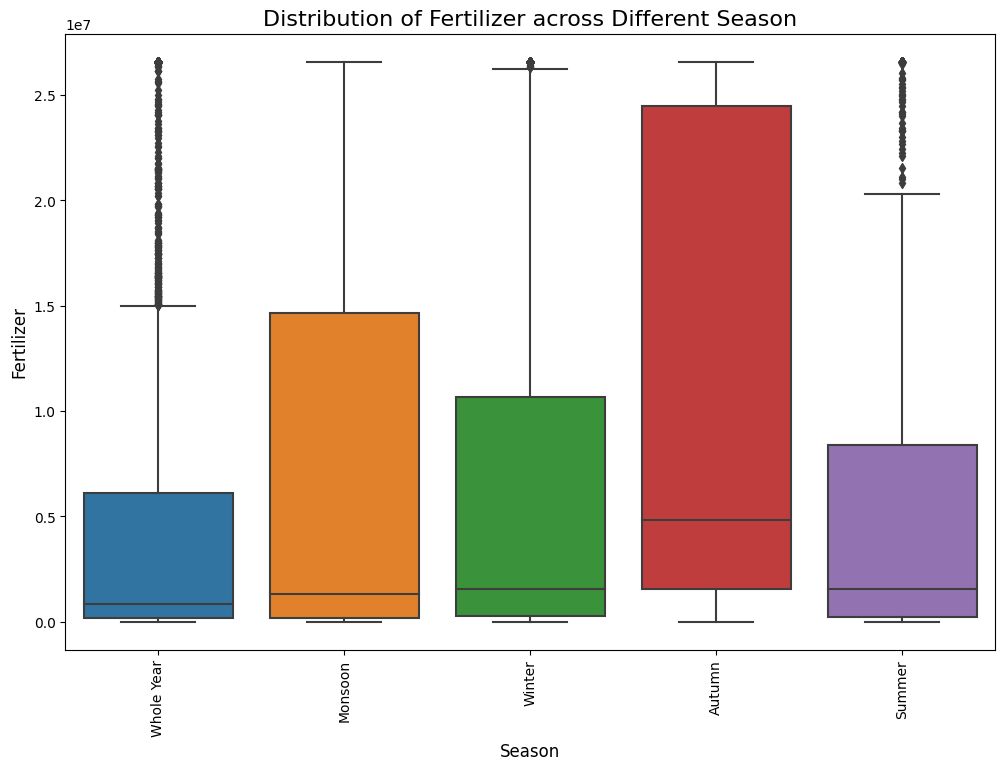

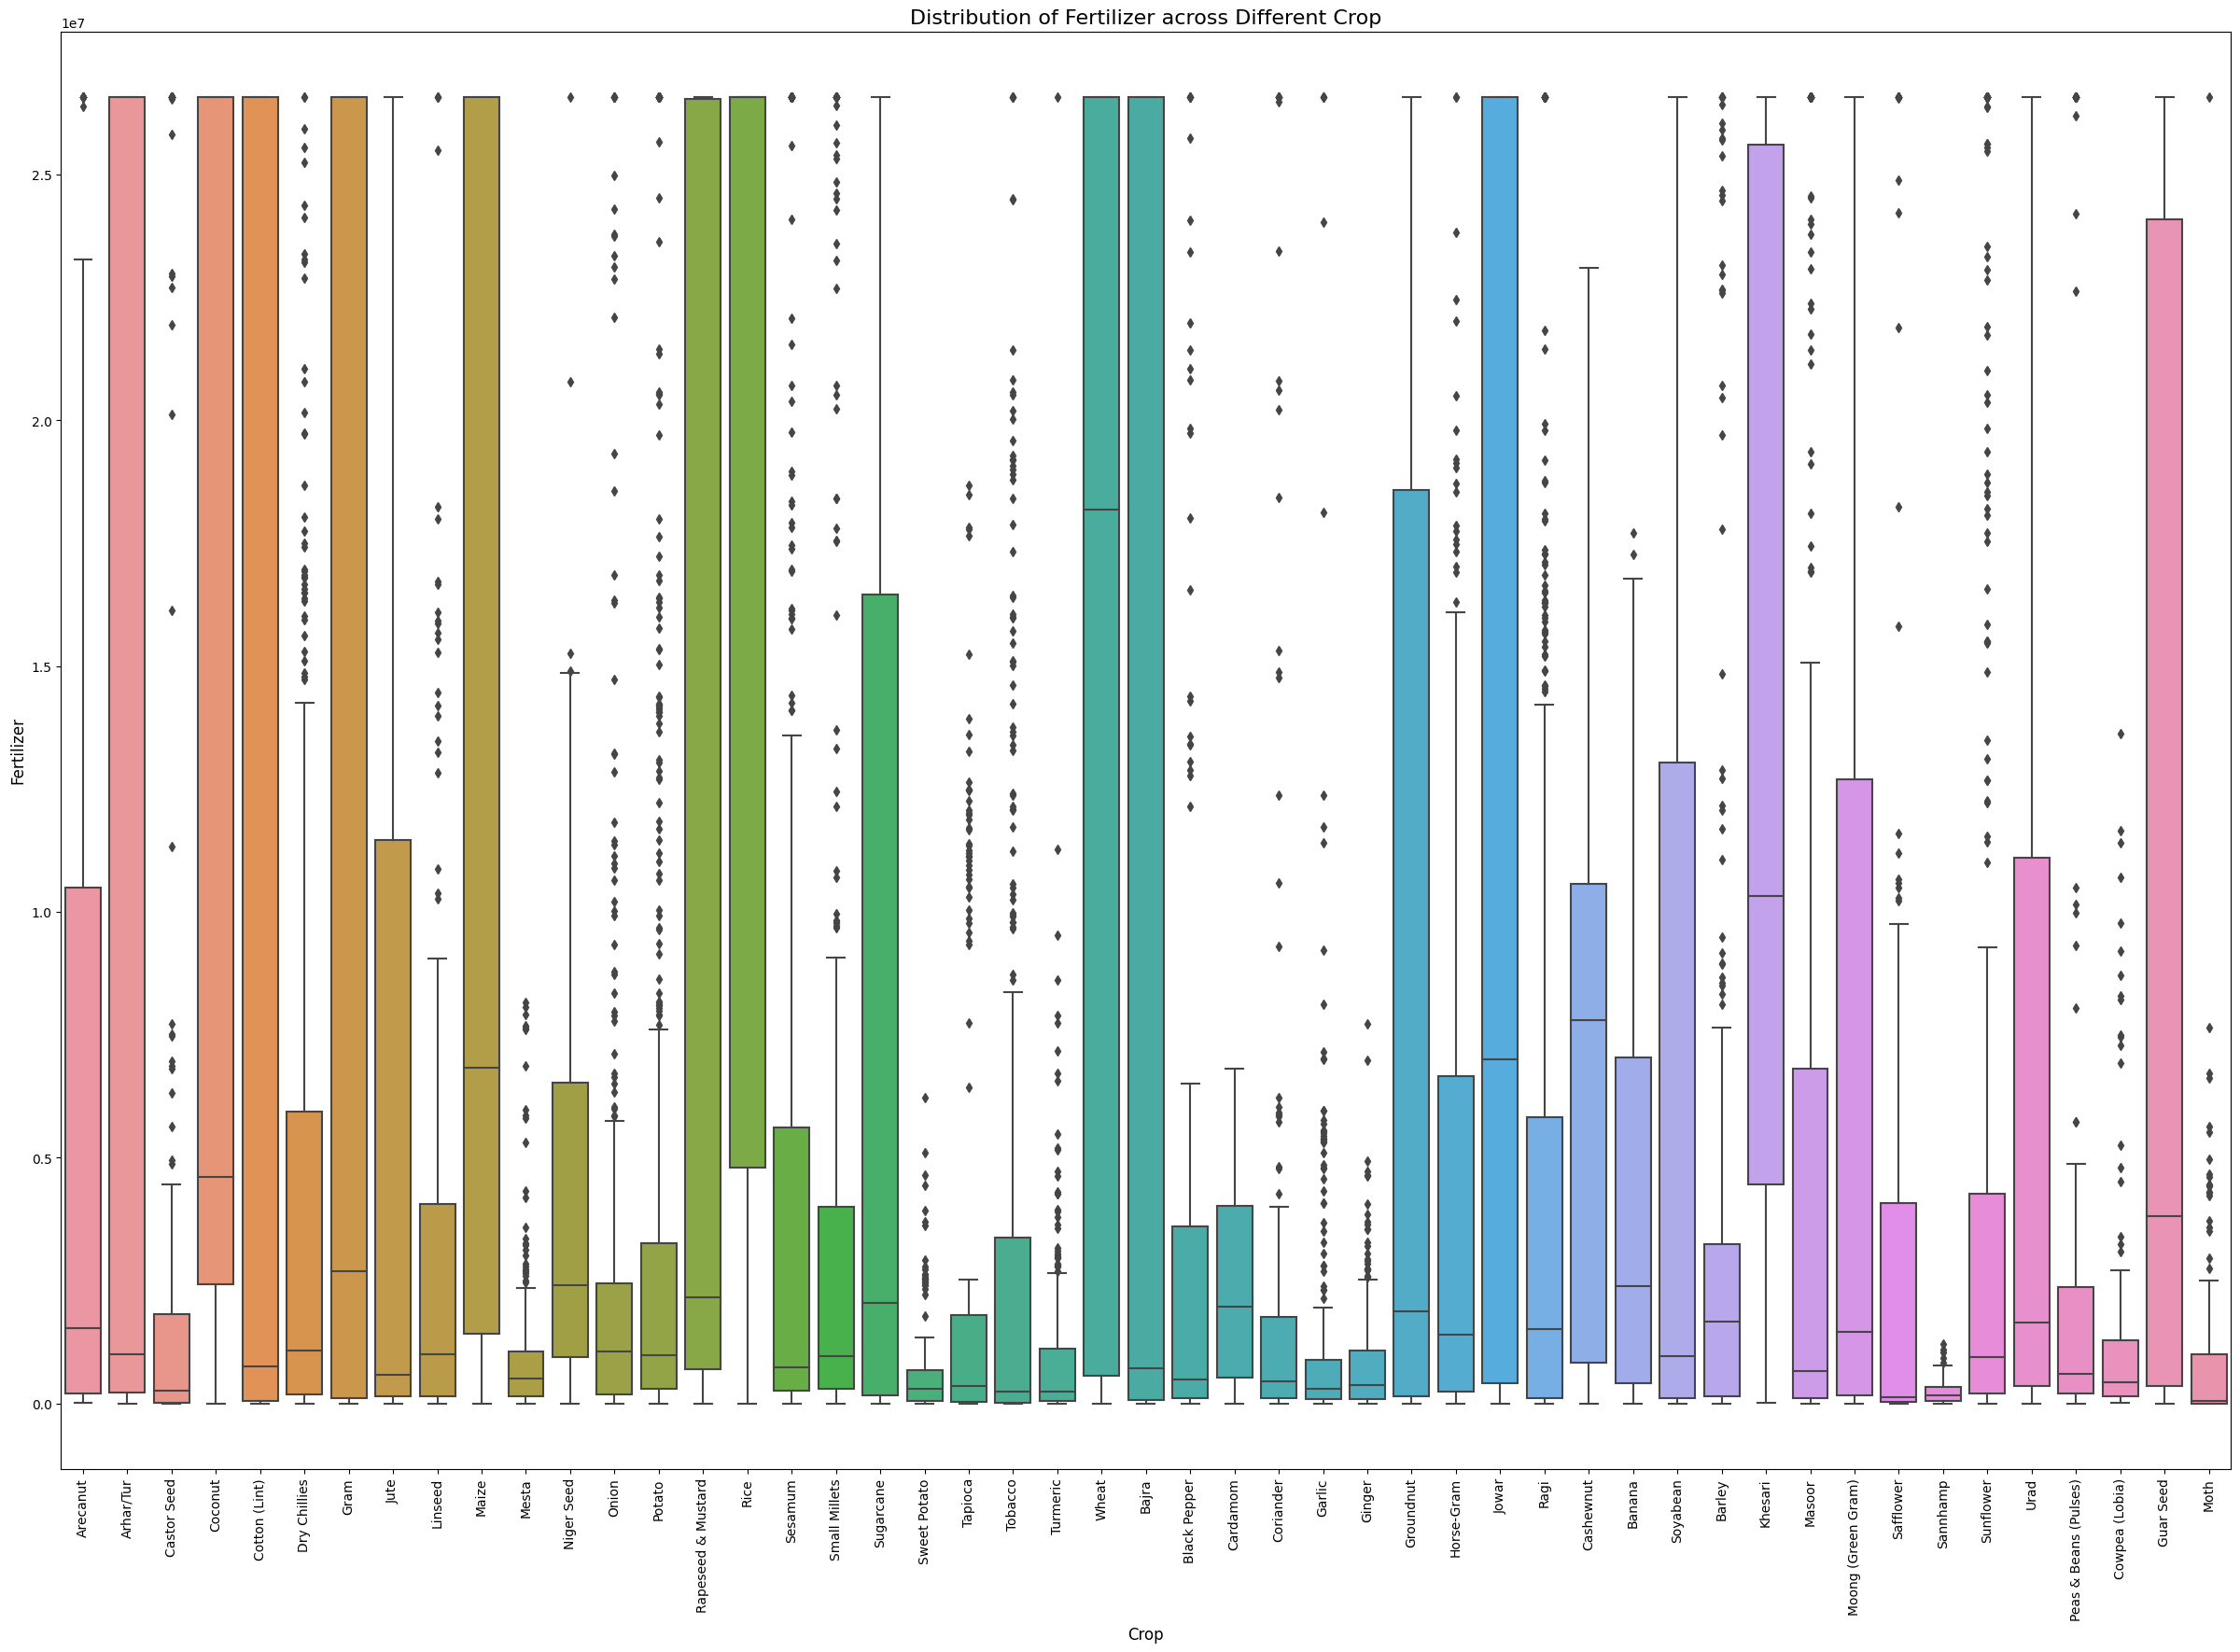

In [22]:
# Distribution of Fertilizer across Different States/UT
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Fertilizer', data=data)

# Add titles and labels
plt.title('Distribution of Fertilizer across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Fertilizer', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Fertilizer across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Fertilizer', data=data)

# Add titles and labels
plt.title('Distribution of Fertilizer across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Fertilizer', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Fertilizer across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Fertilizer', data=data)

# Add titles and labels
plt.title('Distribution of Fertilizer across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Fertilizer', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



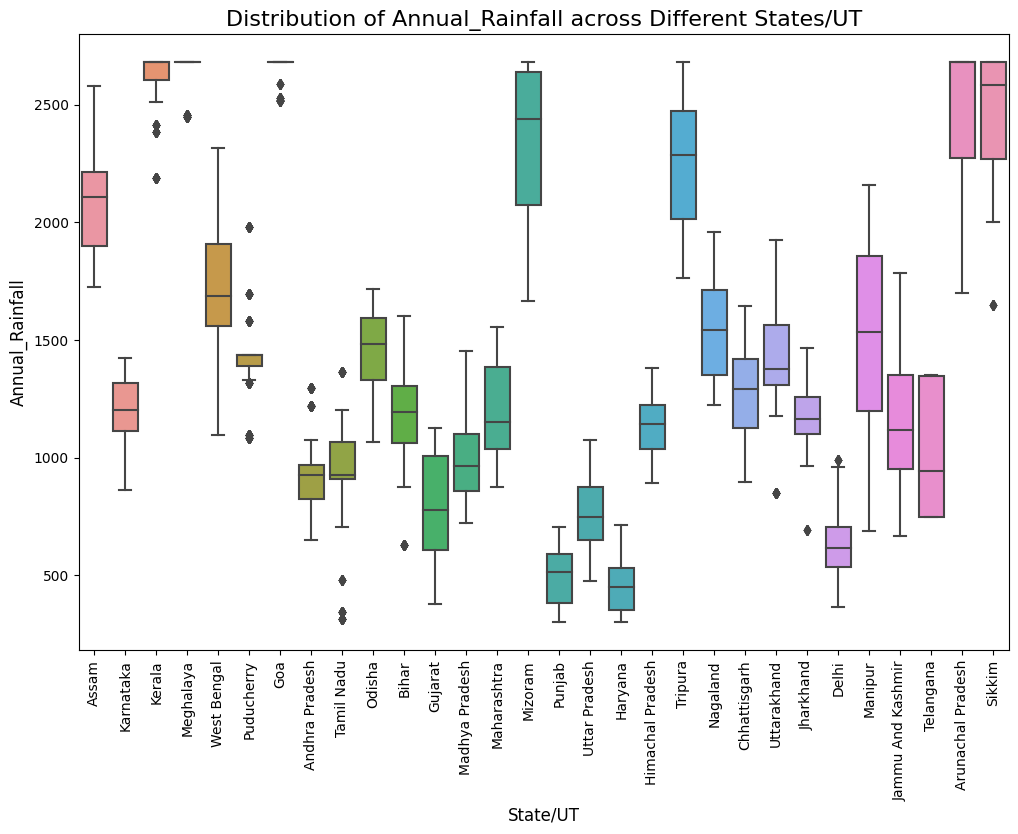

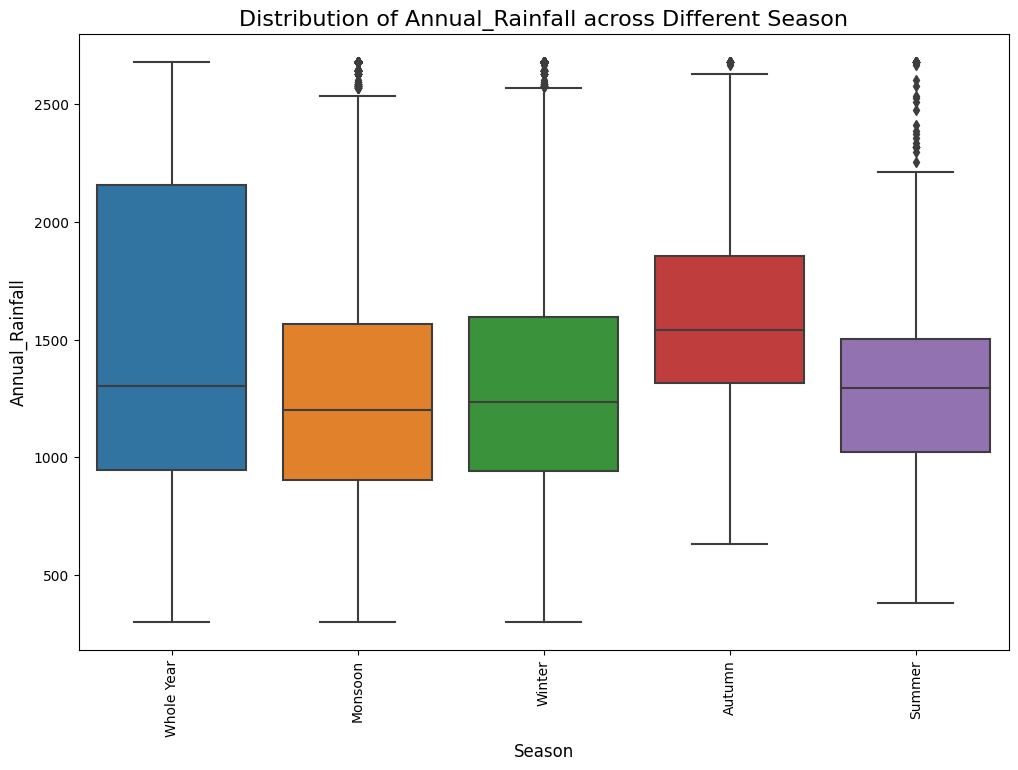

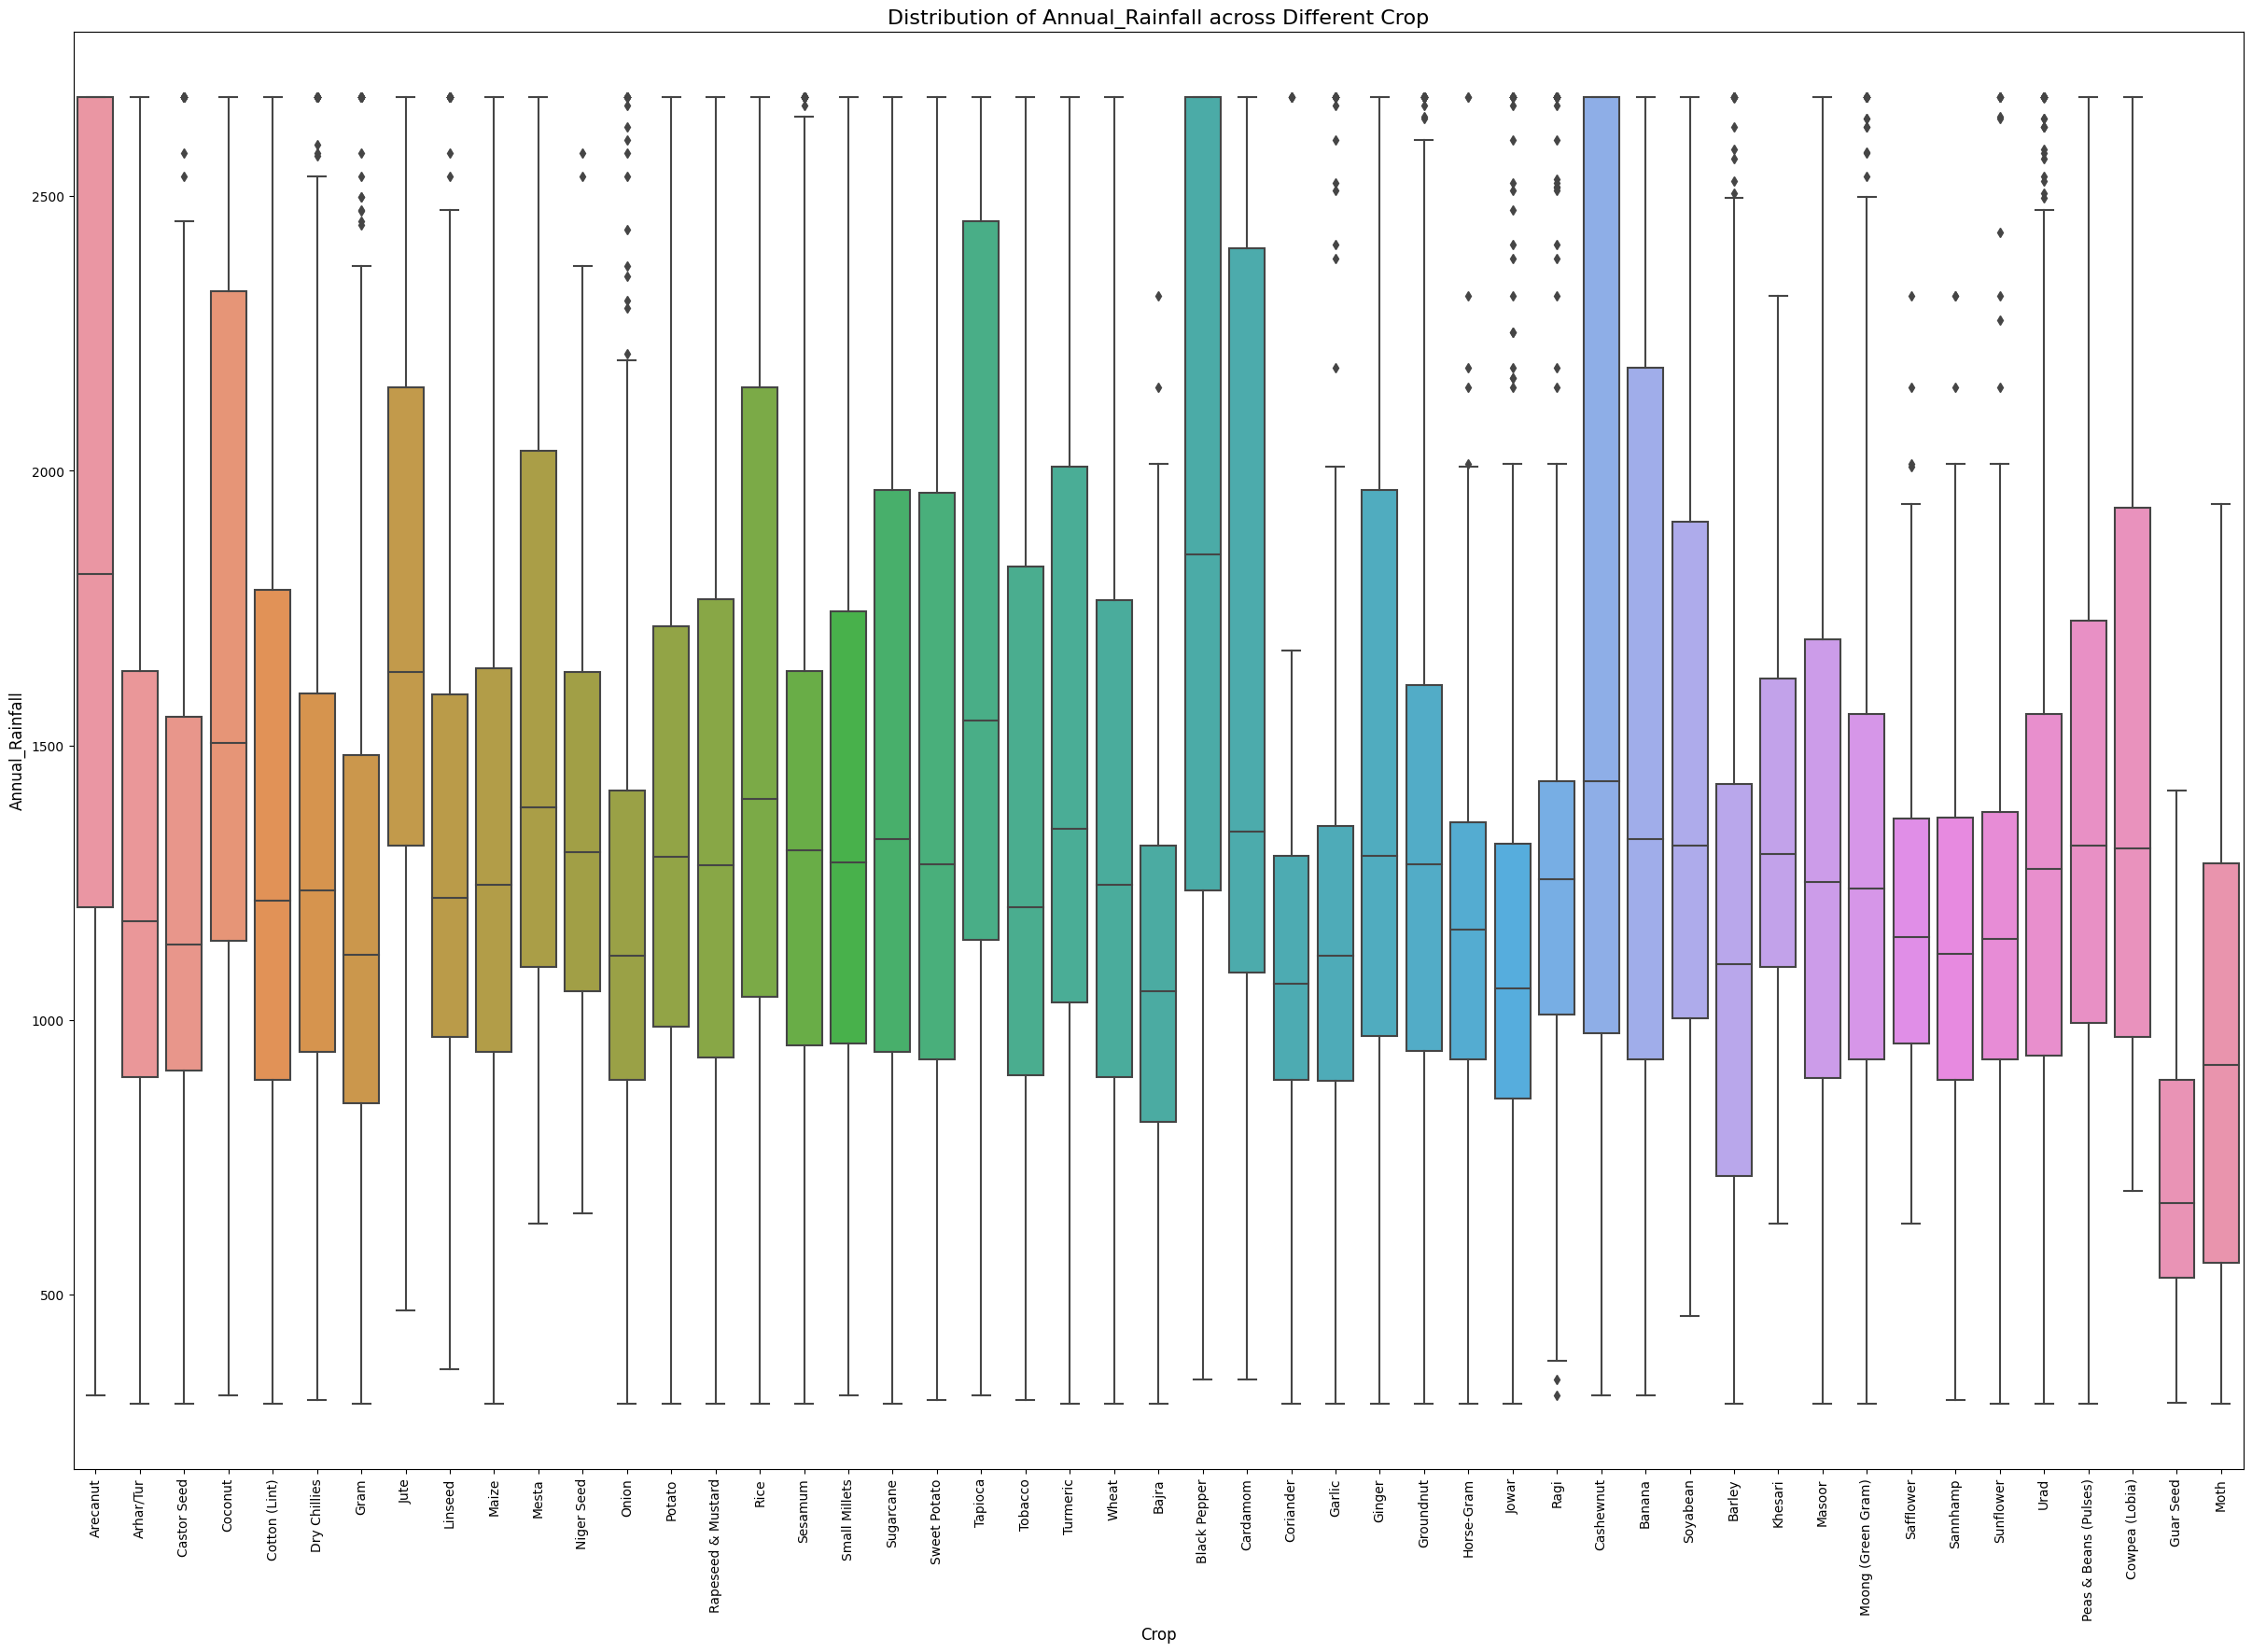

In [23]:
# Distribution of Annual_Rainfall across Different States/UT
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Annual_Rainfall', data=data)

# Add titles and labels
plt.title('Distribution of Annual_Rainfall across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Annual_Rainfall', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Annual_Rainfall across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Annual_Rainfall', data=data)

# Add titles and labels
plt.title('Distribution of Annual_Rainfall across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Annual_Rainfall', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Annual_Rainfall across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Annual_Rainfall', data=data)

# Add titles and labels
plt.title('Distribution of Annual_Rainfall across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Annual_Rainfall', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



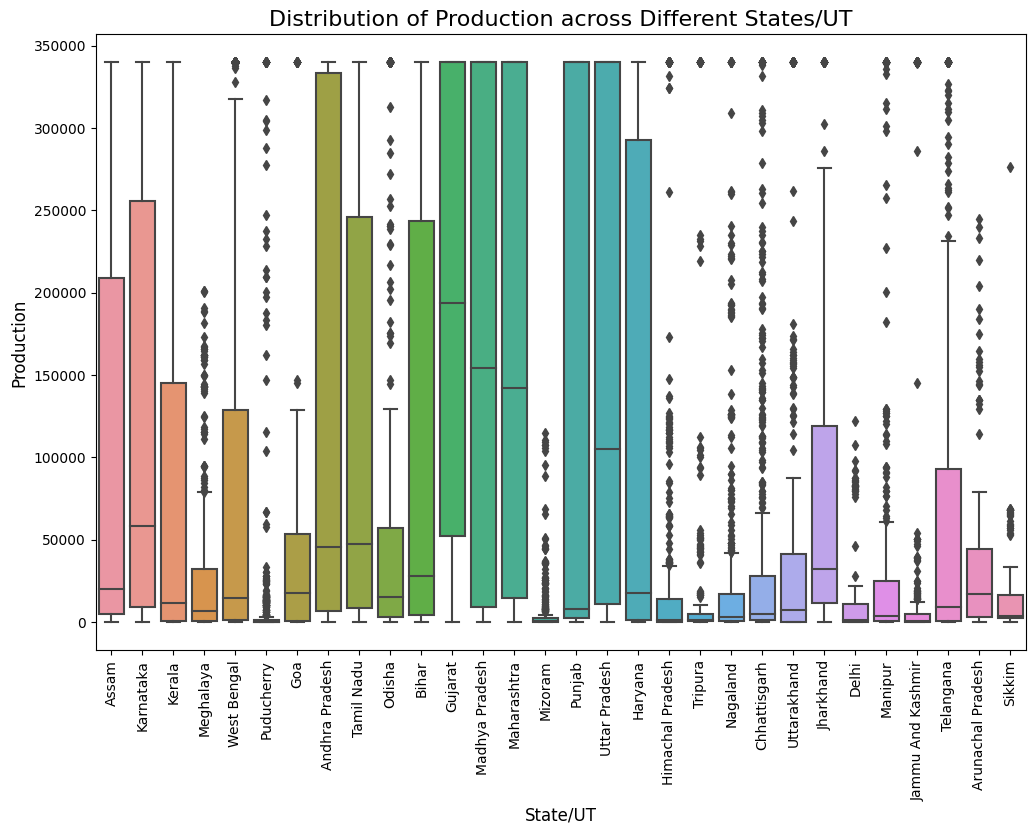

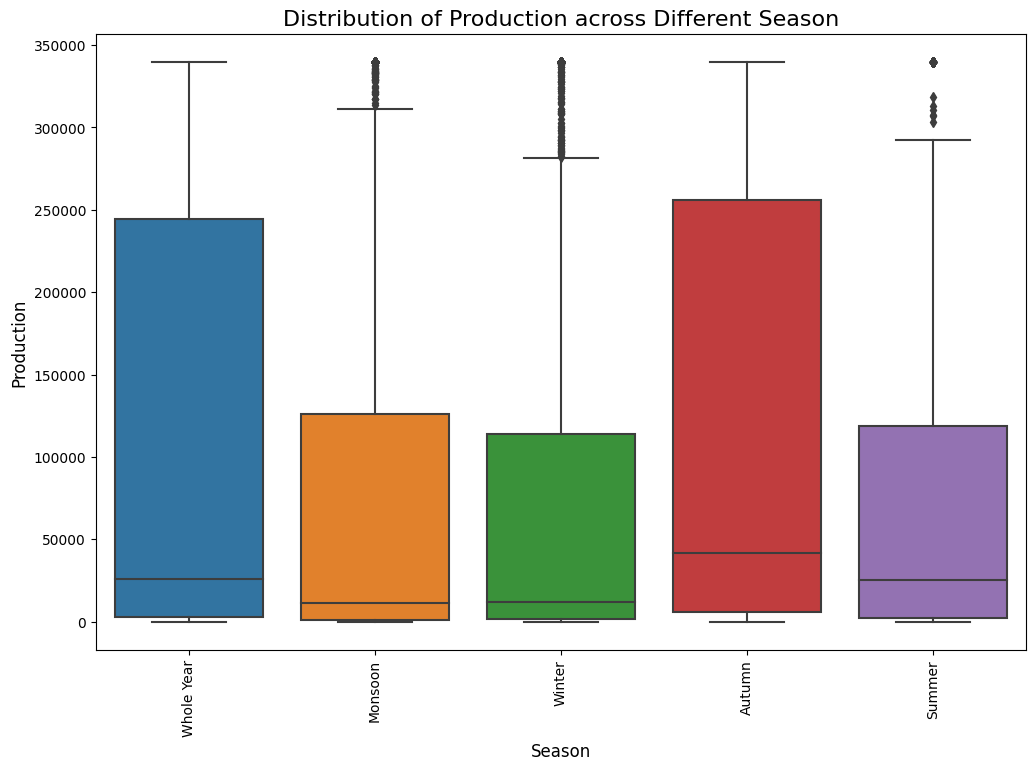

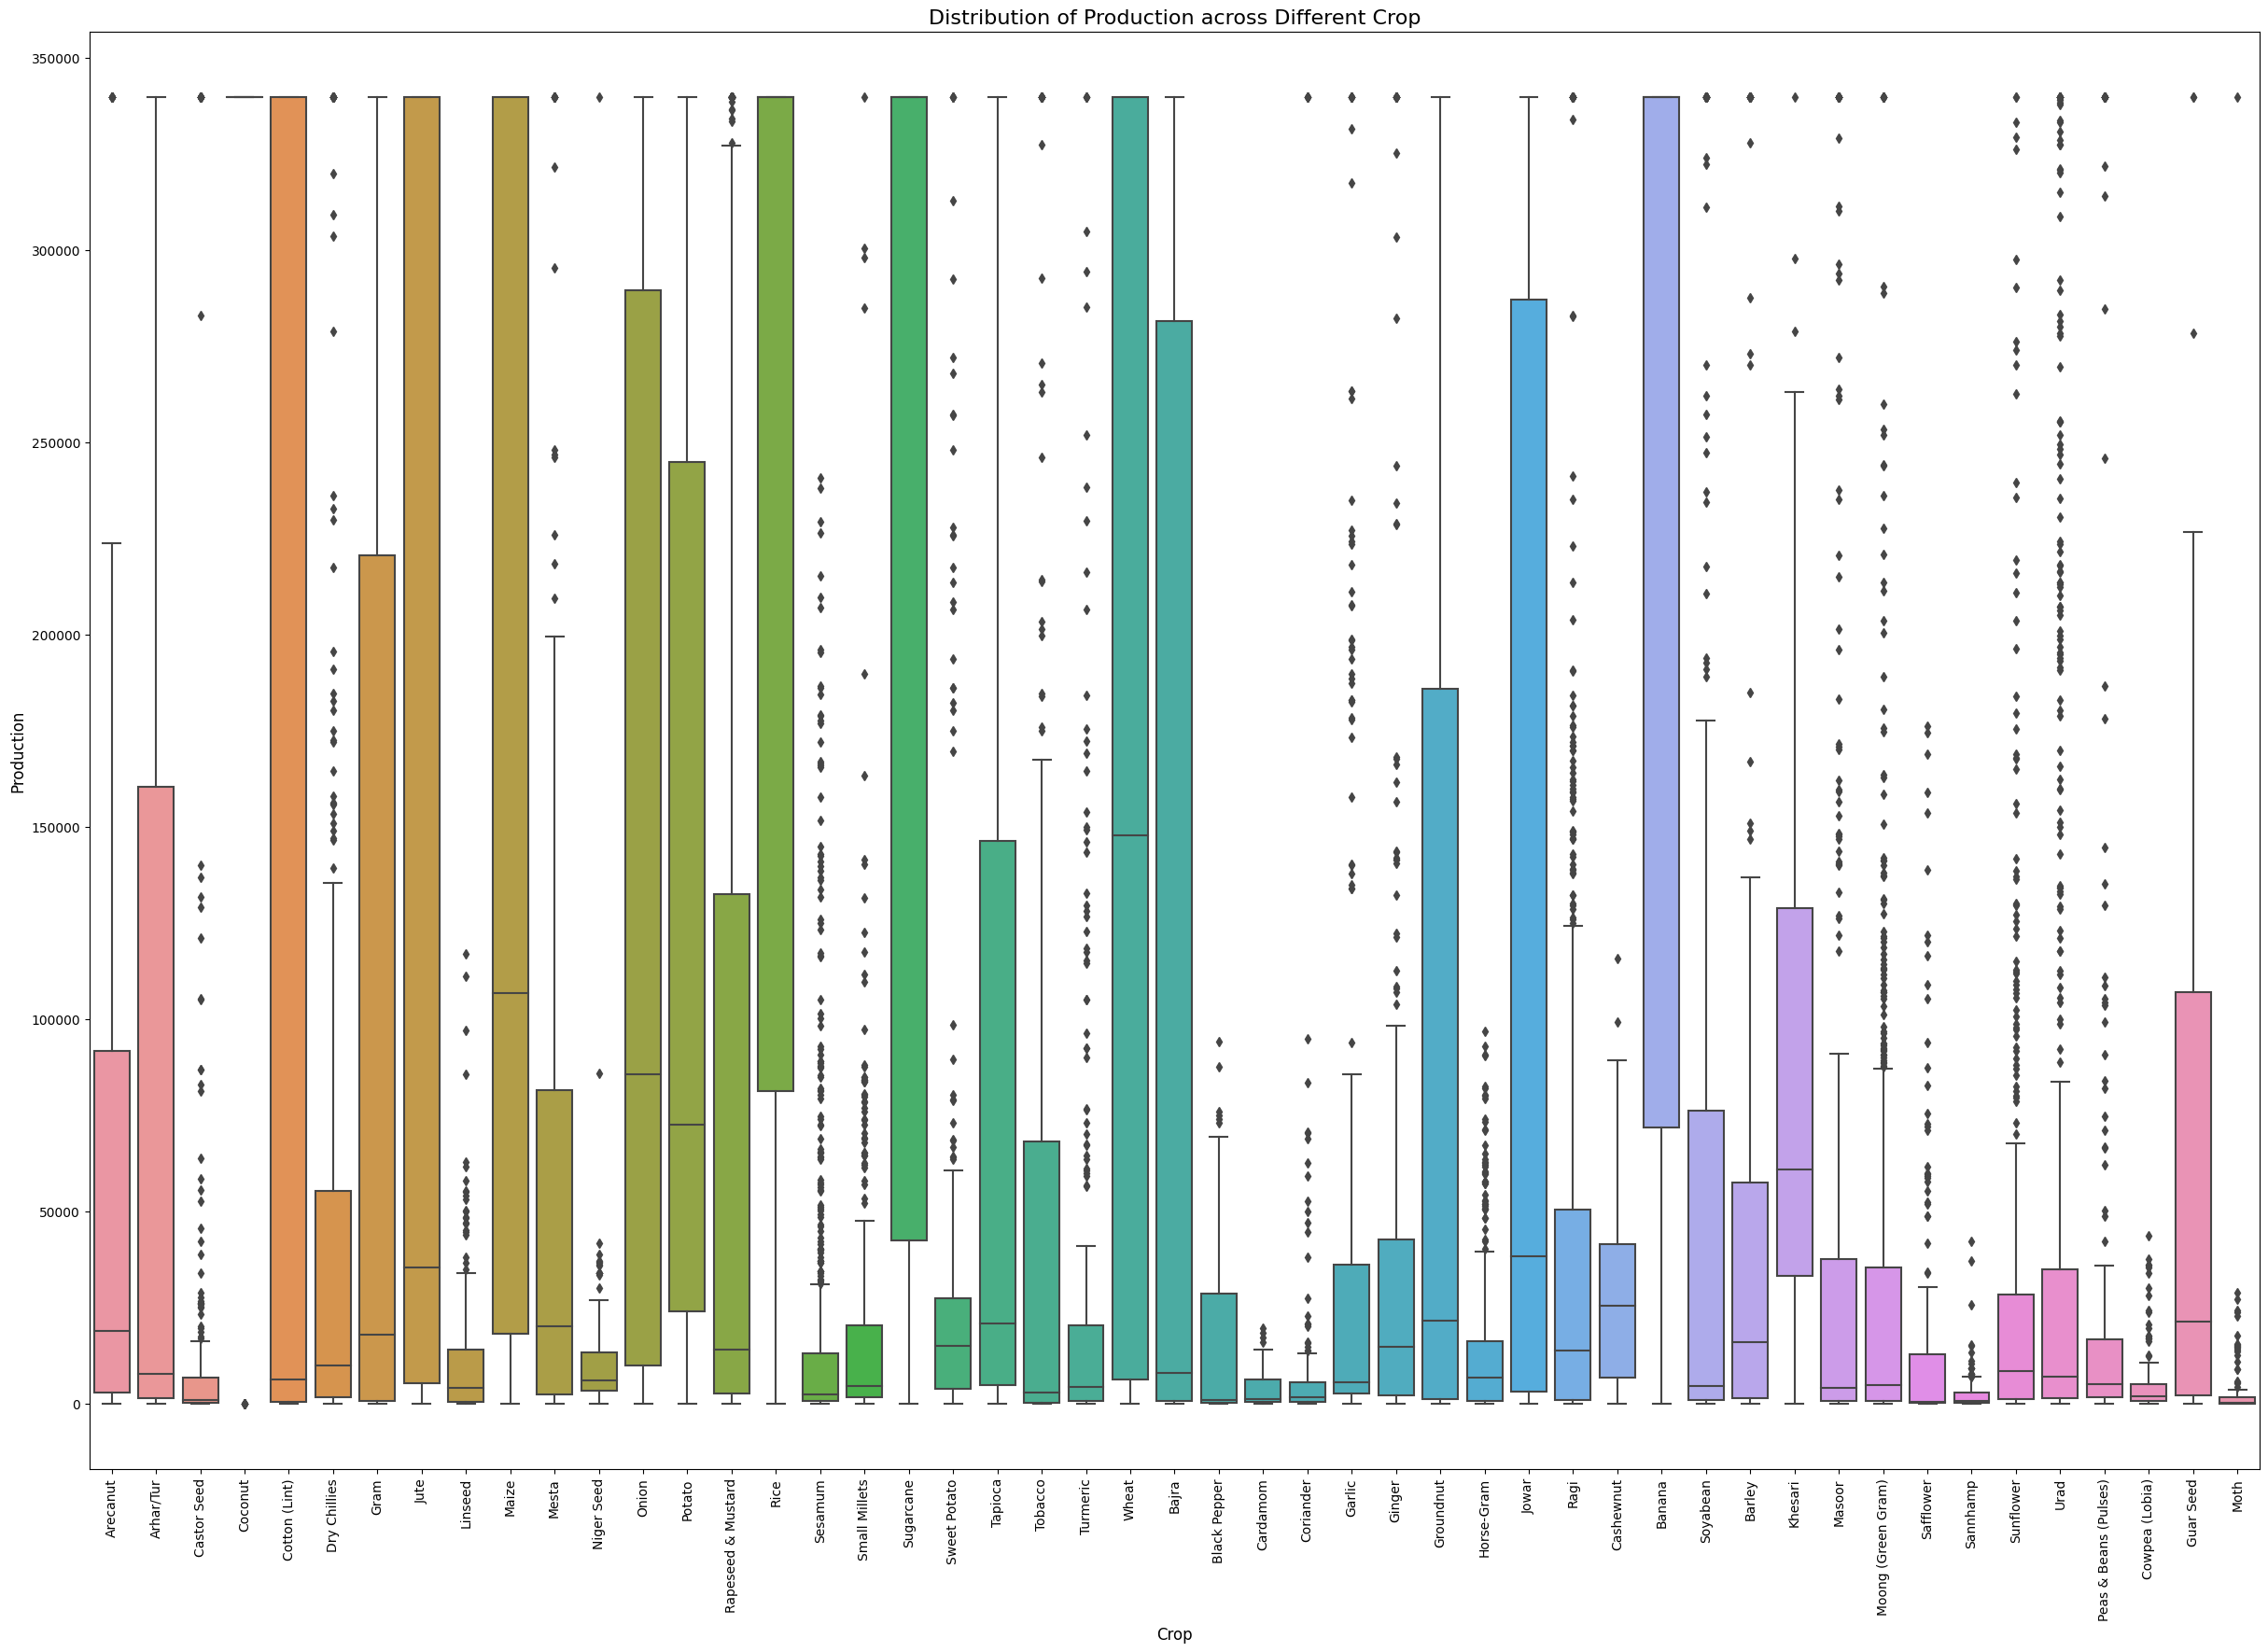

In [24]:
# Distribution of Production across Different States/UT
# Set the size of the plote
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Production', data=data)

# Add titles and labels
plt.title('Distribution of Production across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Production', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Production across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Production', data=data)

# Add titles and labels
plt.title('Distribution of Production across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Production', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Production across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Production', data=data)

# Add titles and labels
plt.title('Distribution of Production across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Production', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



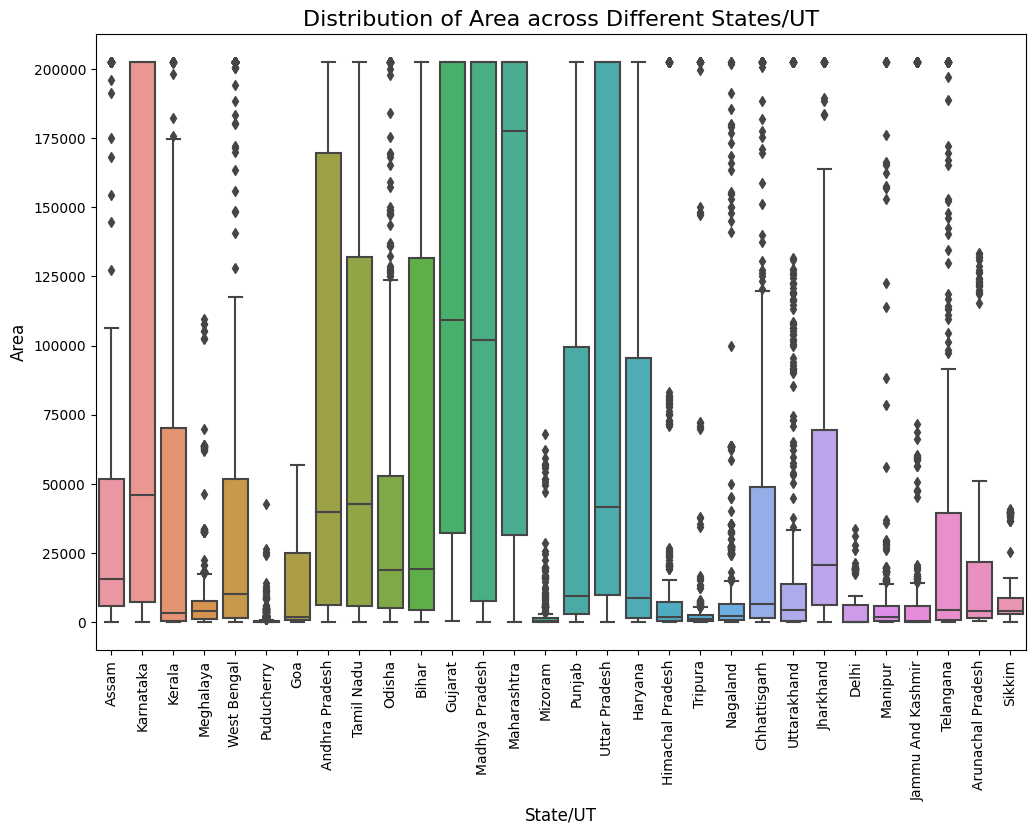

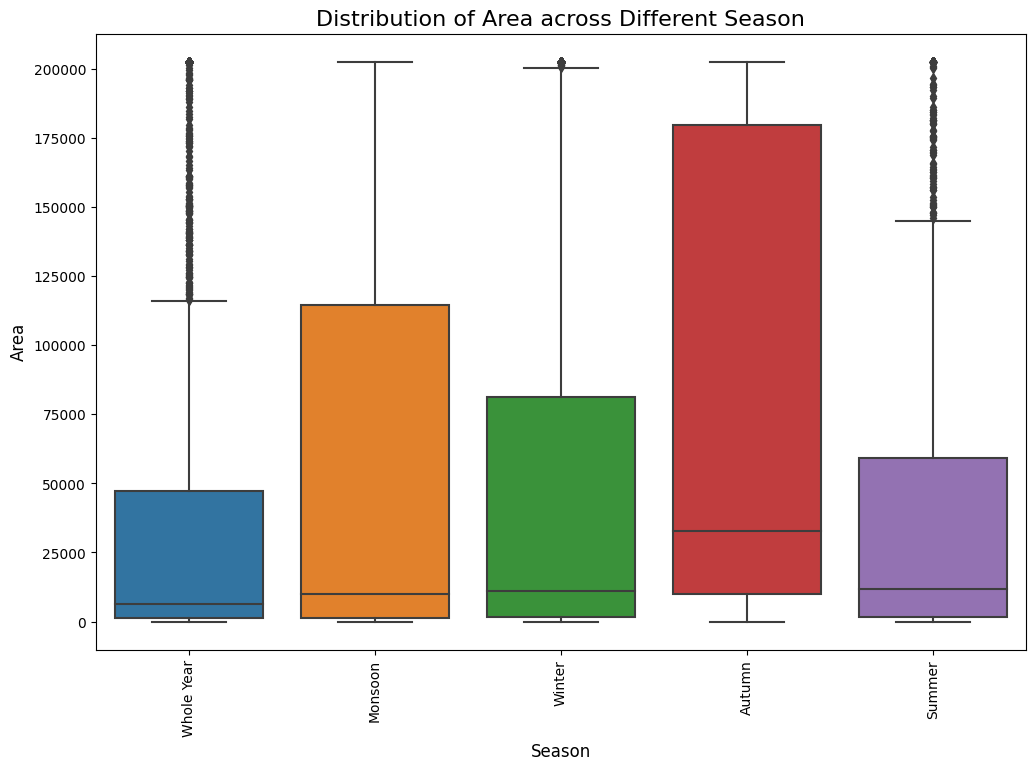

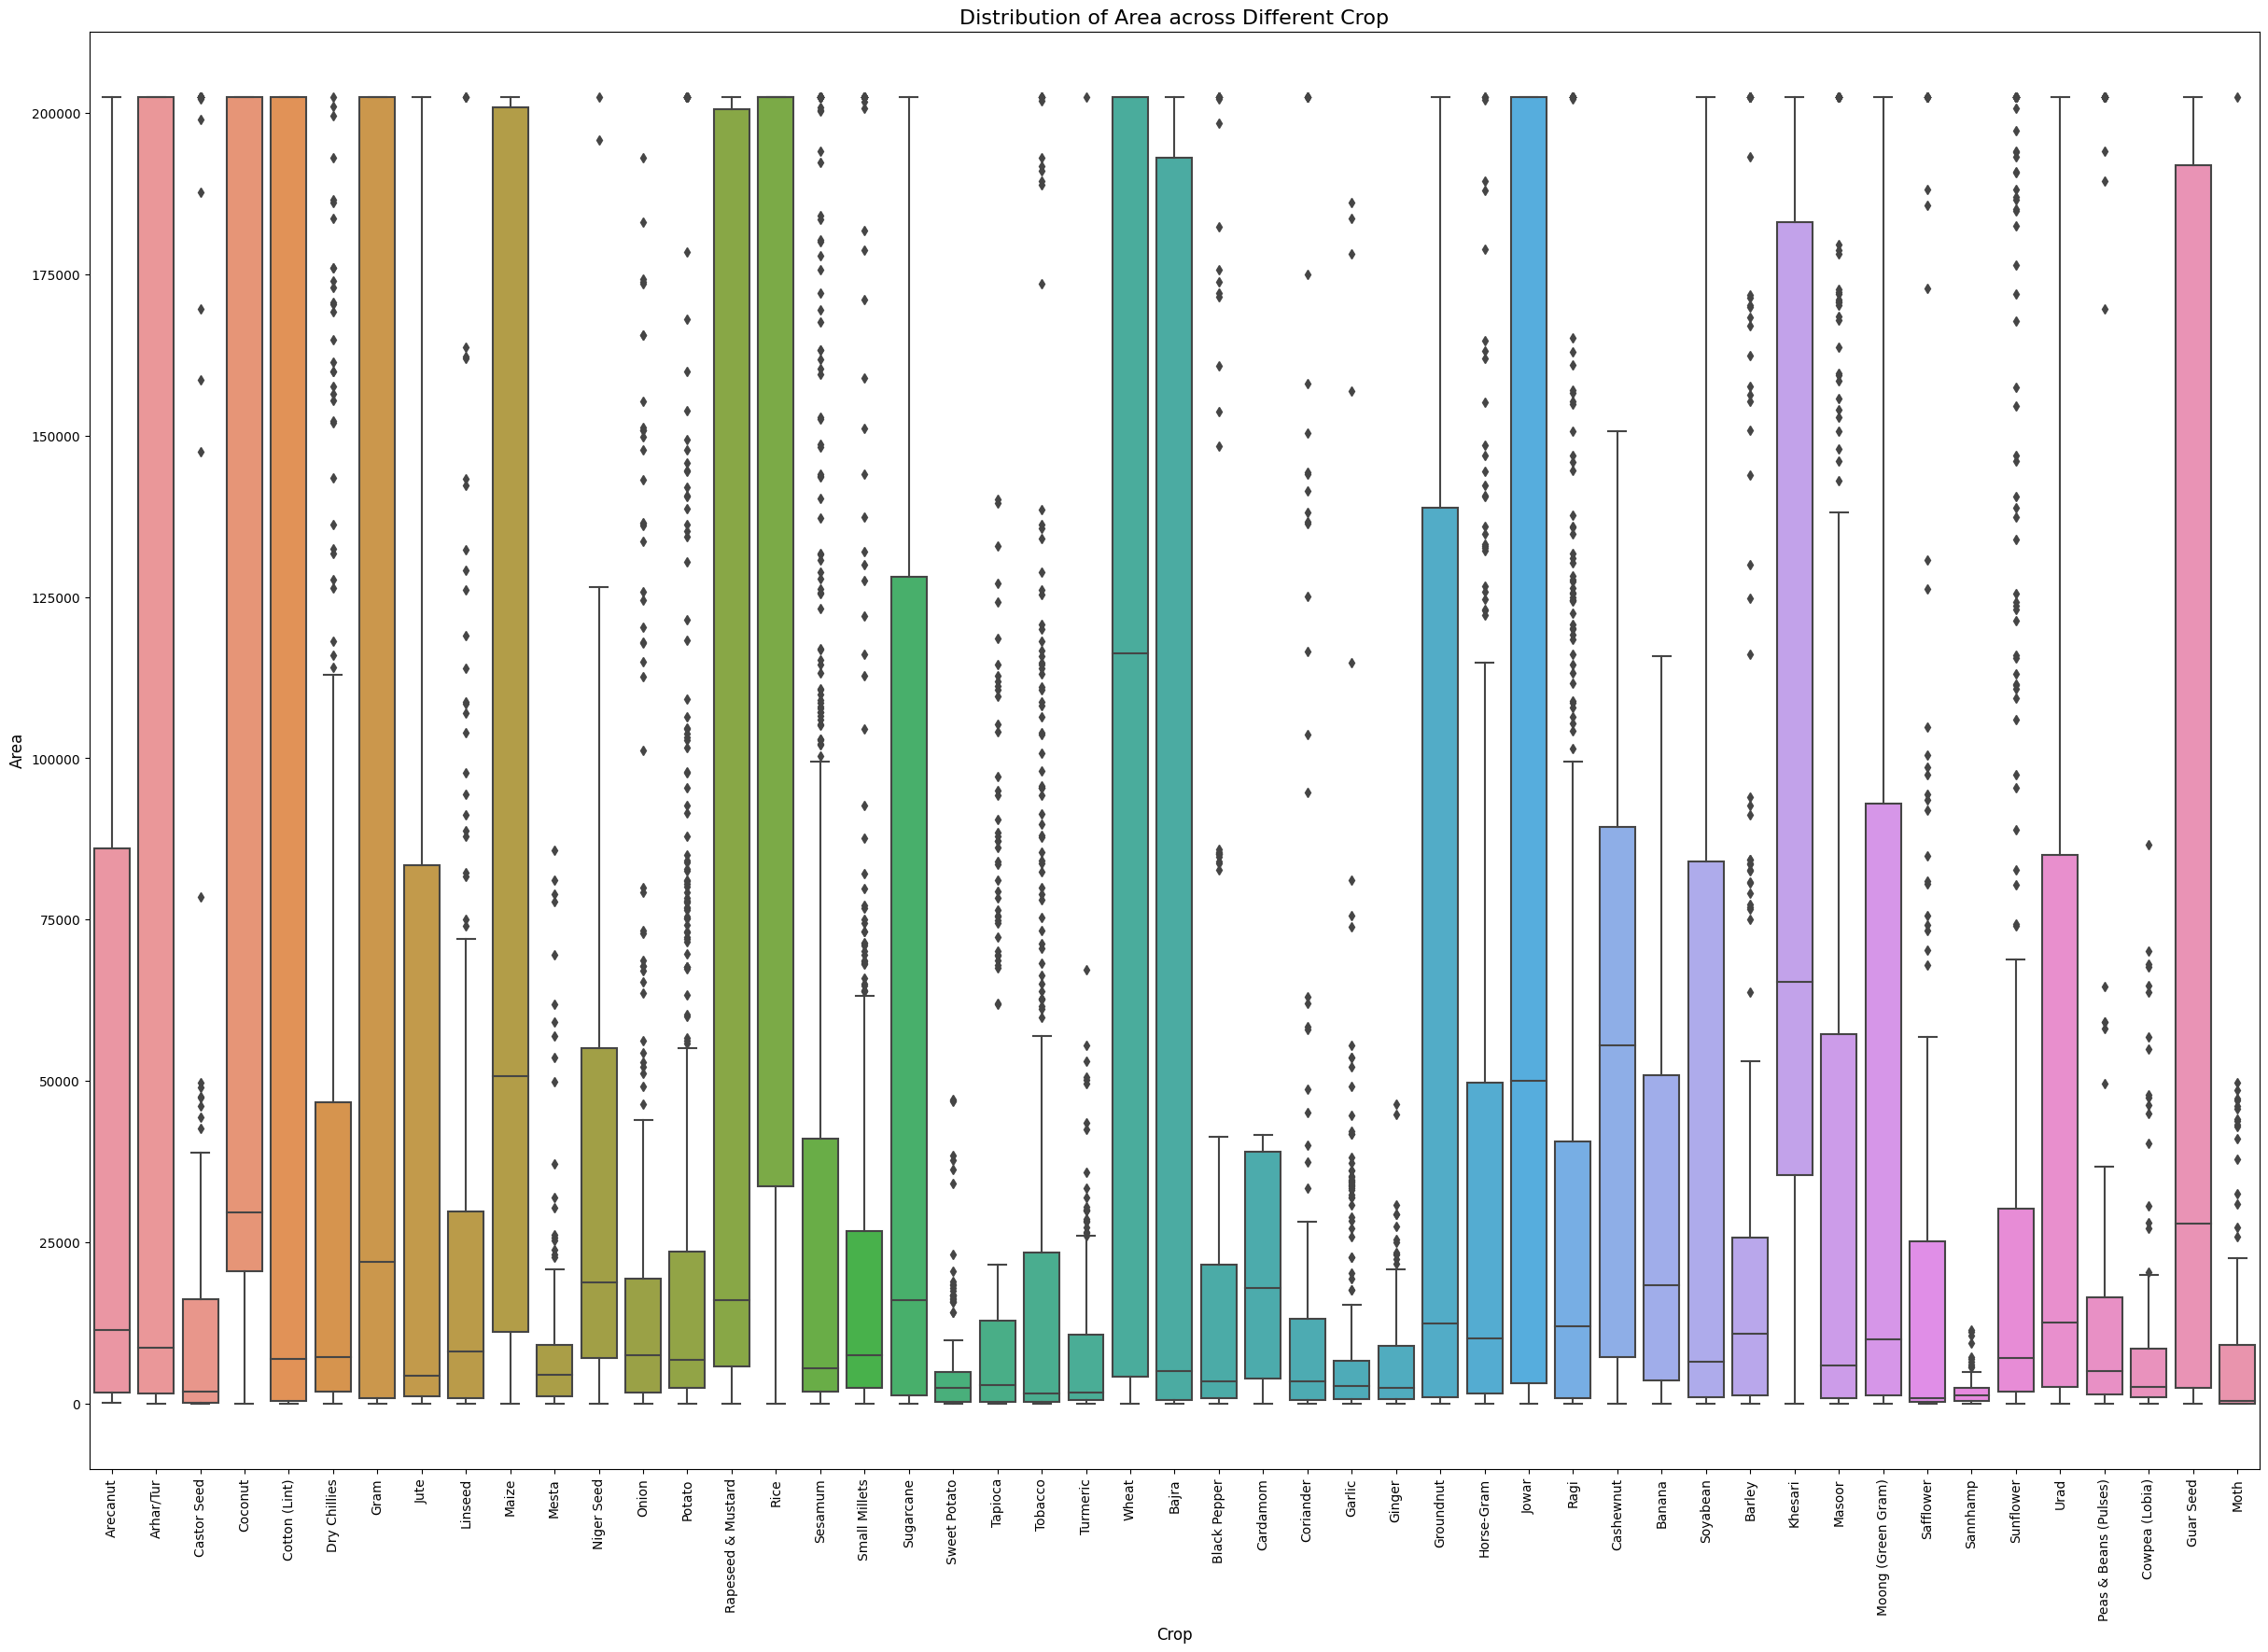

In [25]:
# Distribution of Area across Different States/UT
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='State/UT', y='Area', data=data)

# Add titles and labels
plt.title('Distribution of Area across Different States/UT', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Area', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Area across Different Season
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
sns.boxplot(x='Season', y='Area', data=data)

# Add titles and labels
plt.title('Distribution of Area across Different Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Area', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Distribution of Area across Different Crop
# Set the size of the plot
plt.figure(figsize=(30, 20))

# Create the boxplot
sns.boxplot(x='Crop', y='Area', data=data)

# Add titles and labels
plt.title('Distribution of Area across Different Crop', fontsize=16)
plt.xlabel('Crop', fontsize=12)
plt.ylabel('Area', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



In [26]:
data1=pd.read_csv('BronzeLayer_data.csv')
data2=pd.read_csv('SilverLayer_data.csv')

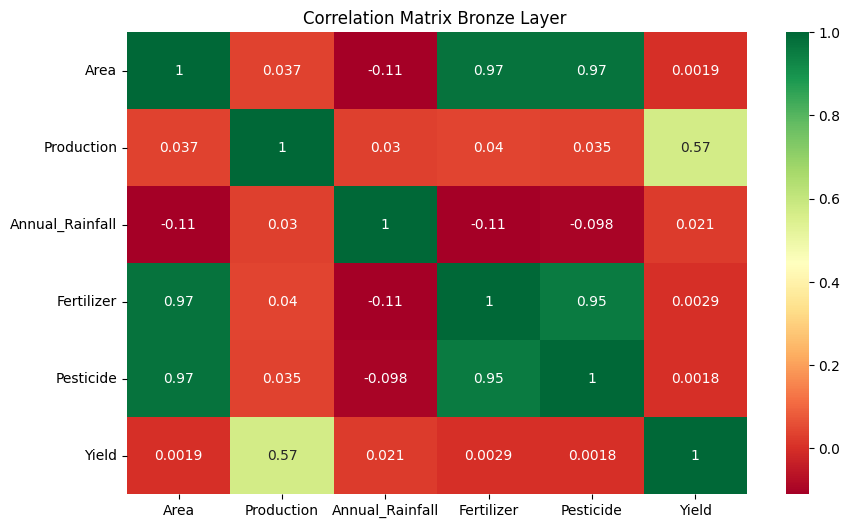

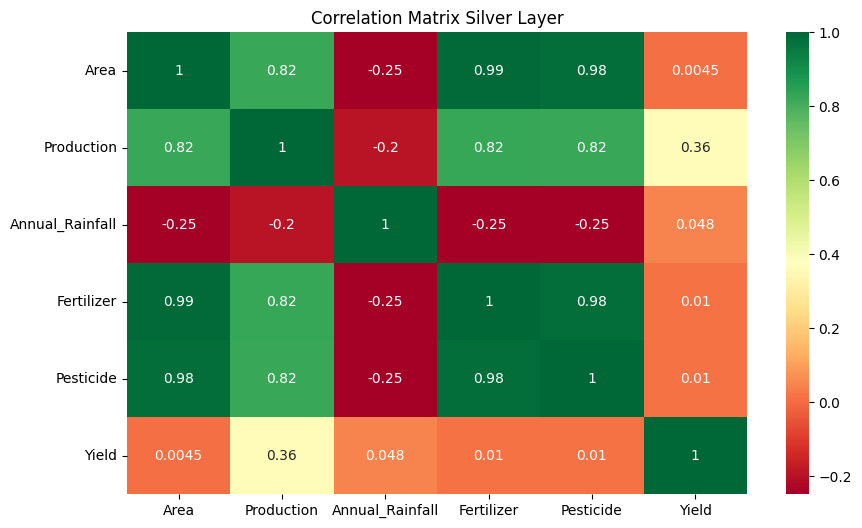

In [27]:
# Step 4: Check correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data1[numerical_cols].corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Matrix Bronze Layer ")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(data2[numerical_cols].corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Matrix Silver Layer")
plt.show()

# **Interpreting the Matrix:**

**Positive Correlation:** Values closer to 1 indicate a strong positive correlation. This means that as one variable increases, the other also tends to increase.

**Negative Correlation:** Values closer to -1 indicate a strong negative correlation. This means that as one variable increases, the other tends to decrease.

**No Correlation:** Values close to 0 indicate no linear relationship between the variables.

# **Bronze Layer**

**Insights from the Given Correlation Matrix:**

Based on the provided correlation matrix, we can draw the following insights:

**Strong Positive Correlation:**

* Area and Fertilizer are highly correlated (0.97). This suggests that as the area under cultivation increases, the amount of fertilizer used also increases.
* Area and Pesticide are also highly correlated (0.97), indicating a similar trend with pesticide usage.
Fertilizer and Pesticide have a strong positive correlation (0.95), suggesting that they are often used together.

**Weak or No Correlation:**

* Area and Production have a weak positive correlation (0.037), suggesting that increasing the area doesn't necessarily lead to a significant increase in production.
* Annual_Rainfall has a weak negative correlation with Area, Fertilizer, and Pesticide, indicating that higher rainfall might not necessarily lead to increased usage of these inputs.
* Yield has very weak correlations with most variables, suggesting that factors other than those considered in the matrix might be influencing yield.

# **Silver Layer**

**Insights from the Given Correlation Matrix:**

Based on the provided correlation matrix, we can draw the following insights:

**Strong Positive Correlation:**

* Area and Fertilizer are highly correlated (0.99). This suggests that as the area under cultivation increases, the amount of fertilizer used also increases.
* Area and Pesticide are also highly correlated (0.98), indicating a similar trend with pesticide usage.
Fertilizer and Pesticide have a strong positive correlation (0.98), suggesting that they are often used together.

**Weak or No Correlation:**

* Annual_Rainfall has a weak negative correlation with Area, Fertilizer, and Pesticide, indicating that higher rainfall might not necessarily lead to increased usage of these inputs.
* Yield has very weak correlations with most variables, suggesting that factors other than those considered in the matrix might be influencing yield.

In [28]:
# Step 5: Group analysis
# Bronze Layer
grouped = data1.groupby(['Crop', 'Season'])['Yield'].mean().reset_index()
grouped = grouped.sort_values(by='Yield', ascending=False)
print(grouped.head(10))

#Silver Layer
grouped = data2.groupby(['Crop', 'Season'])['Yield'].mean().reset_index()
grouped = grouped.sort_values(by='Yield', ascending=False)
print(grouped.head(10))

          Crop       Season        Yield
34    Coconut   Whole Year   8753.773172
189  Sugarcane  Kharif         61.884771
193  Sugarcane  Winter         57.008225
192  Sugarcane  Whole Year     50.543816
16      Banana  Summer         40.003218
191  Sugarcane  Summer         32.820000
188  Sugarcane  Autumn         32.656667
17      Banana  Whole Year     26.770727
12       Bajra  Whole Year     26.635740
14      Banana  Kharif         23.317467
          Crop   Season     Yield
161  Sugarcane   Summer  5.420723
12      Banana   Autumn  5.420723
159  Sugarcane   Autumn  5.420723
141   Sannhamp   Autumn  5.420723
16      Banana   Winter  5.420723
14      Banana   Summer  5.420723
13      Banana  Monsoon  5.420723
163  Sugarcane   Winter  5.420723
98       Mesta   Winter  5.420723
122     Potato   Summer  5.414988


# Feature Engineering 



# Classification
**List of Indian States and Union Territories:(Create Column Classification('State','Union Territorie')**

**Indian States:**
- **Andhra Pradesh**
- **Arunachal Pradesh**
- **Assam**
- **Bihar**
- **Chhattisgarh**
- **Goa**
- **Gujarat**
- **Haryana**
- **Himachal Pradesh**
- **Jharkhand**
- **Karnataka**
- **Kerala**
- **Madhya Pradesh**
- **Maharashtra**
- **Manipur**
- **Meghalaya**
- **Mizoram**
- **Nagaland**
- **Odisha**
- **Punjab**
- **Rajasthan**
- **Sikkim**
- **Tamil Nadu**
- **Telangana**
- **Tripura**
- **Uttar Pradesh**
- **Uttarakhand**
- **West Bengal**

**Union Territories (UTs):**
- **Andaman and Nicobar Islands**
- **Chandigarh**
- **Dadra and Nagar Haveli and Daman and Diu** (merged in 2020)
- **Delhi (NCT)**
- **Jammu & Kashmir**
- **Ladakh**
- **Lakshadweep**
- **Puducherry**



In [29]:
# Clean the column to remove hidden issues
data2['State/UT'] = data2['State/UT'].str.strip().str.title()

# Lists of Indian States and Union Territories
states = [
    "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh", "Goa", "Gujarat", 
    "Haryana", "Himachal Pradesh", "Jharkhand", "Karnataka", "Kerala", "Madhya Pradesh", 
    "Maharashtra", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab", 
    "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura", "Uttar Pradesh", "Uttarakhand", 
    "West Bengal"
]

union_territories = [
    "Andaman And Nicobar Islands", "Chandigarh", "Dadra And Nagar Haveli And Daman And Diu", 
    "Delhi", "Jammu And Kashmir", "Ladakh", "Lakshadweep", "Puducherry"
]

# Create a new column to classify State/UT
data2['Classification'] = data2['State/UT'].apply(
    lambda x: "State" if x in states else ("Union Territory" if x in union_territories else "Unknown")
)

# Debugging: Identify rows classified as "Unknown"
unknown_rows = data2[data2['Classification'] == 'Unknown']
if not unknown_rows.empty:
    print("Rows classified as 'Unknown':")
    print(unknown_rows)

# Verify the results
print(data2['Classification'].unique())
print(data2)

['State' 'Union Territory']
                Crop  Crop_Year      Season           State/UT      Area  \
0           Arecanut       1997  Whole Year              Assam   73814.0   
1          Arhar/Tur       1997     Monsoon              Assam    6637.0   
2        Castor Seed       1997     Monsoon              Assam     796.0   
3            Coconut       1997  Whole Year              Assam   19656.0   
4      Cotton (Lint)       1997     Monsoon              Assam    1739.0   
...              ...        ...         ...                ...       ...   
18636  Small Millets       1998     Monsoon           Nagaland    4000.0   
18637          Wheat       1998      Winter           Nagaland    1000.0   
18638          Maize       1997     Monsoon  Jammu And Kashmir  202534.5   
18639           Rice       1997     Monsoon  Jammu And Kashmir  202534.5   
18640          Wheat       1997      Winter  Jammu And Kashmir  202534.5   

       Production  Annual_Rainfall   Fertilizer  Pesticide 

# Crop Categories

**Cereals and Millets:**

* Crops: Rice, Wheat, Maize, Bajra, Jowar, Barley, Ragi, Small Millets.

**Legumes and Pulses:**

* Crops: Arhar/Tur, Gram, Moong (Green Gram), Urad, Horse-Gram, Peas & Beans (Pulses), Khesari, Masoor, Moth, Cowpea (Lobia).

**Oilseeds:**

* Crops: Groundnut, Soyabean, Sesamum, Sunflower, Castor Seed, Linseed, Niger Seed, Rapeseed & Mustard, Safflower, Guar Seed.

**Fiber Crops:**

* Crops: Cotton (Lint), Jute, Mesta.

**Sugar Crops:**

* Crops: Sugarcane.

**Spices and Condiments:**

* Crops: Turmeric, Dry Chillies, Cardamom, Black Pepper, Coriander, Ginger.

**Fruits and Vegetables:**

* Crops: Banana, Onion, Potato, Sweet Potato, Tapioca, Garlic.

**Plantation Crops:**

* Crops: Arecanut, Coconut, Cashewnut.

**Tobacco:**

* Crops: Tobacco.

**Green Manure:**

* Crops: Sannhamp.

In [30]:
# Define categories and subcategories
crop_categories = {
    "Cereals and Millets": ["Rice", "Wheat", "Maize", "Bajra", "Jowar", "Barley", "Ragi", "Small Millets"],
    "Legumes and Pulses": [
        "Arhar/Tur", "Gram", "Moong (Green Gram)", "Urad", "Horse-Gram", "Peas & Beans (Pulses)", 
        "Khesari", "Masoor", "Moth", "Cowpea (Lobia)"
    ],
    "Oilseeds": [
        "Groundnut", "Soyabean", "Sesamum", "Sunflower", "Castor Seed", "Linseed", 
        "Niger Seed", "Rapeseed & Mustard", "Safflower", "Guar Seed"
    ],
    "Fiber Crops": ["Cotton (Lint)", "Jute", "Mesta"],
    "Sugar Crops": ["Sugarcane"],
    "Spices and Condiments": ["Turmeric", "Dry Chillies", "Cardamom", "Black Pepper", "Coriander", "Ginger"],
    "Fruits and Vegetables": ["Banana", "Onion", "Potato", "Sweet Potato", "Tapioca", "Garlic"],
    "Plantation Crops": ["Arecanut", "Coconut", "Cashewnut"],
    "Tobacco": ["Tobacco"],
    "Green Manure": ["Sannhamp"]
}

# Function to classify crops into categories
def classify_crop(crop):
    for category, crops in crop_categories.items():
        if crop in crops:
            return category
    return "Unclassified"

# Apply classification
data2["Crop Category"] = data2["Crop"].apply(classify_crop)

# Verify classification
print("Crops and Their Categories:")
print(data2)

Crops and Their Categories:
                Crop  Crop_Year      Season           State/UT      Area  \
0           Arecanut       1997  Whole Year              Assam   73814.0   
1          Arhar/Tur       1997     Monsoon              Assam    6637.0   
2        Castor Seed       1997     Monsoon              Assam     796.0   
3            Coconut       1997  Whole Year              Assam   19656.0   
4      Cotton (Lint)       1997     Monsoon              Assam    1739.0   
...              ...        ...         ...                ...       ...   
18636  Small Millets       1998     Monsoon           Nagaland    4000.0   
18637          Wheat       1998      Winter           Nagaland    1000.0   
18638          Maize       1997     Monsoon  Jammu And Kashmir  202534.5   
18639           Rice       1997     Monsoon  Jammu And Kashmir  202534.5   
18640          Wheat       1997      Winter  Jammu And Kashmir  202534.5   

       Production  Annual_Rainfall   Fertilizer  Pesticide 

# Regions

India is divided into **28 states** and **8 Union Territories**. These are further grouped into **6 regions** for administrative and cultural convenience. Here’s a breakdown of the regions along with their respective states and Union Territories:


#### **1. Northern India**
   **States**:
   - Himachal Pradesh
   - Punjab
   - Uttarakhand
   - Haryana
   - Uttar Pradesh

   **Union Territories**:
   - Delhi
   - Jammu & Kashmir 
   - Ladakh

#### **2. Western India**
   **States**:
   - Rajasthan
   - Gujarat
   - Maharashtra
   - Goa

   **Union Territories**:
   - Dadra and Nagar Haveli and Daman and Diu
   - Lakshadweep

#### **3. Southern India**
   **States**:
   - Kerala
   - Tamil Nadu
   - Karnataka
   - Andhra Pradesh
   - Telangana

   **Union Territories**:
   - Puducherry

#### **4. Eastern India**
   **States**:
   - West Bengal
   - Odisha
   - Bihar
   - Jharkhand

   **Union Territories**:
   - Andaman and Nicobar Islands

#### **5. Central India**
   **States**:
   - Madhya Pradesh
   - Chhattisgarh

#### **6. Northeastern India**
   **States**:
   - Assam
   - Arunachal Pradesh
   - Nagaland
   - Manipur
   - Mizoram
   - Tripura
   - Meghalaya
   - Sikkim 
   

These regions represent a mix of geographical, cultural, and administrative divisions, which vary from the plains of the north to the highlands of the east, and from coastal regions in the south to the desert in the west.

In [31]:
# Clean the column to remove hidden issues
data2['State/UT'] = data2['State/UT'].str.strip().str.title()

# Full list of states and union territories and their corresponding regions
region_map = {
    'Northern India': [
        'Himachal Pradesh', 'Punjab', 'Uttarakhand', 'Haryana', 'Uttar Pradesh', 
        'Delhi', 'Jammu And Kashmir', 'Ladakh'
    ],
    'Western India': [
        'Rajasthan', 'Gujarat', 'Maharashtra', 'Goa', 
        'Dadra And Nagar Haveli And Daman And Diu', 'Lakshadweep'
    ],
    'Southern India': [
        'Kerala', 'Tamil Nadu', 'Karnataka', 'Andhra Pradesh', 'Telangana', 'Puducherry'
    ],
    'Eastern India': [
        'West Bengal', 'Odisha', 'Bihar', 'Jharkhand', 'Andaman And Nicobar Islands'
    ],
    'Central India': [
        'Madhya Pradesh', 'Chhattisgarh'
    ],
    'Northeastern India': [
        'Assam', 'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 
        'Meghalaya', 'Sikkim'
    ]
}

# Function to get region based on state/UT
def get_region(state_ut):
    for region, states in region_map.items():
        if state_ut in states:
            return region
    return 'Unknown Region'

# Apply the function to create the 'Region' column
data2['Region'] = data2['State/UT'].apply(get_region)

# Display the DataFrame with the new 'Region' column
print(data2)

# # Filter the records where the Region is 'Unknown Region'
# unknown_region_data2 = data2[data2['Region'] == 'Unknown Region']

# # Display the filtered DataFrame
# print(unknown_region_data2)


                Crop  Crop_Year      Season           State/UT      Area  \
0           Arecanut       1997  Whole Year              Assam   73814.0   
1          Arhar/Tur       1997     Monsoon              Assam    6637.0   
2        Castor Seed       1997     Monsoon              Assam     796.0   
3            Coconut       1997  Whole Year              Assam   19656.0   
4      Cotton (Lint)       1997     Monsoon              Assam    1739.0   
...              ...        ...         ...                ...       ...   
18636  Small Millets       1998     Monsoon           Nagaland    4000.0   
18637          Wheat       1998      Winter           Nagaland    1000.0   
18638          Maize       1997     Monsoon  Jammu And Kashmir  202534.5   
18639           Rice       1997     Monsoon  Jammu And Kashmir  202534.5   
18640          Wheat       1997      Winter  Jammu And Kashmir  202534.5   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  \
0         56708

# Additional Key Columns for Feature Engineering

1. **Yield per Area**: Indicates the efficiency of land use for different crops.
2. **Fertilizer-to-Yield & Pesticide-to-Yield**: Measures the input efficiency in relation to yield.
3. **Crop Age**: Provides the age of crop cultivation, indicating stability and maturity.
4. **Rainfall-to-Area Ratio**: Assesses how well rainfall correlates with the crop area.
5. **Total Input Cost**: Shows total expenditure on fertilizers and pesticides.
6. **Production per Unit of Fertilizer**: Evaluates the efficiency of fertilizer usage.
7. **Seasonal Yield Variation**: Understands how yield fluctuates across different seasons.
8. **Crop Productivity Index (CPI)**: Combines key productivity metrics for comparative analysis.
9. **Region-based Average Production**: Helps compare crops based on their regional production averages.


In [32]:

# 1. Yield per Unit Area
data2['Yield_per_Area'] = data2['Yield'] / data2['Area']

# 2. Fertilizer and Pesticide Efficiency
data2['Fertilizer_to_Yield'] = data2['Fertilizer'] / data2['Yield']
data2['Pesticide_to_Yield'] = data2['Pesticide'] / data2['Yield']

# 3. Crop Age
data2['Crop_Age'] = 2024 - data2['Crop_Year']

# 4. Rainfall-to-Area Ratio
data2['Rainfall_to_Area'] = data2['Annual_Rainfall'] / data2['Area']

# 5. Total Input Cost
data2['Total_Input_Cost'] = data2['Fertilizer'] + data2['Pesticide']

# 6. Production per Unit of Fertilizer
data2['Production_per_Fertilizer'] = data2['Production'] / data2['Fertilizer']

# 7. Seasonal Yield Variation
seasonal_yield = data2.groupby('Season')['Yield'].mean().reset_index()
seasonal_yield.rename(columns={'Yield': 'Seasonal_Avg_Yield'}, inplace=True)
data2 = data2.merge(seasonal_yield, on='Season', how='left')

# 8. Crop Productivity Index (CPI)
data2['CPI'] = (data2['Production'] / data2['Area']) / (data2['Fertilizer_to_Yield'] + data2['Pesticide_to_Yield'])

# 9. Region-based Average Production
region_avg_production = data2.groupby('State/UT')['Production'].mean().reset_index()
region_avg_production.rename(columns={'Production': 'State_Avg_Production'}, inplace=True)
data2 = data2.merge(region_avg_production, on='State/UT', how='left')

print(data2)


                Crop  Crop_Year      Season           State/UT      Area  \
0           Arecanut       1997  Whole Year              Assam   73814.0   
1          Arhar/Tur       1997     Monsoon              Assam    6637.0   
2        Castor Seed       1997     Monsoon              Assam     796.0   
3            Coconut       1997  Whole Year              Assam   19656.0   
4      Cotton (Lint)       1997     Monsoon              Assam    1739.0   
...              ...        ...         ...                ...       ...   
18636  Small Millets       1998     Monsoon           Nagaland    4000.0   
18637          Wheat       1998      Winter           Nagaland    1000.0   
18638          Maize       1997     Monsoon  Jammu And Kashmir  202534.5   
18639           Rice       1997     Monsoon  Jammu And Kashmir  202534.5   
18640          Wheat       1997      Winter  Jammu And Kashmir  202534.5   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  ...  \
0         

In [33]:
# Step 6: Save Feature Engineered data
data2.to_csv('GoldenLayer_data.csv', index=False)

In [34]:
data= pd.read_csv('GoldenLayer_data.csv')

In [35]:
output_files = os.listdir('/kaggle/working')
print("Files in /kaggle/working:", output_files)


Files in /kaggle/working: ['BronzeLayer_data.csv', 'GoldenLayer_data.csv', '__notebook__.ipynb', 'SilverLayer_data.csv']


In [36]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
# Define your GitHub repository URL
repo_url = user_secrets.get_secret("repo_url_crop_prod")
repo_dir = "/kaggle/working/github_repo"

# Clone the repository if it's not already cloned
if not os.path.exists(repo_dir):
    Repo.clone_from(repo_url, repo_dir)
    print("Repository cloned successfully!")
else:
    print("Repository already cloned!")


Repository cloned successfully!


In [37]:
source_dir = '/kaggle/working'  # Directory where output files are saved
dest_dir = os.path.join(repo_dir, "Source")  # Destination folder in the repo
print(dest_dir)
# Create 'Source' directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)
# Move only the CSV files to the 'Source' folder
for file_name in os.listdir(source_dir):
    if file_name.endswith('.csv'):  # Modify this if you want to move other file types
        print(os.path.join(source_dir, file_name))
        print(os.path.join(dest_dir, file_name))
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))
        print(f"Copied: {file_name}")


/kaggle/working/github_repo/Source
/kaggle/working/BronzeLayer_data.csv
/kaggle/working/github_repo/Source/BronzeLayer_data.csv
Copied: BronzeLayer_data.csv
/kaggle/working/GoldenLayer_data.csv
/kaggle/working/github_repo/Source/GoldenLayer_data.csv
Copied: GoldenLayer_data.csv
/kaggle/working/SilverLayer_data.csv
/kaggle/working/github_repo/Source/SilverLayer_data.csv
Copied: SilverLayer_data.csv


In [38]:
repo = Repo(repo_dir)
repo.git.add(all=True)  # Stage all changes
repo.index.commit("Add/Update output files from Kaggle notebook")  # Commit changes with a message

# Push the changes to GitHub
origin = repo.remote(name="origin")
origin.push()
print("Output files successfully pushed to GitHub!")


Output files successfully pushed to GitHub!
